
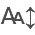

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import janitor
import matplotlib.ticker as ticker
from itables import init_notebook_mode
import warnings

warnings.filterwarnings("ignore")
init_notebook_mode(all_interactive=True)
import category_encoders as ce


In [3]:
# Configurações para melhorar a visualização dos gráficos
plt.style.use("ggplot")  # Usando um estilo mais genérico
plt.rcParams["figure.figsize"] = (12, 8)

# Configuração adicional para melhorar a legibilidade
sns.set_context("notebook", font_scale=1.2)


#### Preenchimento/checagem dos valores dos índices e das pedras

##### INDE

O INDE (Índice de Desenvolvimento Educacional) é um índice composto que integra diversos outros indicadores para fornecer uma visão abrangente do desenvolvimento do estudante no programa da Passos Mágicos. Com base nos relatórios PEDE, vou explicar como o INDE é calculado:
Componentes do INDE:

- IDA (Índice de Desenvolvimento Acadêmico)
- IEG (Índice de Engajamento)
- IAA (Índice de Assiduidade e Adesão)
- IAN (Índice de Adequação de Nível)
- IPS (Índice Psicossocial)
- IPP (Índice de Potencial e Protagonismo)
- IPV (Índice de Presença Virtual) - adicionado a partir de 2020

- Cálculo do INDE:

- INDE relatório PEDE 2020 (p. 9):
> Fases 0 (ou alfa) a 7: (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.20)

- INDE relatório PEDE 2021 (p. 9):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

- INDE relatório PEDE 2022 (p. 8):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

##### Pedras Conceito - substituiu o CONCEITO INDE (a coluna inde_conceito por ser eliminada):

As pedras conceito são classificações atribuídas aos estudantes com base em seu desempenho geral, principalmente no INDE. Existem quatro níveis, do mais alto para o mais baixo:

- Topázio
- Ametista
- Ágata
- Quartzo

Conforme o relatório PEDE 2022 (p. 71), as faixas aproximadas de INDE para cada pedra conceito são:

- Topázio: INDE de 8,2
- Ametista: INDE de 7,0
- Ágata: INDE de 5,2
- Quartzo: INDE de 3,1



# Carrega dados pré-processados

In [4]:
df_clean_0 = pd.read_parquet("data/data_clean_0.parquet").clean_names()
df_cleaned = (
    pd.read_parquet("data/data_pooled_0.parquet")
    .reset_index()
    .rename(columns={"index": "id"})
    .clean_names()
)


In [5]:
df_clean_0.head()


instituicao_ensino_aluno_2020     nome  idade_aluno_2020  anos_pm_2020  \
0                Escola Pública  ALUNO-1                11             2   
1                           NaN  ALUNO-2              <NA>          <NA>   
2                Escola Pública  ALUNO-3                12             2   
3                Escola Pública  ALUNO-4                10             2   
4                Escola Pública  ALUNO-5                10             1   

   ponto_virada_2020  inde_2020 inde_conceito_2020 pedra_2020  \
0                0.0   7.883752                  B   Ametista   
1                NaN        NaN                NaN        NaN   
2                0.0   7.856390                  B   Ametista   
3                0.0   5.076252                  D    Quartzo   
4                0.0   8.077085                  B   Ametista   

                                   destaque_ieg_2020  \
0  Seu destaque em 2020: A sua boa entrega das li...   
1                                               <NA>   
2  Seu destaque em 2020: A sua boa entrega das li...   
3  Ponto a melhorar em 2021: Melhorar a sua entre...   
4  Seu destaque em 2020: A sua boa entrega das li...   

                                   destaque_ida_2020  ...  \
0  Ponto a melhorar em 2021: Empenhar-se mais nas...  ...   
1                                               <NA>  ...   
2  Ponto a melhorar em 2021: Empenhar-se mais nas...  ...   
3  Ponto a melhorar em 2021: Empenhar-se mais nas...  ...   
4  Seu destaque em 2020: As suas boas notas na Pa...  ...   

          rec_ava_3_2022  rec_ava_4_2022  indicado_bolsa_2022  \
0                    NaN             NaN                  NaN   
1                    NaN             NaN                  1.0   
2                    NaN             NaN                  NaN   
3      Promovido de Fase             NaN                  0.0   
4  Mantido na Fase atual             NaN                  0.0   

   ponto_virada_2022  ipv_2022  ian_2022  fase_2020  turma_2020  \
0                NaN       NaN       NaN     Fase 2           H   
1                0.0  7.916665       5.0        NaN         NaN   
2                NaN       NaN       NaN     Fase 3           H   
3                0.0  8.055553       5.0     Fase 1           D   
4                0.0  7.833337       5.0     Fase 2           M   

  fase_ideal_2021 fase_ideal_2022  
0         Fase 3              NaN  
1             NaN         Fase 2   
2         Fase 3              NaN  
3             NaN         Fase 3   
4         Fase 2          Fase 3   

[5 rows x 70 columns]

In [6]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [7]:
# simplifica a coluna nome
df_cleaned["nome"] = df_cleaned["nome"].str.replace("-", "").str.lower()


In [8]:
df_cleaned.head()


id   ano    nome instituicao_ensino_aluno  idade_aluno  anos_pm  \
0   0  2020  aluno1           Escola Pública           11        2   
1   1  2020  aluno2                     None         <NA>     <NA>   
2   2  2020  aluno3           Escola Pública           12        2   
3   3  2020  aluno4           Escola Pública           10        2   
4   4  2020  aluno5           Escola Pública           10        1   

   ponto_virada      inde inde_conceito     pedra  ... ano_ingresso bolsista  \
0           0.0  7.883752             B  Ametista  ...         <NA>      NaN   
1           NaN       NaN           NaN      None  ...         <NA>      NaN   
2           0.0  7.856390             B  Ametista  ...         <NA>      NaN   
3           0.0  5.076252             D   Quartzo  ...         <NA>      NaN   
4           0.0  8.077085             B  Ametista  ...         <NA>      NaN   

   cg  cf  ct  nota_port  nota_mat  nota_ing  qtd_aval  indicado_bolsa  
0 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
1 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
2 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
3 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
4 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  

[5 rows x 39 columns]

In [9]:
df_cleaned[df_cleaned["ano"] == 2022]


id   ano       nome instituicao_ensino_aluno  idade_aluno  anos_pm  \
2696     0  2022     aluno1                     None         <NA>     <NA>   
2697     1  2022     aluno2                     None         <NA>     <NA>   
2698     2  2022     aluno3                     None         <NA>     <NA>   
2699     3  2022     aluno4                     None         <NA>     <NA>   
2700     4  2022     aluno5                     None         <NA>     <NA>   
...    ...   ...        ...                      ...          ...      ...   
4039  1344  2022  aluno1345                     None         <NA>     <NA>   
4040  1345  2022  aluno1346                     None         <NA>     <NA>   
4041  1346  2022  aluno1347                     None         <NA>     <NA>   
4042  1347  2022  aluno1348                     None         <NA>     <NA>   
4043  1348  2022  aluno1349                     None         <NA>     <NA>   

      ponto_virada      inde inde_conceito     pedra  ... ano_ingresso  \
2696           NaN       NaN           NaN      None  ...         <NA>   
2697           0.0  7.675509           NaN  Ametista  ...         2022   
2698           NaN       NaN           NaN      None  ...         <NA>   
2699           0.0  7.117065           NaN  Ametista  ...         2022   
2700           0.0  7.232336           NaN  Ametista  ...         2019   
...            ...       ...           ...       ...  ...          ...   
4039           NaN       NaN           NaN      None  ...         <NA>   
4040           1.0  8.135538           NaN   Topázio  ...         2022   
4041           NaN       NaN           NaN      None  ...         <NA>   
4042           0.0  6.749981           NaN     Ágata  ...         2018   
4043           0.0  6.399688           NaN     Ágata  ...         2022   

     bolsista     cg    cf    ct  nota_port  nota_mat  nota_ing  qtd_aval  \
2696      NaN    NaN   NaN   NaN        NaN       NaN       NaN      <NA>   
2697      0.0  245.0  66.0   6.0   8.200000  9.433333       NaN         2   
2698      NaN    NaN   NaN   NaN        NaN       NaN       NaN      <NA>   
2699      0.0  451.0  69.0   3.0   5.000000  5.166667       NaN         3   
2700      0.0  415.0  61.0  12.0   6.666667  7.500000       NaN         3   
...       ...    ...   ...   ...        ...       ...       ...       ...   
4039      NaN    NaN   NaN   NaN        NaN       NaN       NaN      <NA>   
4040      0.0  105.0  30.0   2.0   9.166667  8.833333       NaN         2   
4041      NaN    NaN   NaN   NaN        NaN       NaN       NaN      <NA>   
4042      1.0  567.0  51.0   6.0   4.666667  7.166667  5.866667         4   
4043      0.0  662.0  87.0   8.0   3.666667  3.833333  6.000000         4   

      indicado_bolsa  
2696             NaN  
2697             1.0  
2698             NaN  
2699             0.0  
2700             0.0  
...              ...  
4039             NaN  
4040             0.0  
4041             NaN  
4042             0.0  
4043             1.0  

[1348 rows x 39 columns]

In [10]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [11]:
df_cleaned.reset_index().drop(["index", "id"], axis=1).to_csv(
    "data/data_cleaned.csv", index=False
)
df_cleaned_sample = df_cleaned.reset_index().drop(["index", "id"], axis=1).sample(300)
df_cleaned_sample.to_csv("data/data_cleaned_sample.csv", index=False)


In [12]:
df_cleaned_sample


ano       nome instituicao_ensino_aluno  idade_aluno  anos_pm  \
928   2020   aluno929           Escola Pública           14        2   
1244  2020  aluno1245                     None         <NA>     <NA>   
2474  2021  aluno1127             Rede Decisão         <NA>     <NA>   
1059  2020  aluno1060                     None         <NA>     <NA>   
3769  2022  aluno1074                     None         <NA>     <NA>   
...    ...        ...                      ...          ...      ...   
3065  2022   aluno370                     None         <NA>     <NA>   
1991  2021   aluno644             Rede Decisão         <NA>     <NA>   
2954  2022   aluno259                     None         <NA>     <NA>   
157   2020   aluno158           Escola Pública           14        2   
1548  2021   aluno201           Escola Pública         <NA>     <NA>   

      ponto_virada      inde inde_conceito     pedra  \
928            0.0  4.465625             D   Quartzo   
1244           NaN       NaN           NaN      None   
2474           0.0  7.547000           NaN  Ametista   
1059           NaN       NaN           NaN      None   
3769           0.0  6.581947           NaN     Ágata   
...            ...       ...           ...       ...   
3065           1.0  7.692119           NaN  Ametista   
1991           1.0  9.163000           NaN   Topázio   
2954           NaN       NaN           NaN      None   
157            0.0  6.064722             D   Quartzo   
1548           0.0  5.636000           NaN     Ágata   

                                           destaque_ieg  ... ano_ingresso  \
928   Ponto a melhorar em 2021: Melhorar a sua entre...  ...         <NA>   
1244                                               <NA>  ...         <NA>   
2474                                               <NA>  ...         <NA>   
1059                                               <NA>  ...         <NA>   
3769  Melhorar: Melhorar a sua entrega de lições de ...  ...         2022   
...                                                 ...  ...          ...   
3065    Destaque: A sua boa entrega das lições de casa.  ...         2019   
1991                                               <NA>  ...         <NA>   
2954                                               <NA>  ...         <NA>   
157   Ponto a melhorar em 2021: Melhorar a sua entre...  ...         <NA>   
1548                                               <NA>  ...         <NA>   

     bolsista     cg     cf   ct  nota_port  nota_mat  nota_ing  qtd_aval  \
928       NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
1244      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
2474      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
1059      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
3769      0.0  631.0  154.0  9.0        8.5  3.166667       NaN         3   
...       ...    ...    ...  ...        ...       ...       ...       ...   
3065      0.0  237.0   20.0  4.0        8.0  8.166667       9.5         4   
1991      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
2954      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
157       NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   
1548      NaN    NaN    NaN  NaN        NaN       NaN       NaN      <NA>   

     indicado_bolsa  
928             NaN  
1244            NaN  
2474            NaN  
1059            NaN  
3769            0.0  
...             ...  
3065            1.0  
1991            NaN  
2954            NaN  
157             NaN  
1548            NaN  

[300 rows x 38 columns]

# Carrega dados da base pura

A tabela de alunos da base não-processada `TbAluno` fornece dados sobre o sexo dos alunos e outros que não estão presentes na tabela processada

In [13]:
df_tbaluno = pd.read_csv("data/TbAluno.csv", sep=",").clean_names()
df_tbaluno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   idaluno                                 2238 non-null   int64  
 1   nomealuno                               2238 non-null   object 
 2   nomeabreviado                           0 non-null      float64
 3   idunidade                               2237 non-null   float64
 4   sexo                                    2237 non-null   object 
 5   estadocivil                             2237 non-null   float64
 6   datanascimento                          2238 non-null   object 
 7   idpai                                   800 non-null    float64
 8   idmae                                   1218 non-null   object 
 9   idresponsavel                           2237 non-null   float64
 10  idtiporesponsavel                       2238 non-null   int6

## Cria novo dataframe com as informações mais relevantes do aluno para posterior processamento

In [14]:
df_aluno = df_tbaluno[["nomealuno", "sexo", "corraca", "idtiporesponsavel"]].copy()
df_aluno.rename(columns={"corraca": "cor", "nomealuno": "nome"}, inplace=True)
df_aluno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome               2238 non-null   object
 1   sexo               2237 non-null   object
 2   cor                2237 non-null   object
 3   idtiporesponsavel  2238 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 70.1+ KB


In [15]:
df_aluno["nome"] = df_aluno["nome"].str.replace(" ", "").str.lower()
df_aluno.head()


nome sexo cor  idtiporesponsavel
0  aluno1    F   R                 11
1  aluno2    F   B                 11
2  aluno3    F   B                 11
3  aluno4    M   R                 11
4  aluno5    M   R                 11

In [16]:
df_tbaluno["idtiporesponsavel"].value_counts()


idtiporesponsavel
2      1729
1       215
11      163
4        45
8        39
5        13
9         8
12        7
13        6
3         5
14        3
10        2
676       1
6         1
7         1
Name: count, dtype: int64

In [17]:
df_complete = df_aluno.set_index("nome").join(df_cleaned.set_index("nome"), how="inner")
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2275 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

## Dados empilhados

In [18]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2275 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

In [19]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "sexo",
    "cor",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_complete.columns:
        print(f"\nContagem para {var}:")
        print(df_complete[var].value_counts().sort_values())



Contagem para ano:
ano
2020    1348
2021    1348
2022    1348
Name: count, dtype: int64

Contagem para sexo:
sexo
M    1839
F    2202
Name: count, dtype: int64

Contagem para cor:
cor
N      36
A      39
P     348
R    1752
B    1866
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      394
Fase 2    472
Fase 1  

### Ajuste de dados 

In [20]:
def calc_INDE(IDA, IEG, IAA, IAN, IPS, IPP, IPV, FASE):

    if FASE == "Fase 8":
        # pg. 9 PEDE 2020
        return (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10)
    else:
        # pg. 9 PEDE 2020
        return (
            (IDA * 0.20)
            + (IEG * 0.20)
            + (IAA * 0.10)
            + (IAN * 0.10)
            + (IPS * 0.10)
            + (IPP * 0.10)
            + (IPV * 0.20)
        )


# df_complete[df_complete["pedra"] == "#NULO!"].apply(
#     lambda x: (
#         calc_INDE(
#             x["ida"],
#             x["ieg"],
#             x["iaa"],
#             x["ian"],
#             x["ips"],
#             x["ipp"],
#             x["ipv"],
#             x["fase"],
#         )
#     ),
#     axis=1,
# )


In [21]:
df_complete[df_complete["pedra"] == "#NULO!"]["pedra"]


nome
aluno71     #NULO!
aluno506    #NULO!
Name: pedra, dtype: object

In [22]:
df_complete.loc[["aluno71", "aluno506"], "pedra"] = "Quartzo"


In [23]:
df_complete["pedra"].value_counts()


pedra
Ametista    978
Ágata       599
Quartzo     378
Topázio     322
Name: count, dtype: int64

In [24]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2277 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

In [25]:
# Elimina coluna inde_conceito porque foi substituída pela coluna pedra
df_complete.drop(columns="inde_conceito", inplace=True)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  pedra                     2277 non-null   object  
 11  destaque_ieg              1589 non-null   string  
 12  destaque_ida              1589 non-null   string  
 13  destaque_ipv              1565 non-null   s

In [26]:
df_complete.columns


Index(['sexo', 'cor', 'idtiporesponsavel', 'id', 'ano',
       'instituicao_ensino_aluno', 'idade_aluno', 'anos_pm', 'ponto_virada',
       'inde', 'pedra', 'destaque_ieg', 'destaque_ida', 'destaque_ipv', 'iaa',
       'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'fase', 'turma',
       'sinalizador_ingressante', 'rec_ava_1', 'rec_ava_2', 'rec_ava_3',
       'rec_ava_4', 'defasagem', 'fase_ideal', 'ano_ingresso', 'bolsista',
       'cg', 'cf', 'ct', 'nota_port', 'nota_mat', 'nota_ing', 'qtd_aval',
       'indicado_bolsa'],
      dtype='object')

In [27]:
colunas_essenciais = ["inde", "pedra"] + [
    col
    for col in df_complete.columns
    if col in ["iaa", "ian", "ieg", "ips", "ida", "ipp", "ipv"]
]
cols_idx = [df_complete.columns.get_loc(col) for col in colunas_essenciais]


In [28]:
# 1. Tratamento de valores nulos
df_complete = (
    df_complete.dropna(subset=df_complete.columns[cols_idx])
    .copy()
    .reset_index()
    # .drop("index", axis=1)
)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   string

In [29]:
# 3. Converter tipos de dados
df_complete["inde"] = pd.to_numeric(df_complete["inde"], errors="coerce")
df_complete["pedra"] = df_complete["pedra"].astype("category")
for col in df_complete.columns[15:21]:
    df_complete[col] = pd.to_numeric(df_complete[col], errors="coerce")

# 4. Tratar inconsistências
# Exemplo: limitar o INDE entre 0 e 10
df_complete["inde"] = df_complete["inde"].clip(0, 10)

# 5. Criar identificador único
df_complete["id_aluno_ano"] = df_complete["nome"] + "_" + df_complete["ano"].astype(str)


In [30]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   string

In [31]:
df_complete.set_index("id_aluno_ano", inplace=True)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 no

In [32]:
# Lista de todos os índices que queremos verificar se há consistência entre índices
indices = ["ida", "ieg", "iaa", "ian", "ips", "ipp", "ipv"]


# Função para verificar se um valor não é nulo e não é zero
def is_valid(x):
    return pd.notnull(x)


# Criar uma máscara booleana para linhas onde todos os índices foram calculados
indices_calculados = df_complete[indices].apply(lambda x: x.apply(is_valid)).all(axis=1)

# Verificar se INDE e PEDRA também foram calculados/preenchidos para essas linhas
verificacao = (
    indices_calculados
    & df_complete["inde"].apply(is_valid)
    & df_complete["pedra"].notnull()
)

# Resultados
total_linhas = len(df_complete)
linhas_com_indices = indices_calculados.sum()
linhas_completas = verificacao.sum()

print(f"Total de linhas no DataFrame: {total_linhas}")
print(f"Linhas com todos os índices calculados: {linhas_com_indices}")
print(f"Linhas com todos os índices, INDE e PEDRA: {linhas_completas}")

if linhas_com_indices == linhas_completas:
    print("Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.")
else:
    print(
        f"Há {linhas_com_indices - linhas_completas} linhas com índices calculados, mas sem INDE ou PEDRA."
    )

# Se houver discrepâncias, vamos identificá-las
if linhas_com_indices != linhas_completas:
    discrepancias = df_complete[indices_calculados & ~verificacao]
    print("\nLinhas com discrepâncias:")
    print(discrepancias[["inde", "pedra"] + indices])

# Verificar se há alguma linha com INDE e PEDRA, mas sem todos os índices
inde_pedra_sem_indices = df_complete[
    df_complete["inde"].apply(is_valid)
    & df_complete["pedra"].notnull()
    & ~indices_calculados
]

if not inde_pedra_sem_indices.empty:
    print(
        f"\nHá {len(inde_pedra_sem_indices)} linhas com INDE e PEDRA, mas sem todos os índices calculados."
    )
    print(inde_pedra_sem_indices[["inde", "pedra"] + indices])


Total de linhas no DataFrame: 2273
Linhas com todos os índices calculados: 2273
Linhas com todos os índices, INDE e PEDRA: 2273
Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.


In [33]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "sexo",
    "cor",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_complete.columns:
        print(f"\nContagem para {var}:")
        print(df_complete[var].value_counts().sort_values())



Contagem para ano:
ano
2021    684
2020    727
2022    862
Name: count, dtype: int64

Contagem para sexo:
sexo
M    1033
F    1237
Name: count, dtype: int64

Contagem para cor:
cor
N      20
A      25
P     199
R     970
B    1056
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1153
Name: count, dtype: int64

Contagem para pedra:
pedra
Topázio     322
Quartzo     374
Ágata       599
Ametista    978
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      392
Fase 2    472
Fase 1    500
Name: count, dtype: int64

Contagem para sinalizador_ingressante:
sinalizador_ingressante
Ingressante    249
Veterano  

In [34]:
df_complete.describe()


idtiporesponsavel           id          ano  idade_aluno   anos_pm  \
count        2273.000000  2273.000000  2273.000000        727.0     727.0   
mean            4.087549   669.717994  2021.059393    12.408528  1.467675   
std            24.628039   386.166327     0.834179     2.829807  1.131195   
min             1.000000     0.000000  2020.000000          7.0       0.0   
25%             2.000000   338.000000  2020.000000         10.0       1.0   
50%             2.000000   676.000000  2021.000000         12.0       1.0   
75%             2.000000  1000.000000  2022.000000         14.0       2.0   
max           676.000000  1348.000000  2022.000000         20.0       4.0   

       ponto_virada         inde          iaa          ieg          ips  ...  \
count   2247.000000  2273.000000  2273.000000  2273.000000  2273.000000  ...   
mean       0.140187     7.071757     8.264602     7.504482     6.833073  ...   
std        0.347258     1.200129     2.012817     2.195622     1.295848  ...   
min        0.000000     2.468000     0.000000     0.000000     0.000000  ...   
25%        0.000000     6.399377     7.916670     6.300000     6.250000  ...   
50%        0.000000     7.282096     8.750010     8.100000     7.500000  ...   
75%        0.000000     7.940281     9.500000     9.200000     7.500000  ...   
max        1.000000     9.712504    10.000020    10.000000    10.000000  ...   

       ano_ingresso   bolsista          cg          cf          ct  \
count         862.0  862.00000  862.000000  862.000000  862.000000   
mean     2020.49652    0.12529  431.500000   75.396752    6.617169   
std        1.787649    0.33124  248.982262   52.314184    3.989485   
min          2016.0    0.00000    1.000000    1.000000    1.000000   
25%          2019.0    0.00000  216.250000   30.000000    3.000000   
50%          2021.0    0.00000  431.500000   66.500000    6.000000   
75%          2022.0    0.00000  646.750000  118.000000    9.750000   
max          2022.0    1.00000  862.000000  192.000000   18.000000   

        nota_port    nota_mat    nota_ing  qtd_aval  indicado_bolsa  
count  860.000000  860.000000  285.000000     862.0      862.000000  
mean     5.796318    6.306628    5.839942  3.056845        0.153132  
std      2.422292    2.092551    2.992093  0.775806        0.360324  
min      0.000000    0.000000    0.000000       2.0        0.000000  
25%      4.316667    5.166667    3.500000       2.0        0.000000  
50%      6.000000    6.650000    6.266667       3.0        0.000000  
75%      7.833333    7.833333    8.500000       4.0        0.000000  
max     10.000000   10.000000   10.000000       4.0        1.000000  

[8 rows x 25 columns]

A contagem dos dados mostra que as classes estão desbalanceadas ou ainda contêm valores sem sentido. 

df_complete.iloc[69]

<Axes: ylabel='Frequency'>

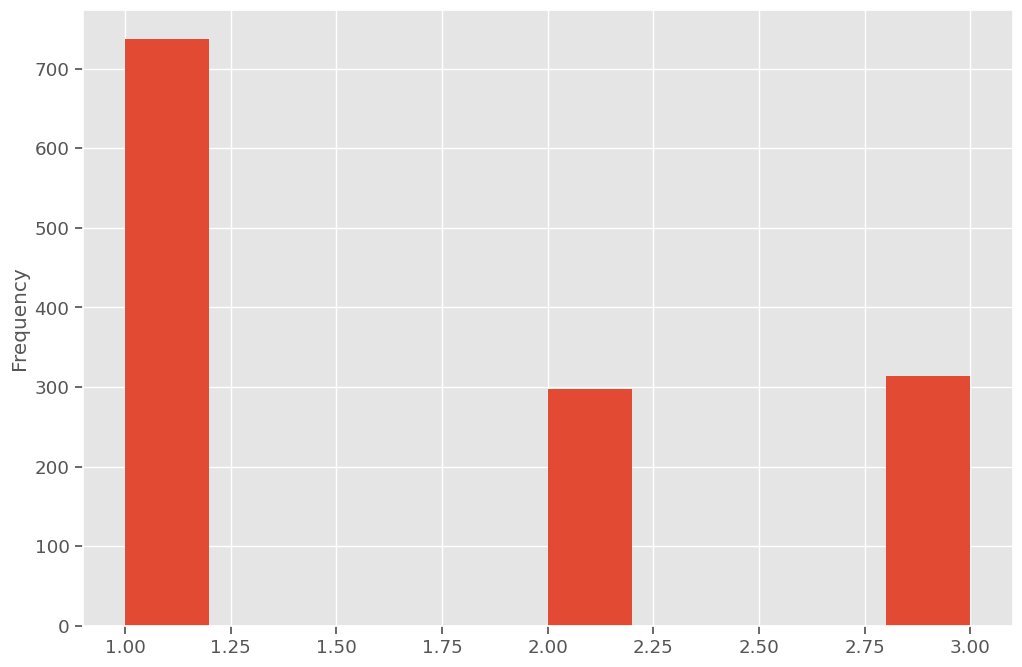

In [35]:
df_complete.groupby("nome")["nome"].count().sort_values(ascending=False).plot(
    kind="hist"
)


#### A partir da coluna `INSTITUICAO_ENSINO_ALUNO` é gerada uma nova coluna `CATEGORIA_INSTITUICAO`

In [36]:
def categorizar_instituicao(instituicao):
    if pd.isna(instituicao):
        return None
    elif instituicao == "Escola Pública":
        return "Escola Pública"
    elif instituicao in ["FIAP", "UNISA", "Estácio"]:
        return "Ensino Superior Privado"
    else:
        return "Escolas Privadas"


# Criar nova coluna com as categorias
df_complete["categoria_instituicao"] = df_complete["instituicao_ensino_aluno"].apply(
    categorizar_instituicao
)

# Verificar o resultado
print(df_complete["categoria_instituicao"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de instituição:")
print(df_complete["categoria_instituicao"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(
    pd.crosstab(
        df_complete["instituicao_ensino_aluno"], df_complete["categoria_instituicao"]
    )
)


categoria_instituicao
Escola Pública             1153
Escolas Privadas            234
Ensino Superior Privado      24
Name: count, dtype: int64

Distribuição percentual por categoria de instituição:
categoria_instituicao
Escola Pública             81.715096
Escolas Privadas           16.583983
Ensino Superior Privado     1.700921
Name: proportion, dtype: float64
categoria_instituicao     Ensino Superior Privado  Escola Pública  \
instituicao_ensino_aluno                                            
Einstein                                        0               0   
Escola JP II                                    0               0   
Escola João Paulo II                            0               0   
Escola Pública                                  0            1153   
Estácio                                         3               0   
FIAP                                           11               0   
Rede Decisão                                    0               0   
Rede Decisão/U

#### Corrige a coluna `PEDRA`

In [37]:
def categorizar_pedra(pedra):
    if pd.isna(pedra):
        return None
    else:
        return pedra


df_complete["categoria_pedra"] = df_complete["pedra"].apply(categorizar_pedra)

# Verificar o resultado
print(df_complete["categoria_pedra"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de pedra:")
print(df_complete["categoria_pedra"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(pd.crosstab(df_complete["pedra"], df_complete["categoria_pedra"]))


categoria_pedra
Ametista    978
Ágata       599
Quartzo     374
Topázio     322
Name: count, dtype: int64

Distribuição percentual por categoria de pedra:
categoria_pedra
Ametista    43.026837
Ágata       26.352838
Quartzo     16.454026
Topázio     14.166300
Name: proportion, dtype: float64
categoria_pedra  Ametista  Quartzo  Topázio  Ágata
pedra                                             
Ametista              978        0        0      0
Quartzo                 0      374        0      0
Topázio                 0        0      322      0
Ágata                   0        0        0    599


#### Criar a nova coluna `CATEGORIA_DEFASAGEM` a partir de `DEFASAGEM` para melhor balancear os dados 

In [38]:
def categorizar_defasagem(defasagem):
    if pd.isna(defasagem):
        return None
    elif defasagem >= 0:
        return ">=0.0"
    elif defasagem == -1:
        return "-1.0"
    else:
        return "<=-2.0"


# Converter a coluna DEFASAGEM para numérica, caso não esteja
df_complete["defasagem"] = pd.to_numeric(df_complete["defasagem"], errors="coerce")

# Criar nova coluna com as categorias
df_complete["categoria_defasagem"] = df_complete["defasagem"].apply(
    categorizar_defasagem
)

# Verificar o resultado
print("Contagem por categoria de defasagem:")
print(df_complete["categoria_defasagem"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_complete["categoria_defasagem"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:")
print(pd.crosstab(df_complete["defasagem"], df_complete["categoria_defasagem"]))


Contagem por categoria de defasagem:
categoria_defasagem
-1.0      317
>=0.0     265
<=-2.0    102
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_defasagem
-1.0      46.345029
>=0.0     38.742690
<=-2.0    14.912281
Name: proportion, dtype: float64

Tabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:
categoria_defasagem  -1.0  <=-2.0  >=0.0
defasagem                               
-4.0                    0       2      0
-3.0                    0       8      0
-2.0                    0      92      0
-1.0                  317       0      0
 0.0                    0       0    248
 1.0                    0       0     16
 3.0                    0       0      1


#### Cria a coluna `CATEGORIA_BOLSISTA` a partir da coluna `BOLSISTA` para fins de padronização e melhor representação nos gráficos

In [39]:
def categorizar_bolsista(bolsista):
    if pd.isna(bolsista):
        return None
    elif bolsista == 1.0:
        return "Sim"
    else:
        return "Não"


df_complete["categoria_bolsista"] = df_complete["bolsista"].apply(categorizar_bolsista)

# Verificar o resultado
print("Contagem por categoria de bolsista:")
print(df_complete["categoria_bolsista"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_complete["categoria_bolsista"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:")
print(pd.crosstab(df_complete["bolsista"], df_complete["categoria_bolsista"]))


Contagem por categoria de bolsista:
categoria_bolsista
Não    754
Sim    108
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_bolsista
Não    87.470998
Sim    12.529002
Name: proportion, dtype: float64

Tabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:
categoria_bolsista  Não  Sim
bolsista                    
0.0                 754    0
1.0                   0  108


#### Visão dos dados até o momento

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

In [40]:
print(f"Total de linhas: {len(df_complete)}")
pd.DataFrame(
    {
        "Total": df_complete.isnull().sum(),
        "Percentual": df_complete.isnull().sum() / len(df_complete) * 100,
    }
)


Total de linhas: 2273


Total  Percentual
nome                          0    0.000000
sexo                          3    0.131984
cor                           3    0.131984
idtiporesponsavel             0    0.000000
id                            0    0.000000
ano                           0    0.000000
instituicao_ensino_aluno    862   37.923449
idade_aluno                1546   68.015838
anos_pm                    1546   68.015838
ponto_virada                 26    1.143863
inde                          0    0.000000
pedra                         0    0.000000
destaque_ieg                684   30.092389
destaque_ida                684   30.092389
destaque_ipv                708   31.148262
iaa                           0    0.000000
ieg                           0    0.000000
ips                           0    0.000000
ida                           0    0.000000
ipp                           0    0.000000
ipv                           0    0.000000
ian                           0    0.000000
fase                          0    0.000000
turma                         0    0.000000
sinalizador_ingressante    1589   69.907611
rec_ava_1                   727   31.984162
rec_ava_2                   727   31.984162
rec_ava_3                   963   42.366916
rec_ava_4                  1304   57.369116
defasagem                  1589   69.907611
fase_ideal                  729   32.072151
ano_ingresso               1411   62.076551
bolsista                   1411   62.076551
cg                         1411   62.076551
cf                         1411   62.076551
ct                         1411   62.076551
nota_port                  1413   62.164540
nota_mat                   1413   62.164540
nota_ing                   1988   87.461505
qtd_aval                   1411   62.076551
indicado_bolsa             1411   62.076551
categoria_instituicao       862   37.923449
categoria_pedra               0    0.000000
categoria_defasagem        1589   69.907611
categoria_bolsista         1411   62.076551

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas

# Visão geral de alguns indicadores ao longo dos anos (por sexo)

In [41]:
# funções auxiliares
def teste_t(df, indicador, categoria):
    from itertools import permutations

    categorias = permutations(df[categoria].unique().dropna(), 2)

    for i in categorias:
        categoria_i = df[df[categoria] == i[0]][indicador]
        categoria_j = df[df[categoria] == i[1]][indicador]

        t_stat, p_value = stats.ttest_ind(categoria_i, categoria_j)

        if p_value <= 0.05:
            print(f"Resultado do teste t para:")
            print(f"t-statistic: {t_stat:.2f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Categorias:{i} => Diferença é estatisticamente significativa.\n")


## INDE - por ano e por gênero

Text(0.5, 1.0, 'Distribuição do INDE por ano e por sexo')

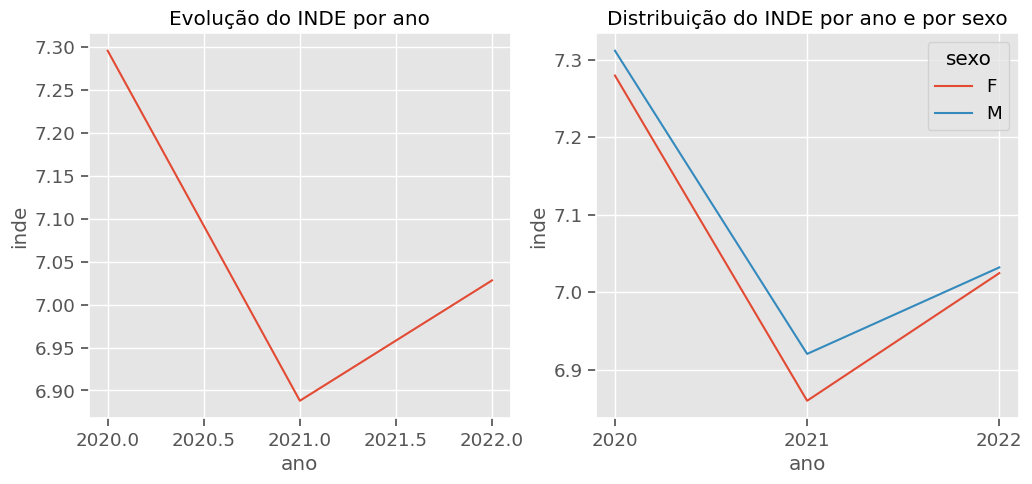

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

inde_by_year = df_complete.groupby("ano")["inde"].mean().reset_index()
inde_by_year_gender = df_complete.groupby(["ano", "sexo"])["inde"].mean().reset_index()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

sns.lineplot(data=inde_by_year, x="ano", y="inde", ax=axes[0])
axes[0].set_title("Evolução do INDE por ano")

sns.lineplot(data=inde_by_year_gender, x="ano", y="inde", hue="sexo", ax=axes[1])
axes[1].set_title("Distribuição do INDE por ano e por sexo")


### Verifica a normalidade dos dados

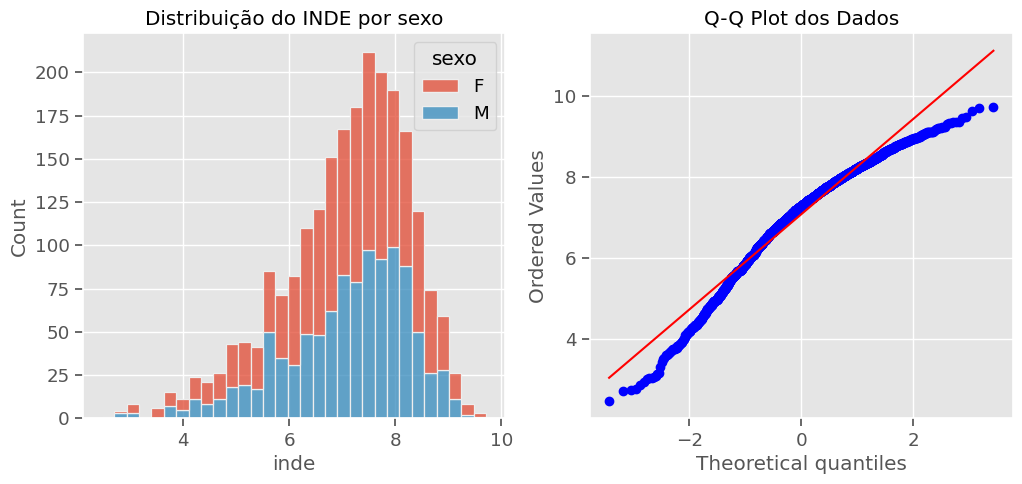

In [43]:
# Verifica a normalidade dos dados

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Gráfico com seaborn
sns.histplot(data=df_complete, x="inde", hue="sexo", multiple="stack", ax=axes[0])
axes[0].set_title("Distribuição do INDE por sexo")

# Gráfico com matplotlib
plt.sca(axes[1])
stats.probplot(df_complete["inde"], dist="norm", plot=plt)
axes[1].set_title("Q-Q Plot dos Dados")

# Mostrar a figura
plt.show()


#### Teste Mann-Whitney U 

 Comparar dois grupos (neste caso, sexo masculino e feminino) quando os dados não seguem uma distribuição normal.

In [44]:
import scipy.stats as stats

# Separando os dados por sexo
male_inde = df_complete[df_complete["sexo"] == "M"]["inde"]
female_inde = df_complete[df_complete["sexo"] == "F"]["inde"]

# Realizando o teste de Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(male_inde, female_inde)

print(f"U-Statistic: {u_statistic}, p-value: {p_value}")


U-Statistic: 650862.0, p-value: 0.44218238406237553


Interpretação: Se o valor p (p_value) for menor que um nível de significância (comum é 0,05), você pode rejeitar a hipótese nula e concluir que existe uma diferença estatisticamente significativa entre os valores de inde para os diferentes sexos.


#### Teste de Kruskal-Wallis

 Comparar mais de dois grupos (neste caso, os anos de 2020, 2021 e 2022) quando os dados não seguem uma distribuição normal.

In [45]:
# Separando os dados por ano
inde_2020 = df_complete[df_complete["ano"] == 2020]["inde"]
inde_2021 = df_complete[df_complete["ano"] == 2021]["inde"]
inde_2022 = df_complete[df_complete["ano"] == 2022]["inde"]

# Realizando o teste de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(inde_2020, inde_2021, inde_2022)

print(f"H-Statistic: {h_statistic}, p-value: {p_value}")


H-Statistic: 47.25395906912189, p-value: 5.48192594138268e-11


Interpretação: Assim como no teste anterior, se o valor p (p_value) for menor que o nível de significância (geralmente 0,05), você pode concluir que existe uma diferença estatisticamente significativa entre os anos analisados.

#### Teste de Dunn

Se o teste de Kruskal-Wallis indicar uma diferença significativa, você pode querer identificar especificamente quais pares de anos diferem. Para isso, você pode usar o Teste de Dunn com correção de Bonferroni para múltiplas comparações.

In [46]:
import scikit_posthocs as sp

# Realizando o teste de Dunn
dunn_result = sp.posthoc_dunn([inde_2020, inde_2021, inde_2022], p_adjust="bonferroni")

print(dunn_result)


              1             2             3
1  1.000000e+00  2.597729e-09  1.858829e-08
2  2.597729e-09  1.000000e+00  1.000000e+00
3  1.858829e-08  1.000000e+00  1.000000e+00


Interpretação: A matriz resultante mostrará os valores p para cada par de comparações. Se um valor p for menor que 0,05 após a correção de Bonferroni, esse par de anos tem uma diferença significativa no indicador inde.

#### Teste Mann-Whitney U 

Comparação entre genêros para cada ano


In [47]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Comparação entre sexos para cada ano
years = [2020, 2021, 2022]

for year in years:
    male_data = df_complete[
        (df_complete["ano"] == year) & (df_complete["sexo"] == "M")
    ]["inde"]
    female_data = df_complete[
        (df_complete["ano"] == year) & (df_complete["sexo"] == "F")
    ]["inde"]

    statistic, p_value = stats.mannwhitneyu(
        male_data, female_data, alternative="two-sided"
    )

    print(f"Ano {year}:")
    print(f"Estatística do teste Mann-Whitney U: {statistic}")
    print(f"Valor p: {p_value}")
    print(
        "Diferença estatisticamente significativa"
        if p_value < 0.05
        else "Diferença não significativa"
    )
    print()


Ano 2020:
Estatística do teste Mann-Whitney U: 65534.0
Valor p: 0.9633813747188757
Diferença não significativa

Ano 2021:
Estatística do teste Mann-Whitney U: 59497.0
Valor p: 0.5124840792362517
Diferença não significativa

Ano 2022:
Estatística do teste Mann-Whitney U: 92481.0
Valor p: 0.7740545930259126
Diferença não significativa



Interpretação do p-valor
p-valor alto (geralmente > 0,05):

Interpretação: Você não rejeita a hipótese nula. Isso sugere que não há evidências suficientes para concluir que os dados não seguem uma distribuição normal. Em outras palavras, os dados podem ser considerados normalmente distribuídos.
Exemplo: Se o p-valor é 0,12, você não rejeita a hipótese nula e pode supor que os dados seguem uma distribuição normal.
p-valor baixo (geralmente ≤ 0,05):

Interpretação: Você rejeita a hipótese nula. Isso sugere que há evidências suficientes para concluir que os dados não seguem uma distribuição normal. Portanto, os dados não são normalmente distribuídos.
Exemplo: Se o p-valor é 0,03, você rejeita a hipótese nula e conclui que os dados provavelmente não seguem uma distribuição normal.

#### Conclusão dos testes

- Não existe diferença estatisticamente significativa no INDE de acordo com o gênero dos alunos, tanto no agregado, quanto entre os anos;
- Existe diferença estatisticamente significativa no INDE quando se compara 2020 com 2021 ou 2022, porém não há diferença estatisticamente significativa entre 2021 e 2022

## Pedras

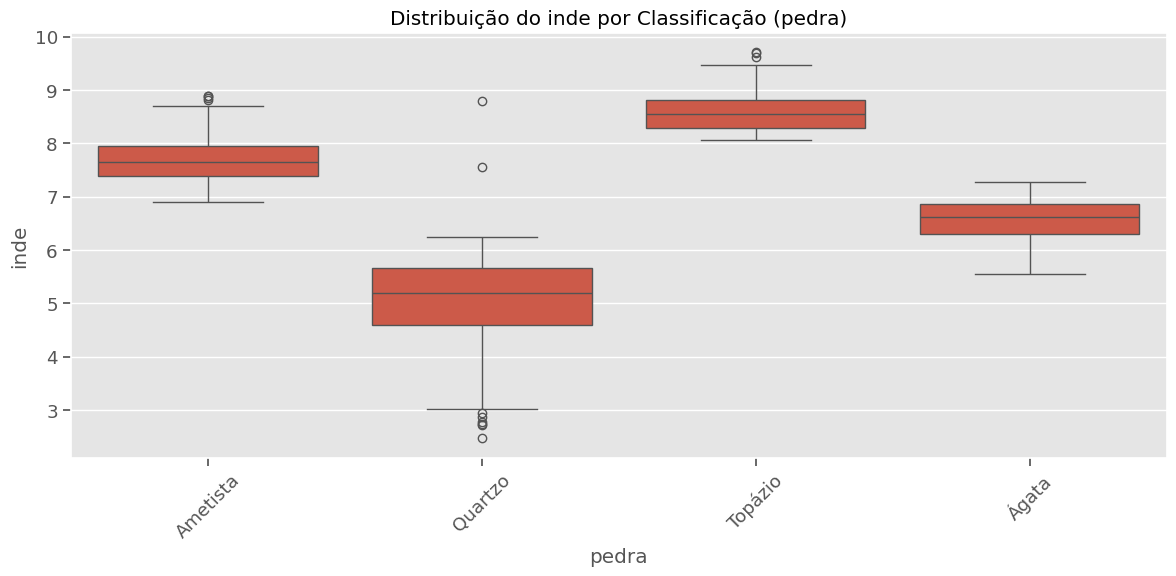

In [48]:
# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pedra", y="inde", data=df_complete)
plt.title("Distribuição do inde por Classificação (pedra)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


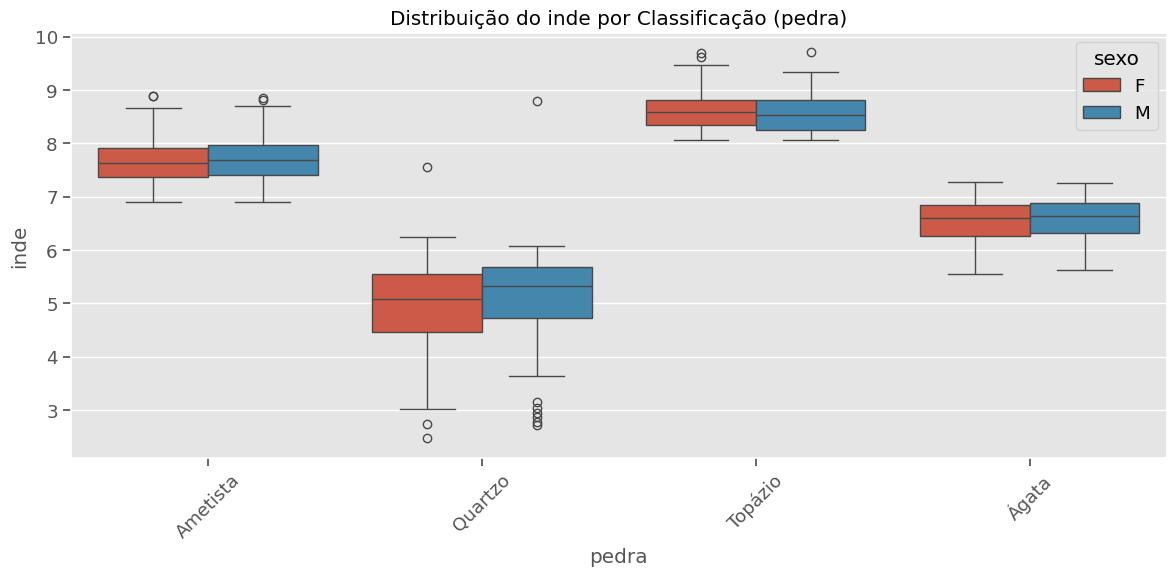

In [49]:
# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pedra", y="inde", data=df_complete, hue="sexo")
plt.title("Distribuição do inde por Classificação (pedra)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


### Todos os indicadores numéricos

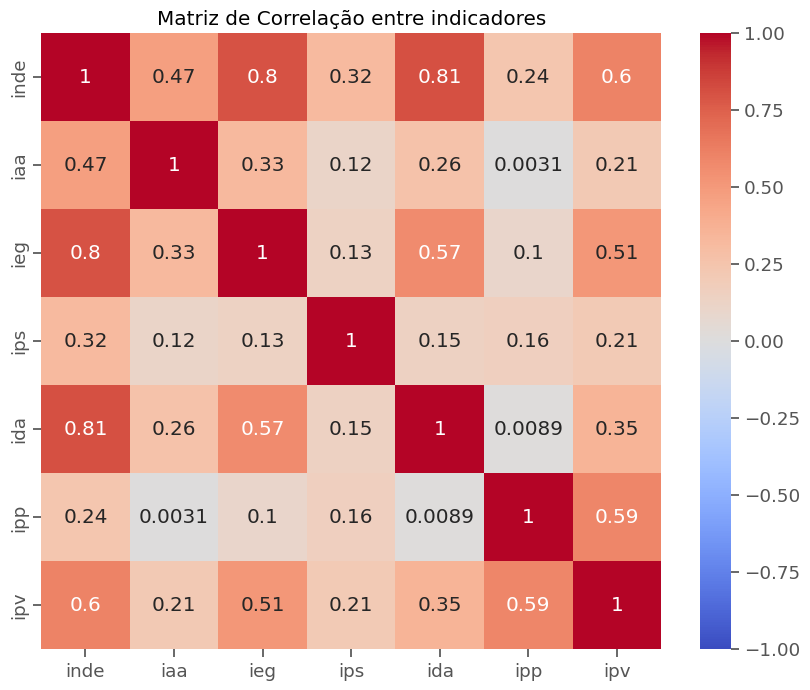

In [50]:
# Heatmap de correlação entre variáveis numéricas
numeric_vars = ["inde", "iaa", "ieg", "ips", "ida", "ipp", "ipv"]
corr_matrix = df_complete[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlação entre indicadores")
plt.show()


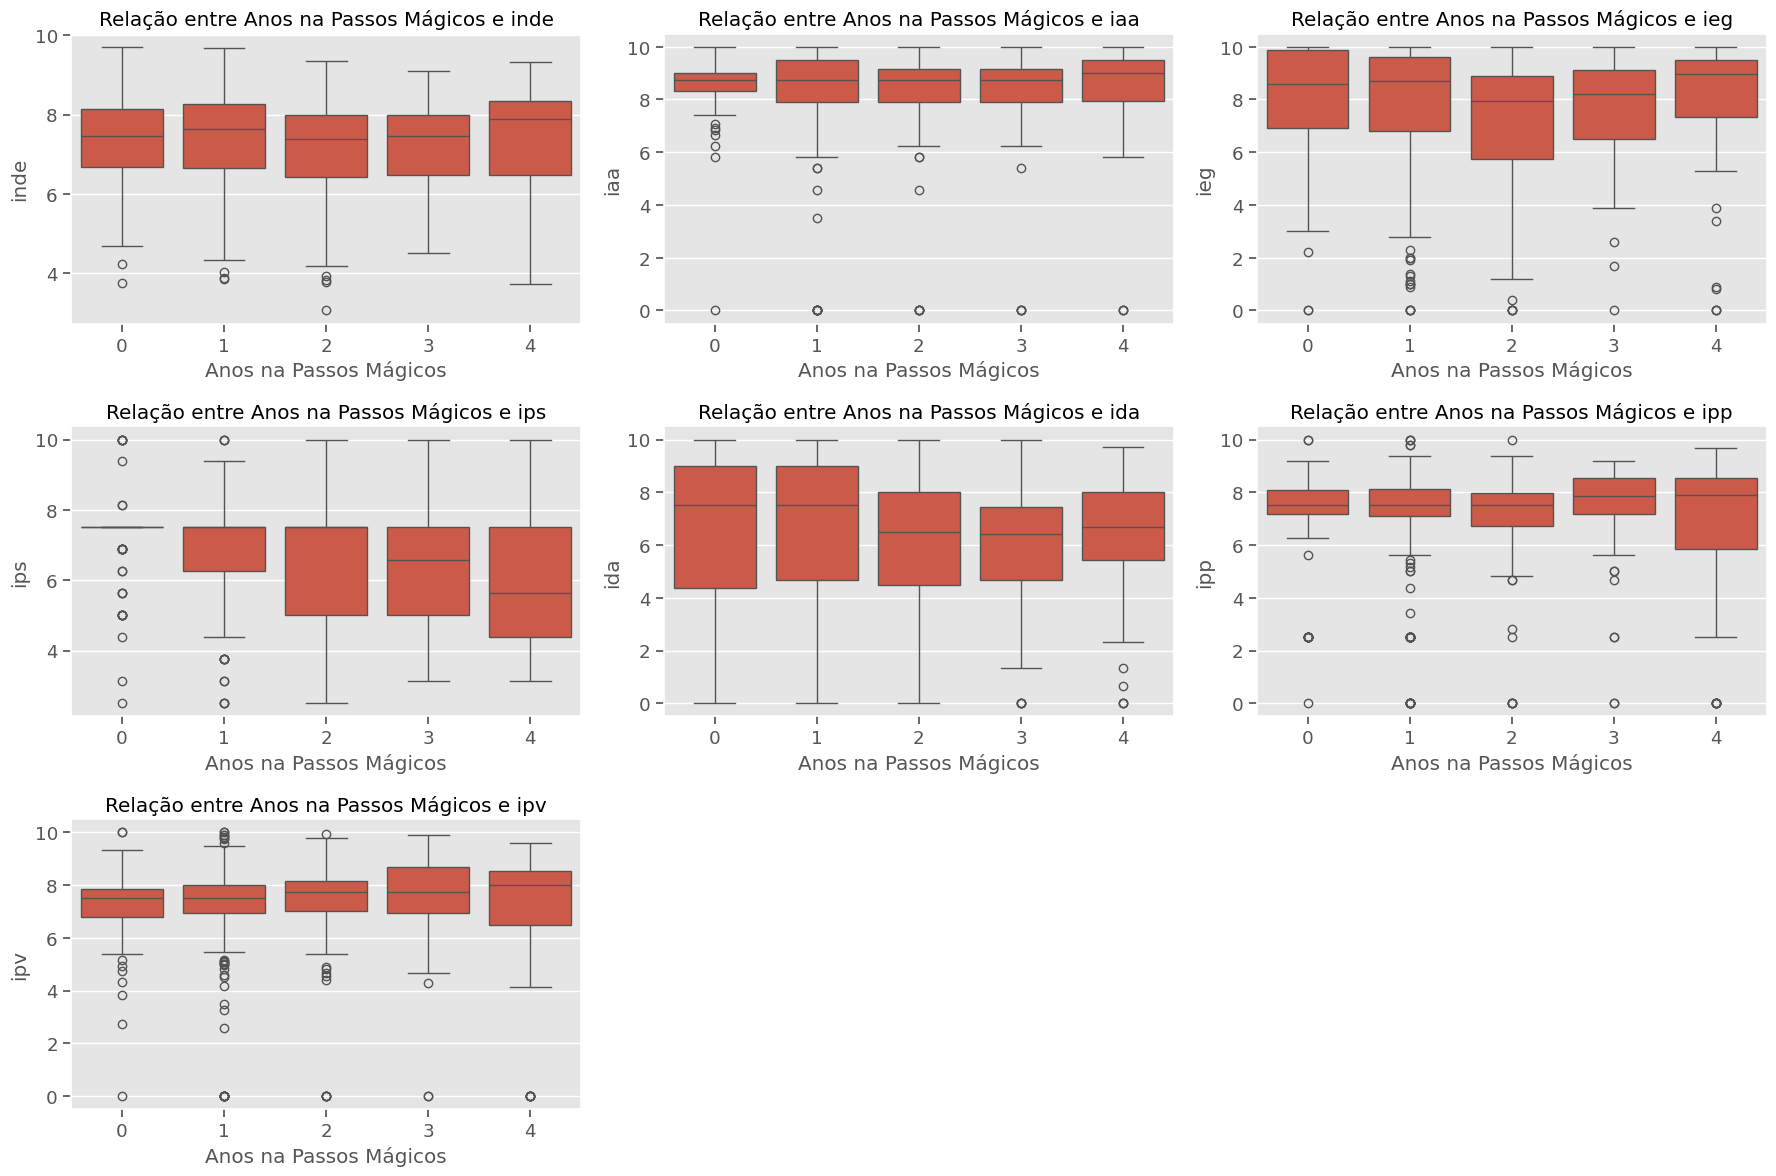

In [51]:
# plot the boxplot for each indicator and anos_pm side by side
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

for i, ax in enumerate(axes.flat):
    if i < len(numeric_vars):
        sns.boxplot(x="anos_pm", y=numeric_vars[i], data=df_complete, ax=ax)
        ax.set_title(f"Relação entre Anos na Passos Mágicos e {numeric_vars[i]}")
        ax.set_xlabel("Anos na Passos Mágicos")
        ax.set_ylabel(numeric_vars[i])
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [52]:
# Testar a normalidade dos indicadores
normality_results = []

for var in numeric_vars:
    # Realizar o teste de Shapiro-Wilk
    statistic, p_value = stats.shapiro(df_complete[var].dropna())

    # Armazenar os resultados
    normality_results.append(
        {
            "Variable": var,
            "Statistic": statistic,
            "P-value": p_value,
            "Is Normal": p_value > 0.05,
        }
    )

# Criar um DataFrame com os resultados
normality_df = pd.DataFrame(normality_results)

# Formatar o DataFrame para exibição
normality_df["Statistic"] = normality_df["Statistic"].round(4)
normality_df["P-value"] = normality_df["P-value"].round(4)

# Exibir o DataFrame
display(
    normality_df.style.set_caption("Teste de Normalidade (Shapiro-Wilk)")
    .applymap(
        lambda x: (
            "background-color: lightgreen" if x else "background-color: lightsalmon"
        ),
        subset=["Is Normal"],
    )
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}])
)


In [53]:
# Os dados não são normalmente distribuídos, então:
# Perform Mann-Whitney U test for each year against the list numeric_vars
years = df_complete["ano"].unique()
results = {}

for year in years:
    year_data = df_complete[df_complete["ano"] == year]
    other_years_data = df_complete[df_complete["ano"] != year]

    year_results = {}
    for var in numeric_vars:
        statistic, p_value = stats.mannwhitneyu(
            year_data[var].dropna(),
            other_years_data[var].dropna(),
            alternative="two-sided",
        )
        year_results[var] = {"statistic": statistic, "p_value": p_value}

    results[year] = year_results

# Create a DataFrame with the results
results_df = pd.DataFrame(
    columns=["Year", "Variable", "Statistic", "P-value", "Significant"]
)

for year, year_results in results.items():
    for var, test_results in year_results.items():
        new_row = pd.DataFrame(
            {
                "Year": [year],
                "Variable": [var],
                "Statistic": [f"{test_results['statistic']:.4f}"],
                "P-value": [f"{test_results['p_value']:.4f}"],
                "Significant": ["Yes" if test_results["p_value"] < 0.05 else "No"],
            }
        )
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Sort the DataFrame by Year and Variable
results_df = results_df.sort_values(["Year", "Variable"])

# Display the results as a beautiful table
from IPython.display import display, HTML


def highlight_significant(val):
    return "background-color: green" if val == "Yes" else ""


styled_df = results_df.style.applymap(highlight_significant, subset=["Significant"])
styled_df = styled_df.set_properties(**{"text-align": "center"})
styled_df = styled_df.set_table_styles(
    [
        {
            "selector": "th",
            "props": [
                ("background-color", "#f2f2f2"),
                ("font-weight", "bold"),
                ("text-align", "center"),
            ],
        },
        {"selector": "td", "props": [("padding", "8px")]},
        {
            "selector": "",
            "props": [("border-collapse", "collapse"), ("border", "1px solid #ddd")],
        },
    ]
)

display(HTML(styled_df.to_html()))


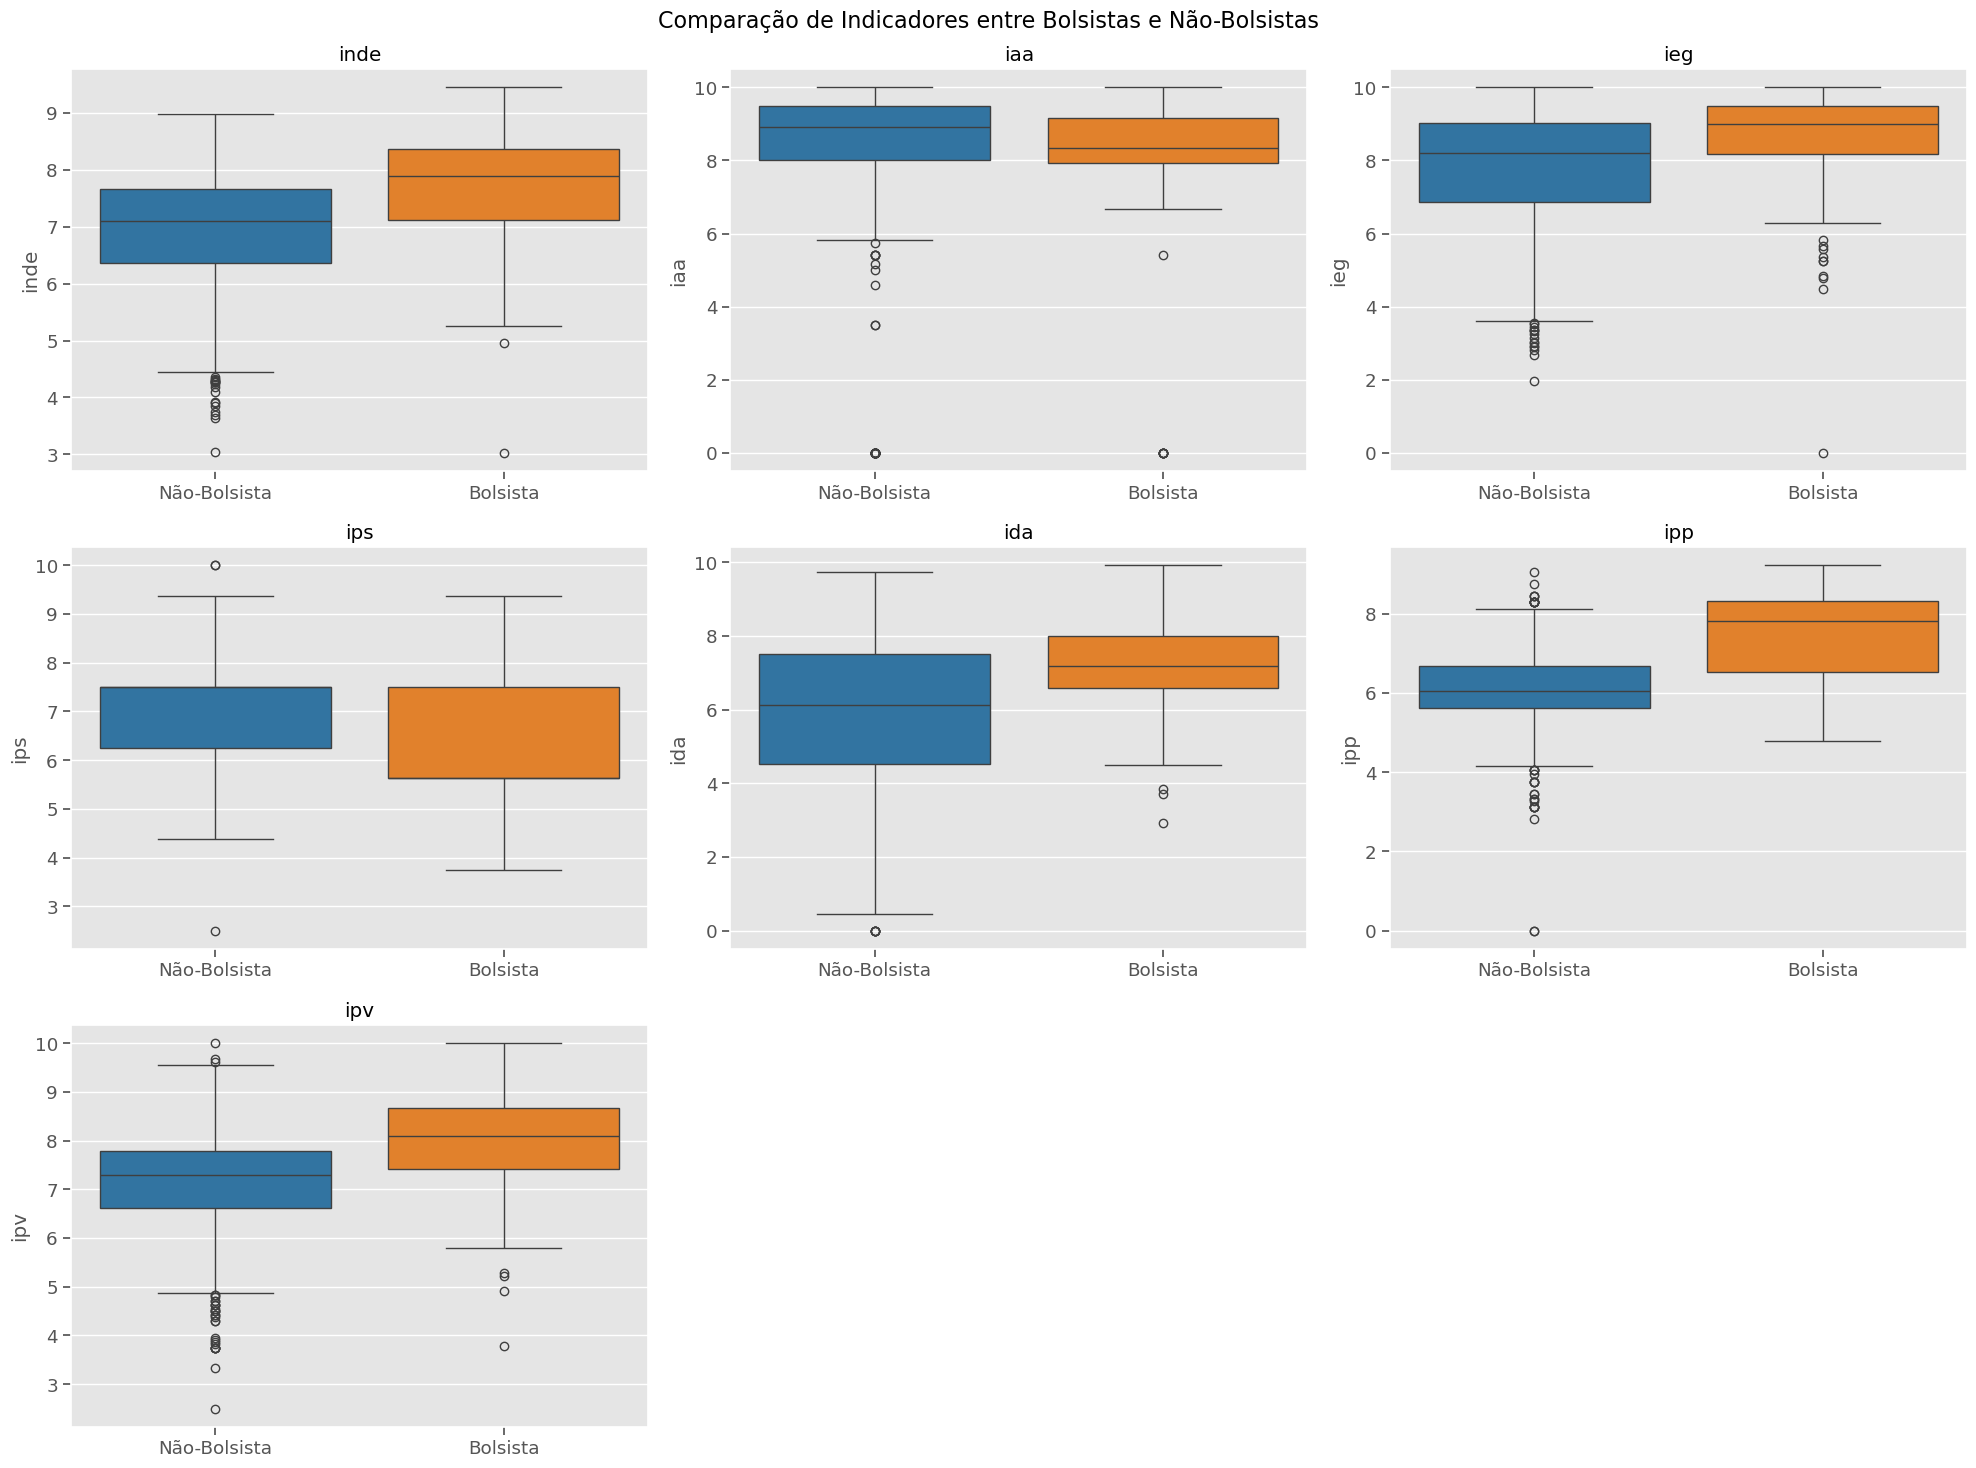

In [54]:
import warnings

warnings.filterwarnings("ignore")

# Filter numeric variables that are present in df_complete
numeric_vars_filtered = [var for var in numeric_vars if var in df_complete.columns]

# Calculate the number of rows and columns for the grid
n_vars = len(numeric_vars_filtered)
n_cols = 3  # You can adjust this to change the number of columns in the grid
n_rows = (n_vars + n_cols - 1) // n_cols

# Create the grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Comparação de Indicadores entre Bolsistas e Não-Bolsistas", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e"]  # Blue for Não-Bolsista, Orange for Bolsista


# Create boxplots for each variable
for i, var in enumerate(numeric_vars_filtered):
    sns.boxplot(
        x="categoria_bolsista", y=var, data=df_complete, ax=axes[i], palette=colors
    )
    axes[i].set_title(var)
    axes[i].set_xlabel("")
    axes[i].set_xticklabels(["Não-Bolsista", "Bolsista"])

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [55]:
# Lista de indicadores para análise
indicadores = ["inde", "iaa", "ieg", "ips", "ida", "ipp", "ipv"]

# Dicionário para armazenar os resultados
resultados = {}

for indicador in indicadores:
    bolsistas = df_complete[df_complete["bolsista"] == 1][indicador].dropna()
    nao_bolsistas = df_complete[df_complete["bolsista"] == 0][indicador].dropna()

    # Aplicando o teste de Mann-Whitney U
    statistic, p_value = stats.mannwhitneyu(
        bolsistas, nao_bolsistas, alternative="two-sided"
    )

    resultados[indicador] = {
        "estatistica": statistic,
        "p_valor": p_value,
        "significativo": p_value < 0.05,
    }


# Criando um DataFrame com os resultados para melhor visualização
df_resultados = pd.DataFrame.from_dict(resultados, orient="index")
df_resultados["Indicador"] = df_resultados.index
df_resultados = df_resultados.rename(
    columns={
        "estatistica": "Estatística U",
        "p_valor": "p-valor",
        "significativo": "Diferença Significativa",
    }
)
df_resultados = df_resultados[
    ["Indicador", "Estatística U", "p-valor", "Diferença Significativa"]
]

# Exibindo o DataFrame de resultados
display(df_resultados.style.format({"Estatística U": "{:.4f}", "p-valor": "{:.4f}"}))


p < 0.05: "Há uma diferença estatisticamente significativa no INDE entre bolsistas e não bolsistas. Com base na estatística t (positiva), podemos concluir que os bolsistas têm um INDE médio significativamente maior que os não bolsistas."

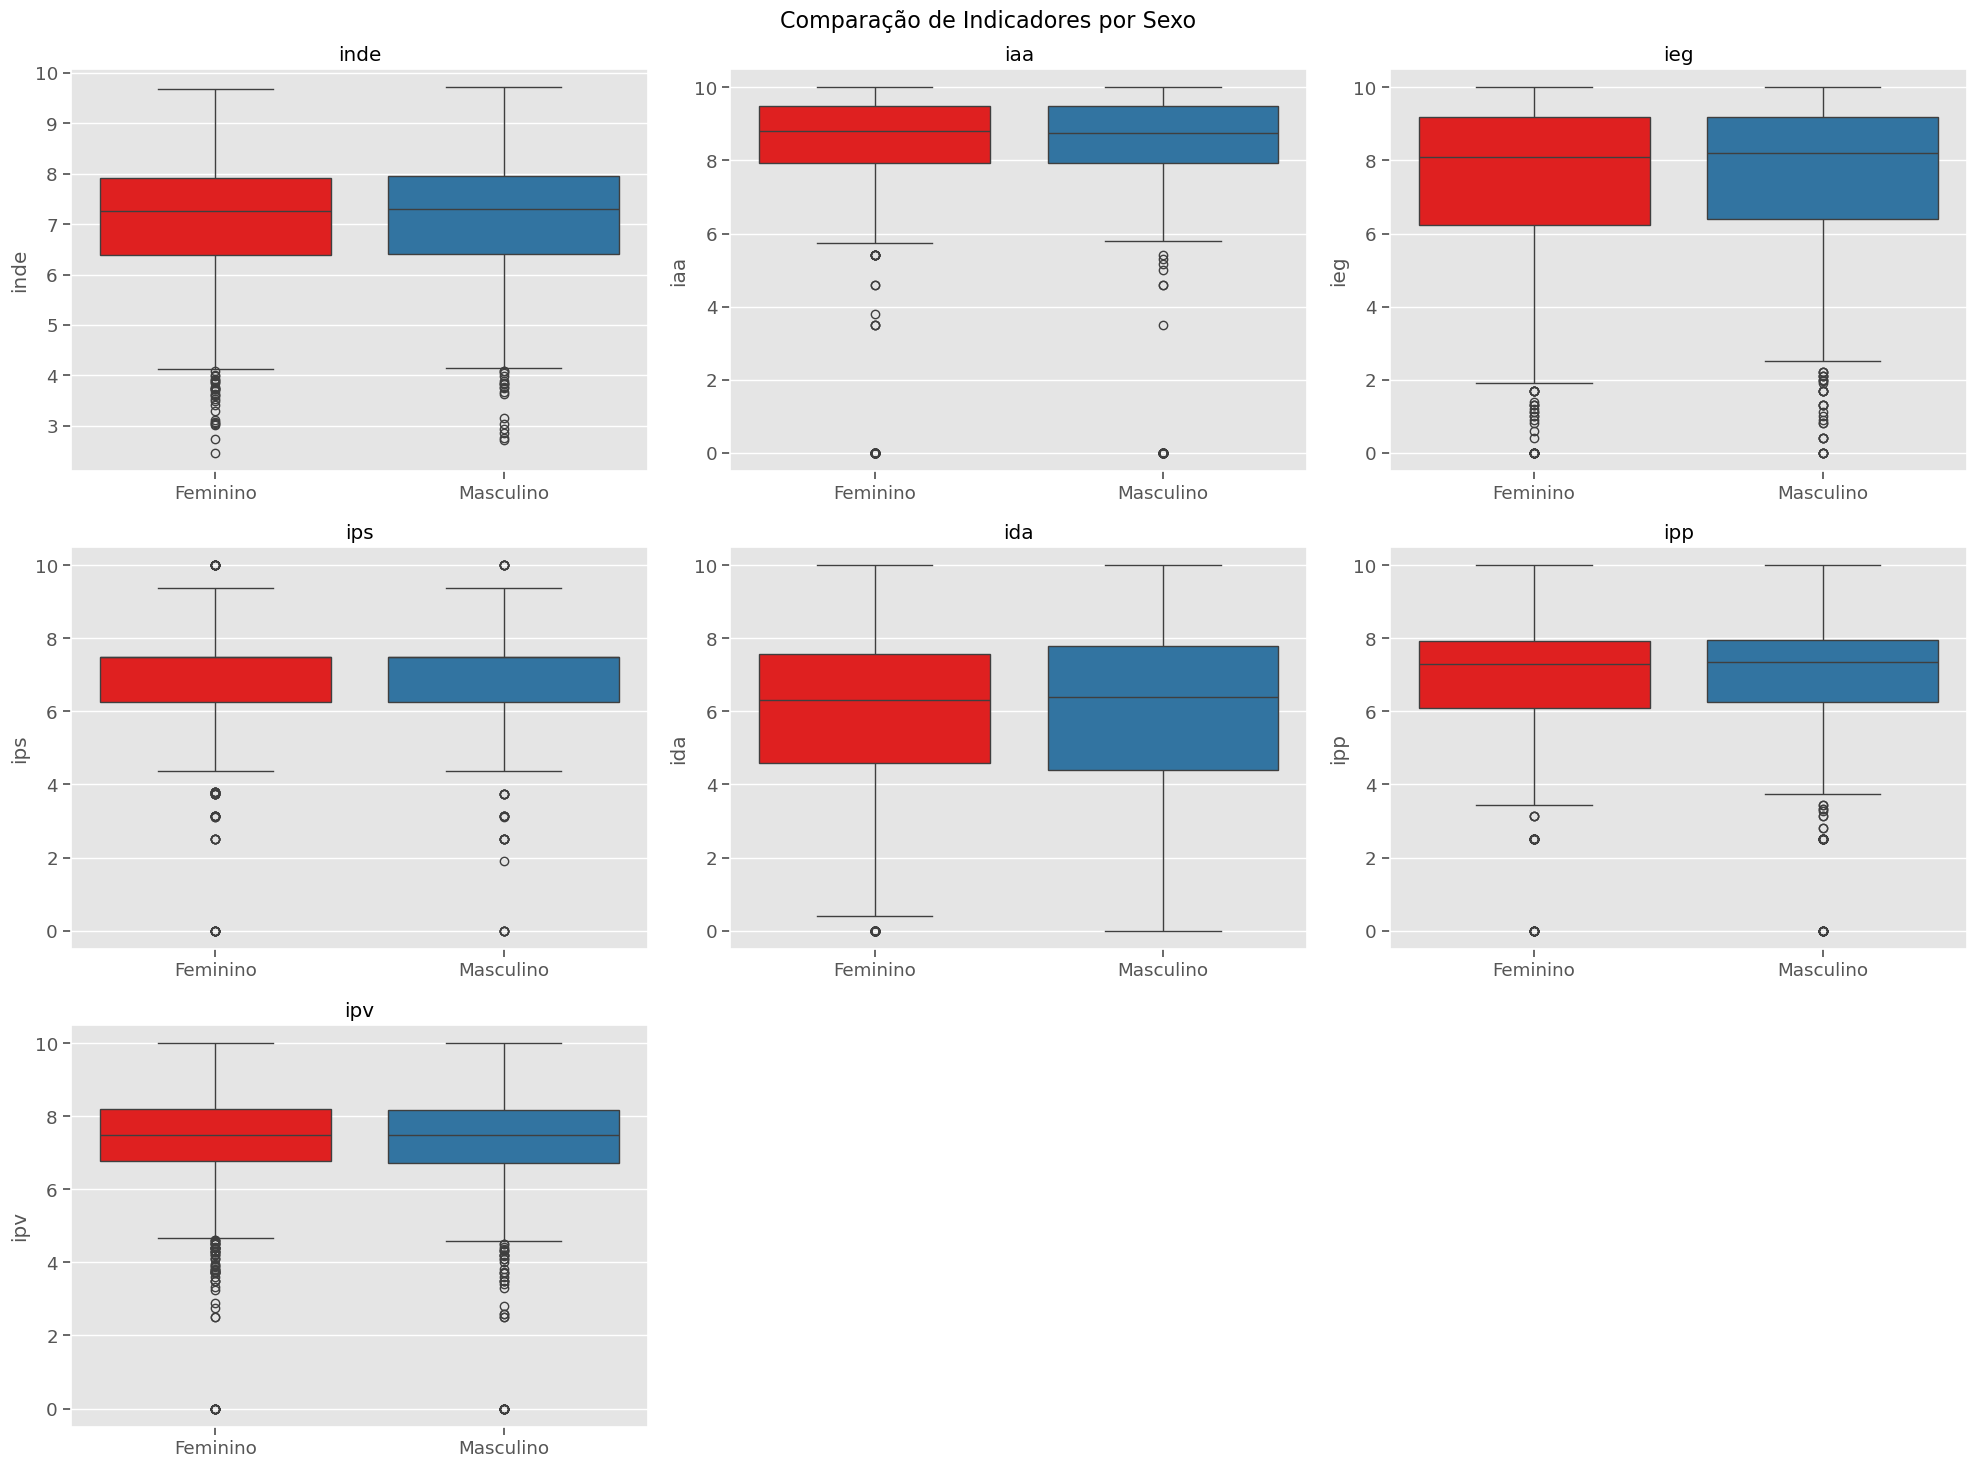

In [56]:
import warnings

warnings.filterwarnings("ignore")

# Filter numeric variables that are present in df_complete
numeric_vars_filtered = [var for var in numeric_vars if var in df_complete.columns]

# Calculate the number of rows and columns for the grid
n_vars = len(numeric_vars_filtered)
n_cols = 3  # You can adjust this to change the number of columns in the grid
n_rows = (n_vars + n_cols - 1) // n_cols

# Create the grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Comparação de Indicadores por Sexo", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Define colors for each category
colors = ["#FF0000", "#1f77b4"]  # Red for Female, Blue for Male
# Create boxplots for each variable
for i, var in enumerate(numeric_vars_filtered):
    sns.boxplot(x="sexo", y=var, data=df_complete, ax=axes[i], palette=colors)
    axes[i].set_title(var)
    axes[i].set_xlabel("")
    axes[i].set_xticklabels(["Feminino", "Masculino"])

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [57]:
# Lista de indicadores para análise
indicadores = ["inde", "iaa", "ieg", "ips", "ida", "ipp", "ipv"]

# Dicionário para armazenar os resultados
resultados = {}

for indicador in indicadores:
    masculino = df_complete[df_complete["sexo"] == "M"][indicador].dropna()
    feminino = df_complete[df_complete["sexo"] == "F"][indicador].dropna()

    # Aplicando o teste de Mann-Whitney U
    statistic, p_value = stats.mannwhitneyu(
        masculino, feminino, alternative="two-sided"
    )

    resultados[indicador] = {
        "estatistica": statistic,
        "p_valor": p_value,
        "significativo": p_value < 0.05,
    }


# Criando um DataFrame com os resultados para melhor visualização
df_resultados = pd.DataFrame.from_dict(resultados, orient="index")
df_resultados["Indicador"] = df_resultados.index
df_resultados = df_resultados.rename(
    columns={
        "estatistica": "Estatística U",
        "p_valor": "p-valor",
        "significativo": "Diferença Significativa",
    }
)
df_resultados = df_resultados[
    ["Indicador", "Estatística U", "p-valor", "Diferença Significativa"]
]

# Exibindo o DataFrame de resultados
display(df_resultados.style.format({"Estatística U": "{:.4f}", "p-valor": "{:.4f}"}))


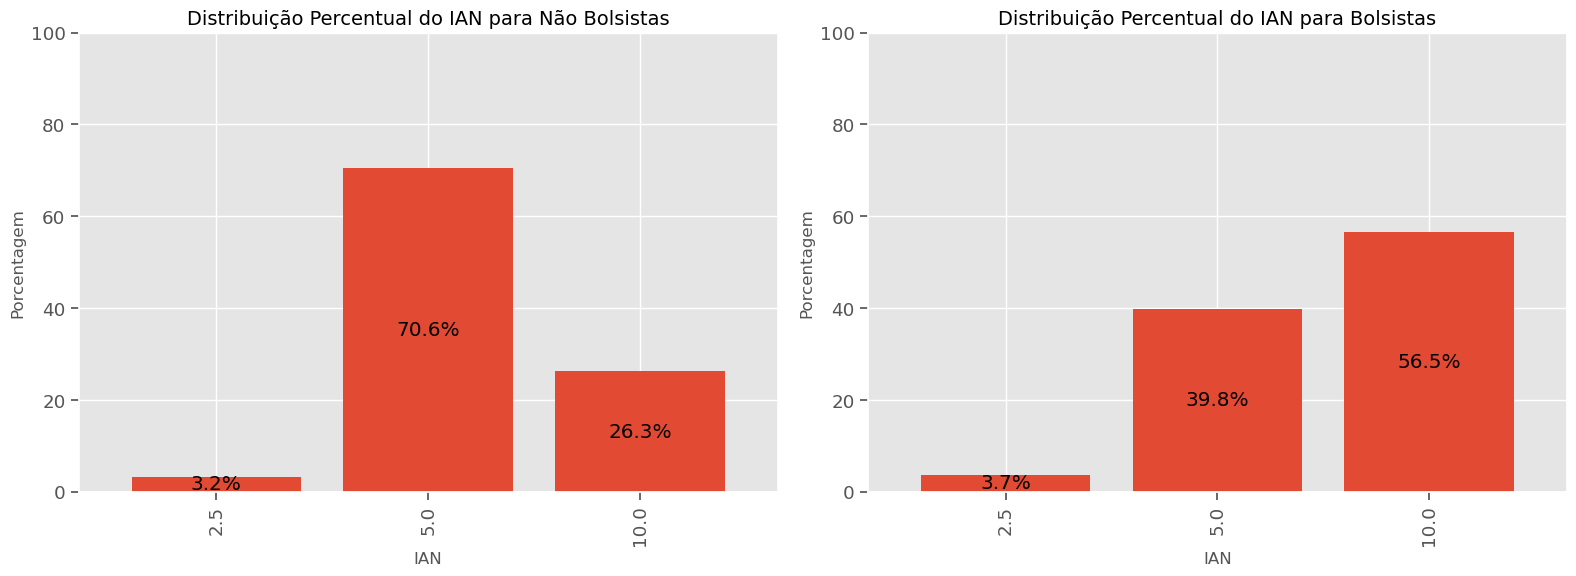

Percentuais para Não Bolsistas:
ian
2.5      3.183024
5.0     70.557029
10.0    26.259947
Name: 0.0, dtype: float64

Percentuais para Bolsistas:
ian
2.5      3.703704
5.0     39.814815
10.0    56.481481
Name: 1.0, dtype: float64


In [58]:
# Preparando os dados
ian_bolsista_data = df_complete[["ian", "bolsista"]].dropna()

# Filtrando apenas os valores de IAN permitidos
ian_bolsista_data = ian_bolsista_data[ian_bolsista_data["ian"].isin([2.5, 5.0, 10.0])]

# Calculando as porcentagens para cada grupo (bolsista e não bolsista)
ian_bolsista_percentages = (
    ian_bolsista_data.groupby("bolsista")["ian"].value_counts(normalize=True).unstack()
    * 100
)

# Criando o gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ian_bolsista_percentages.loc[0].plot(kind="bar", ax=ax1, width=0.8)
ian_bolsista_percentages.loc[1].plot(kind="bar", ax=ax2, width=0.8)

# Personalizando os gráficos
ax1.set_title("Distribuição Percentual do IAN para Não Bolsistas", fontsize=14)
ax2.set_title("Distribuição Percentual do IAN para Bolsistas", fontsize=14)
for ax in (ax1, ax2):
    ax.set_xlabel("IAN", fontsize=12)
    ax.set_ylabel("Porcentagem", fontsize=12)
    ax.set_ylim(0, 100)

# Adicionando rótulos nas barras
for ax in (ax1, ax2):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.tight_layout()
plt.show()

# Exibindo os percentuais
print("Percentuais para Não Bolsistas:")
print(ian_bolsista_percentages.loc[0])
print("\nPercentuais para Bolsistas:")
print(ian_bolsista_percentages.loc[1])


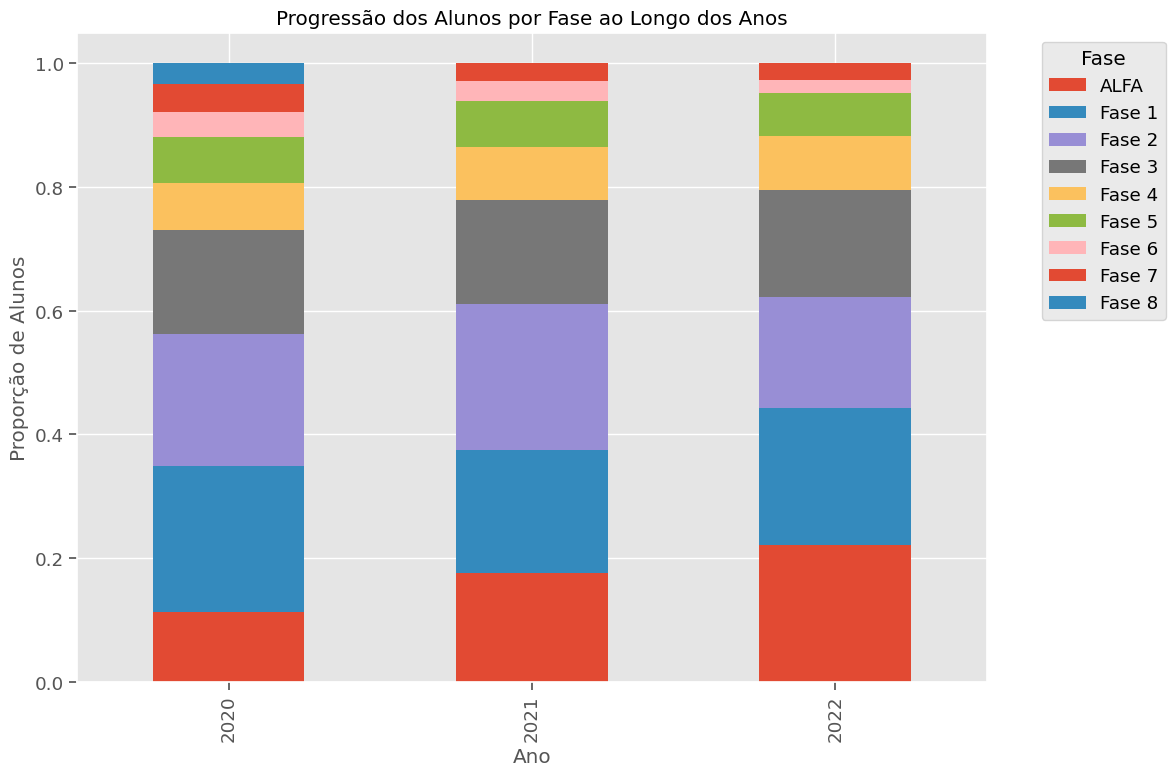

In [59]:
# Análise da progressão dos alunos
progression = df_complete.groupby("ano")["fase"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por Fase ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


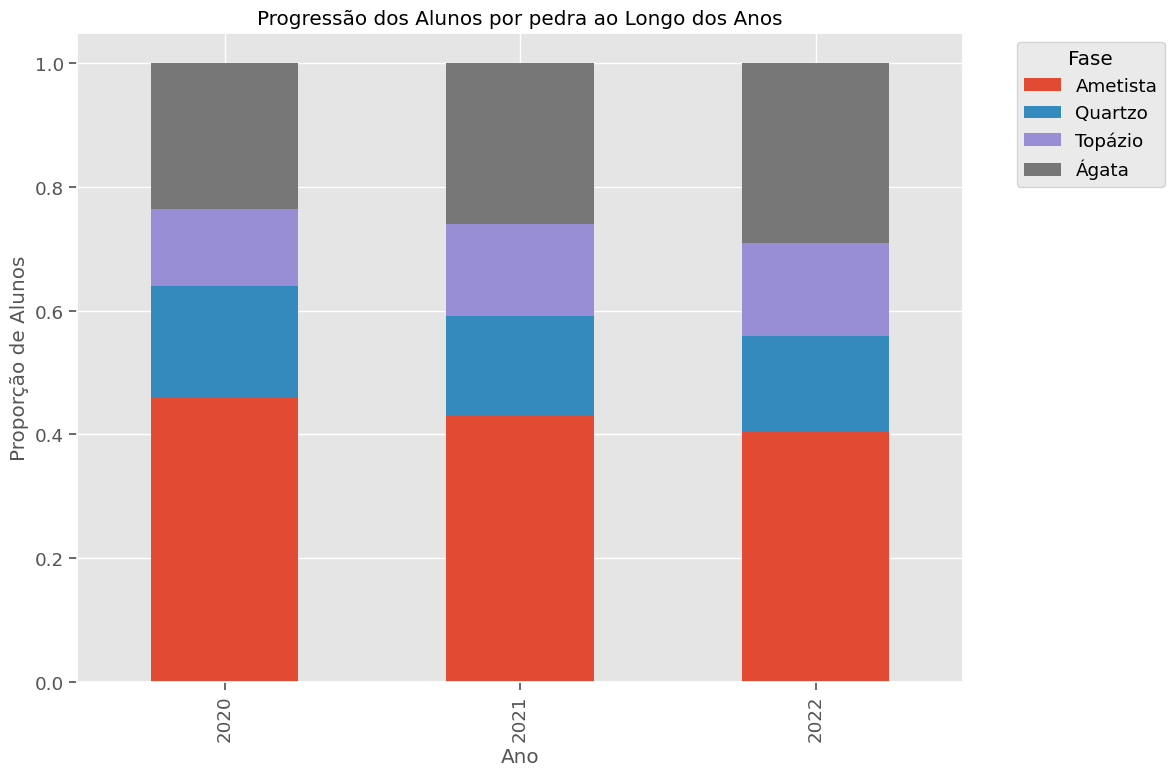

In [60]:
# Análise da progressão dos alunos
progression = df_complete.groupby("ano")["pedra"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por pedra ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [61]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 no

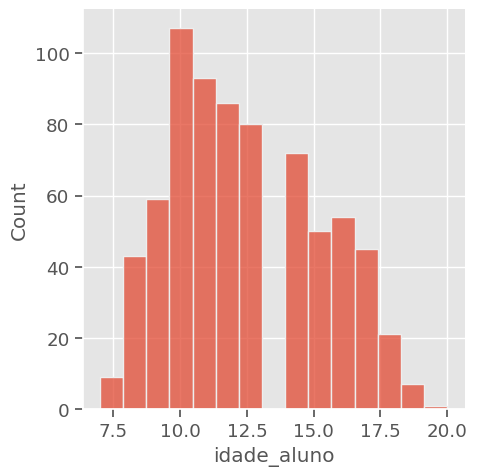

In [62]:
ax = sns.displot(df_complete["idade_aluno"])


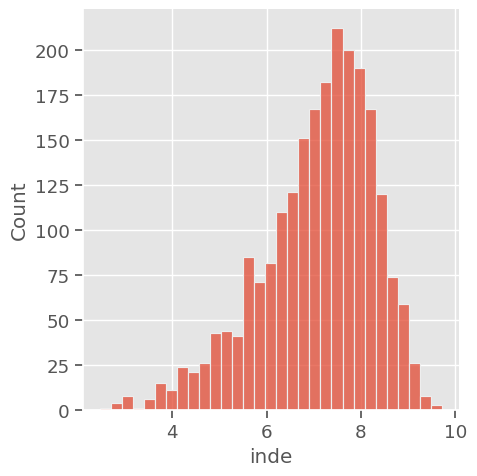

In [63]:
ax = sns.displot(df_complete["inde"])


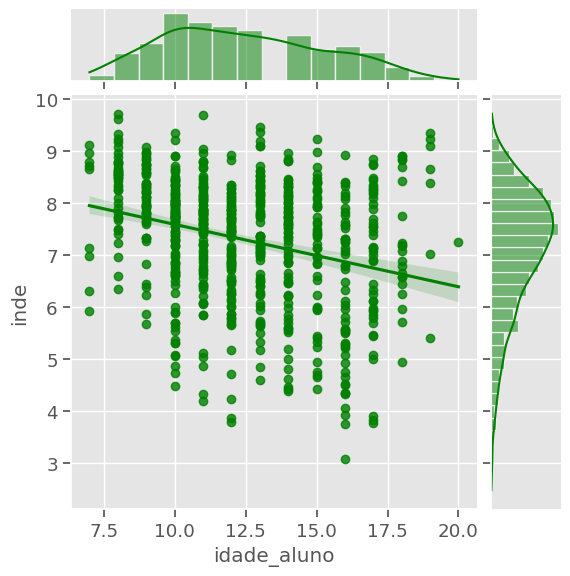

In [64]:
from seaborn import jointplot


new_df = df_cleaned.copy()
jointplot(x="idade_aluno", y="inde", data=new_df, kind="reg", color="green")


## Feature Engineering

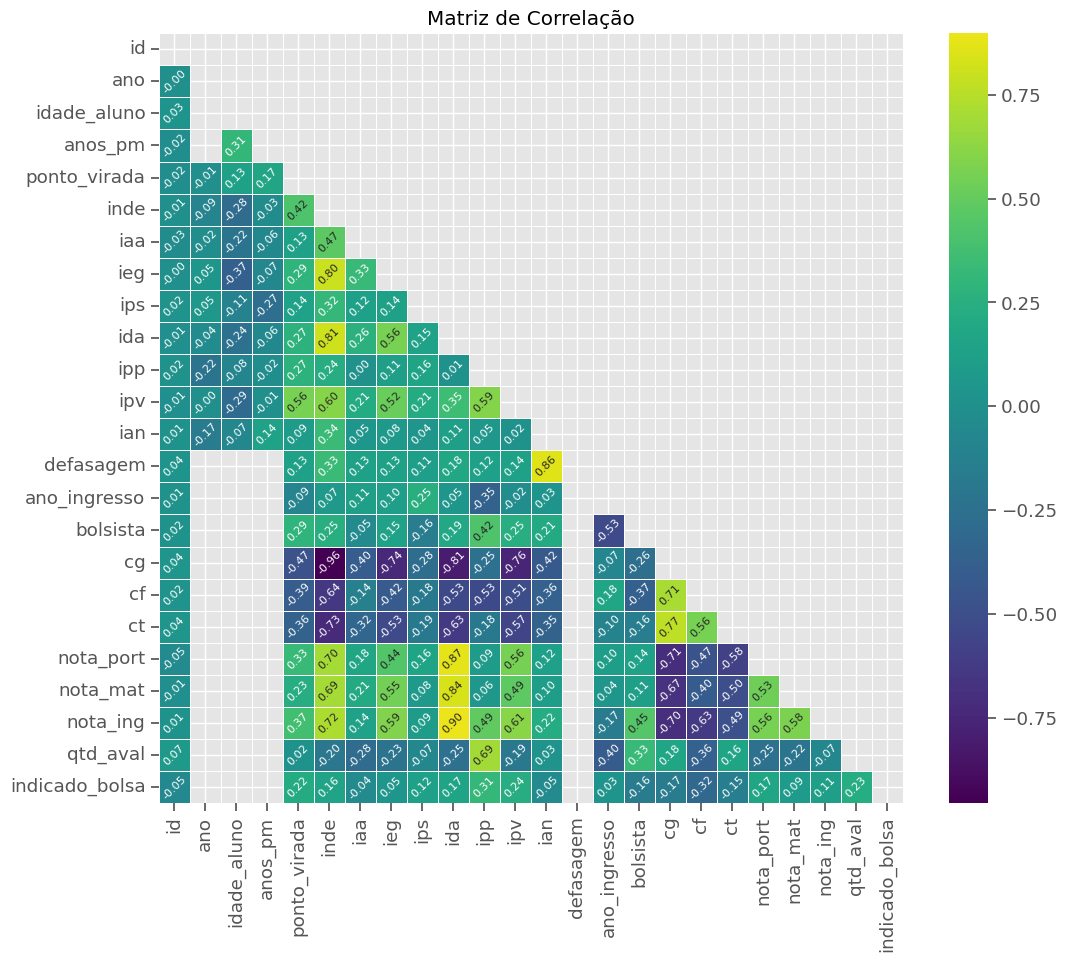

In [65]:
numeric_vars = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_numerical = df_cleaned[numeric_vars].copy()
corr_matrix = df_numerical.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="viridis",
    center=0,
    annot_kws={"size": 8, "rotation": 45},
    fmt=".2f",
    linewidths=0.5,
)
# Adicionar um título (opcional)
plt.title("Matriz de Correlação")

# Mostrar o gráfico
plt.show()


### Tratamento de dados categóricos

In [66]:
# select non numerical columns
df_non_numerical = df_cleaned[
    df_cleaned.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
]

df_non_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      4044 non-null   string  
 1   instituicao_ensino_aluno  1413 non-null   object  
 2   inde_conceito             727 non-null    category
 3   pedra                     2275 non-null   object  
 4   destaque_ieg              1589 non-null   string  
 5   destaque_ida              1589 non-null   string  
 6   destaque_ipv              1565 non-null   string  
 7   fase                      2275 non-null   object  
 8   turma                     2275 non-null   object  
 9   sinalizador_ingressante   686 non-null    category
 10  rec_ava_1                 1548 non-null   category
 11  rec_ava_2                 1548 non-null   object  
 12  rec_ava_3                 1312 non-null   object  
 13  rec_ava_4                 971 non-null    object

In [67]:
categorical_vars = df_non_numerical.columns.tolist()
for var in categorical_vars:
    if var in df_non_numerical.columns:
        print(f"\nContagem para {var}:")
        print(df_non_numerical[var].value_counts().sort_values())



Contagem para nome:
nome
aluno1306    3
aluno1307    3
aluno1308    3
aluno1309    3
aluno1310    3
            ..
aluno40      3
aluno1315    3
aluno1316    3
aluno1317    3
aluno12      3
Name: count, Length: 1348, dtype: Int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para destaque_ieg:
destaque_ieg
Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.              12
Ponto a melhorar em 2021: Melhorar o seu engaja

In [68]:
# Aplicar pré-processamento às colunas relevantes
columns_to_process = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]


df_to_process = df_cleaned.copy()

df_to_process.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

#### Compreensão das colunas: destaque_ida, destaque_ipv, destaque_ieg por meio de NLP 

In [69]:
display(df_to_process["destaque_ipv"].unique())
display(df_to_process["destaque_ieg"].unique())
display(df_to_process["destaque_ida"].unique())


<StringArray>
['Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.',
                                                                        <NA>,
 'Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos.',
             'Destaque: A sua boa integração aos Princípios Passos Mágicos.',
                 'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.']
Length: 5, dtype: string

<StringArray>
[                    'Seu destaque em 2020: A sua boa entrega das lições de casa.',
                                                                              <NA>,
             'Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.',
          'Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.',
 'Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado.',
                                 'Destaque: A sua boa entrega das lições de casa.',
                             'Melhorar: Melhorar a sua entrega de lições de casa.']
Length: 7, dtype: string

<StringArray>
['Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.',
                                                                 <NA>,
        'Seu destaque em 2020: As suas boas notas na Passos Mágicos.',
             'Seu destaque em 2020: As suas boas notas na Faculdade.',
              'Ponto a melhorar em 2021: As suas notas na Faculdade.',
                    'Destaque: As suas boas notas na Passos Mágicos.',
                 'Melhorar: Empenhar-se mais nas aulas e avaliações.']
Length: 7, dtype: string

In [70]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
import pandas as pd
import unidecode

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("rslp")


def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove accents
    text = unidecode.unidecode(text)

    # Remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("portuguese"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(tokens)


# Example usage
texts = [
    "Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.",
    "Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos.",
    "Destaque: A sua boa integração aos Princípios Passos Mágicos.",
    "Melhorar: Integrar-se mais aos Princípios Passos Mágicos.",
]

# Preprocess the texts
preprocessed_texts = [preprocess_text(text) for text in texts]

print("Preprocessed texts:")
for text in preprocessed_texts:
    print(text)


Preprocessed texts:
destaqu boa integraca principi pass magic
pont melhor integrars principi pass magic
destaqu boa integraca principi pass magic
melhor integrars principi pass magic


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\carlo.000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\carlo.000\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [71]:
def analyze_sentiment(text):
    positive_words = ["destaque", "boa", "bom", "boas"]
    negative_words = ["melhorar", "mais", "melhor"]

    if any(word in text for word in positive_words):
        return "Positive"
    elif any(word in text for word in negative_words):
        return "Negative"
    else:
        return ""


# Example usage
preprocessed_texts = [
    "destaqu boa integrac principi pass magic",
    "melhor integr principi pass magic",
    "destaqu boa integrac principi pass magic",
    "melhor integr principi pass magic",
]

sentiments = [analyze_sentiment(text) for text in preprocessed_texts]

for text, sentiment in zip(preprocessed_texts, sentiments):
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment}\n")


Text: destaqu boa integrac principi pass magic
Sentiment: Positive

Text: melhor integr principi pass magic
Sentiment: Negative

Text: destaqu boa integrac principi pass magic
Sentiment: Positive

Text: melhor integr principi pass magic
Sentiment: Negative



#### Análise de sentimento das colunas `destaque`

In [72]:
df_sentimento_destaque = pd.DataFrame(
    {
        "ipv": df_complete["destaque_ipv"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
        "ieg": df_complete["destaque_ieg"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
        "ida": df_complete["destaque_ida"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
    }
)


In [73]:
df_sentimento_destaque.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ipv     2273 non-null   object
 1   ieg     2273 non-null   object
 2   ida     2273 non-null   object
dtypes: object(3)
memory usage: 135.6+ KB


In [74]:
for col in df_sentimento_destaque.columns:
    df_sentimento_destaque[f"{col}_pre_processado"] = df_sentimento_destaque[col].apply(
        preprocess_text
    )
df_sentimento_destaque


ipv  \
id_aluno_ano                                                        
aluno1_2020     Seu destaque em 2020: A sua boa integração aos...   
aluno1_2021                                                  <NA>   
aluno2_2022     Destaque: A sua boa integração aos Princípios ...   
aluno3_2020     Seu destaque em 2020: A sua boa integração aos...   
aluno3_2021                                                  <NA>   
...                                                           ...   
aluno1347_2020  Seu destaque em 2020: A sua boa integração aos...   
aluno1348_2020  Seu destaque em 2020: A sua boa integração aos...   
aluno1348_2021                                               <NA>   
aluno1348_2022  Melhorar: Integrar-se mais aos Princípios Pass...   
aluno1349_2022  Melhorar: Integrar-se mais aos Princípios Pass...   

                                                              ieg  \
id_aluno_ano                                                        
aluno1_2020     Seu destaque em 2020: A sua boa entrega das li...   
aluno1_2021                                                  <NA>   
aluno2_2022       Destaque: A sua boa entrega das lições de casa.   
aluno3_2020     Seu destaque em 2020: A sua boa entrega das li...   
aluno3_2021                                                  <NA>   
...                                                           ...   
aluno1347_2020  Seu destaque em 2020: A sua boa entrega das li...   
aluno1348_2020  Ponto a melhorar em 2021: Melhorar a sua entre...   
aluno1348_2021                                               <NA>   
aluno1348_2022    Destaque: A sua boa entrega das lições de casa.   
aluno1349_2022    Destaque: A sua boa entrega das lições de casa.   

                                                              ida  \
id_aluno_ano                                                        
aluno1_2020     Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno1_2021                                                  <NA>   
aluno2_2022       Destaque: As suas boas notas na Passos Mágicos.   
aluno3_2020     Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno3_2021                                                  <NA>   
...                                                           ...   
aluno1347_2020  Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno1348_2020  Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno1348_2021                                               <NA>   
aluno1348_2022  Melhorar: Empenhar-se mais nas aulas e avaliaç...   
aluno1349_2022  Melhorar: Empenhar-se mais nas aulas e avaliaç...   

                                       ipv_pre_processado  \
id_aluno_ano                                                
aluno1_2020     destaqu boa integraca principi pass magic   
aluno1_2021                                                 
aluno2_2022     destaqu boa integraca principi pass magic   
aluno3_2020     destaqu boa integraca principi pass magic   
aluno3_2021                                                 
...                                                   ...   
aluno1347_2020  destaqu boa integraca principi pass magic   
aluno1348_2020  destaqu boa integraca principi pass magic   
aluno1348_2021                                              
aluno1348_2022       melhor integrars principi pass magic   
aluno1349_2022       melhor integrars principi pass magic   

                                ieg_pre_processado  \
id_aluno_ano                                         
aluno1_2020            destaqu boa entreg lico cas   
aluno1_2021                                          
aluno2_2022            destaqu boa entreg lico cas   
aluno3_2020            destaqu boa entreg lico cas   
aluno3_2021                                          
...                                            ...   
aluno1347_2020         destaqu boa entreg lico cas   
aluno1348_2020  pont melhor melhor entreg lico cas   
aluno1348_2021                    

In [75]:
def analyze_sentiment(text, positive_words, negative_words, neutral_words=[]):

    if any(word in text for word in positive_words):
        return "Positivo"
    elif any(word in text for word in negative_words):
        return "Negativo"
    elif any(word in text for word in neutral_words):
        return "Neutro"
    else:
        return np.nan


In [76]:
pre_proc_cols = df_sentimento_destaque.columns[
    list(df_sentimento_destaque.columns.str.endswith("_pre_processado"))
].to_list()


In [77]:
positive_words = ["destaque", "boa", "bom", "boas"]
negative_words = ["melhorar", "mais", "melhor"]

for col in pre_proc_cols:
    df_sentimento_destaque[f"{col}_resultado"] = df_sentimento_destaque[col].apply(
        analyze_sentiment, positive_words=positive_words, negative_words=negative_words
    )
df_sentimento_destaque.head()


ipv  \
id_aluno_ano                                                      
aluno1_2020   Seu destaque em 2020: A sua boa integração aos...   
aluno1_2021                                                <NA>   
aluno2_2022   Destaque: A sua boa integração aos Princípios ...   
aluno3_2020   Seu destaque em 2020: A sua boa integração aos...   
aluno3_2021                                                <NA>   

                                                            ieg  \
id_aluno_ano                                                      
aluno1_2020   Seu destaque em 2020: A sua boa entrega das li...   
aluno1_2021                                                <NA>   
aluno2_2022     Destaque: A sua boa entrega das lições de casa.   
aluno3_2020   Seu destaque em 2020: A sua boa entrega das li...   
aluno3_2021                                                <NA>   

                                                            ida  \
id_aluno_ano                                                      
aluno1_2020   Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno1_2021                                                <NA>   
aluno2_2022     Destaque: As suas boas notas na Passos Mágicos.   
aluno3_2020   Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno3_2021                                                <NA>   

                                     ipv_pre_processado  \
id_aluno_ano                                              
aluno1_2020   destaqu boa integraca principi pass magic   
aluno1_2021                                               
aluno2_2022   destaqu boa integraca principi pass magic   
aluno3_2020   destaqu boa integraca principi pass magic   
aluno3_2021                                               

                       ieg_pre_processado                  ida_pre_processado  \
id_aluno_ano                                                                    
aluno1_2020   destaqu boa entreg lico cas  pont melhor empenhars aul avaliaco   
aluno1_2021                                                                     
aluno2_2022   destaqu boa entreg lico cas          destaqu boa not pass magic   
aluno3_2020   destaqu boa entreg lico cas  pont melhor empenhars aul avaliaco   
aluno3_2021                                                                     

             ipv_pre_processado_resultado ieg_pre_processado_resultado  \
id_aluno_ano                                                             
aluno1_2020                      Positivo                     Positivo   
aluno1_2021                           NaN                          NaN   
aluno2_2022                      Positivo                     Positivo   
aluno3_2020                      Positivo                     Positivo   
aluno3_2021                           NaN                          NaN   

             ida_pre_processado_resultado  
id_aluno_ano                               
aluno1_2020                      Negativo  
aluno1_2021                           NaN  
aluno2_2022                      Positivo  
aluno3_2020                      Negativo  
aluno3_2021                           NaN

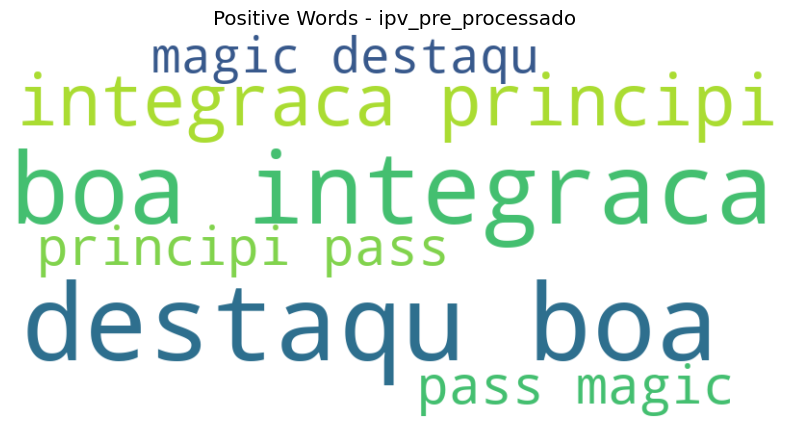

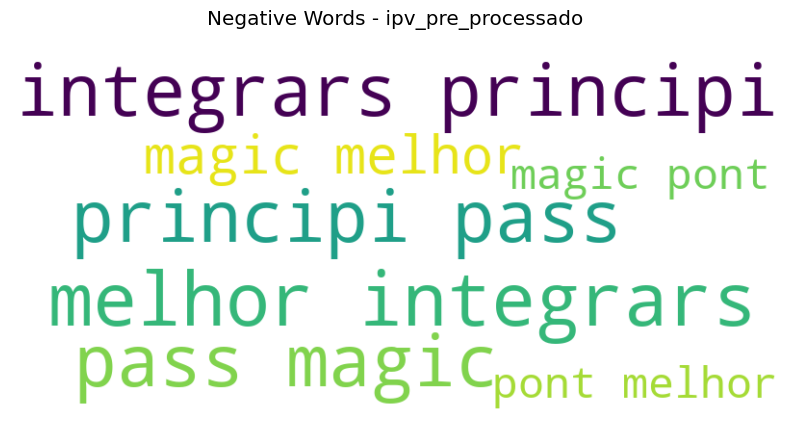

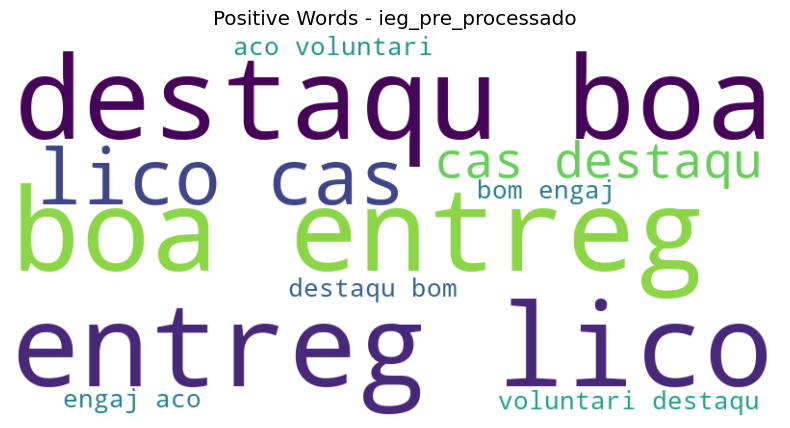

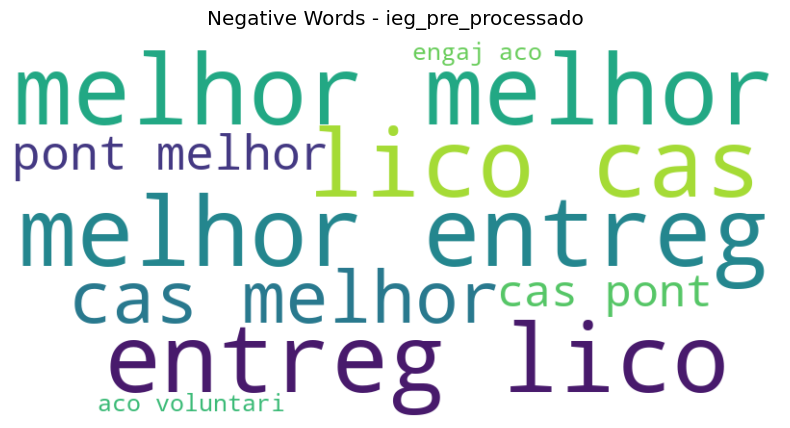

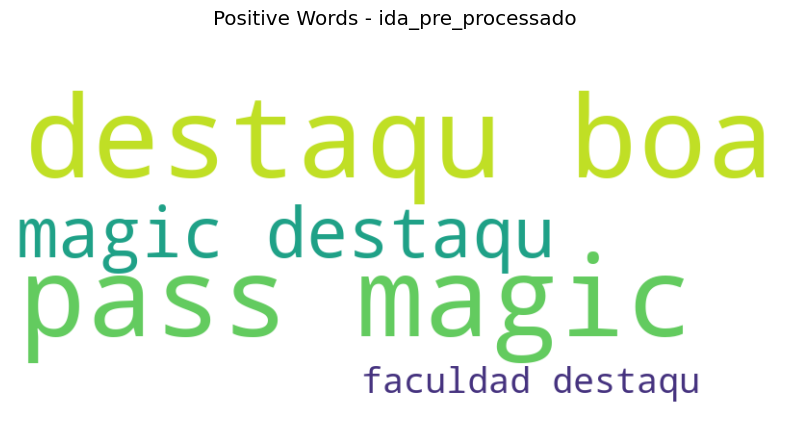

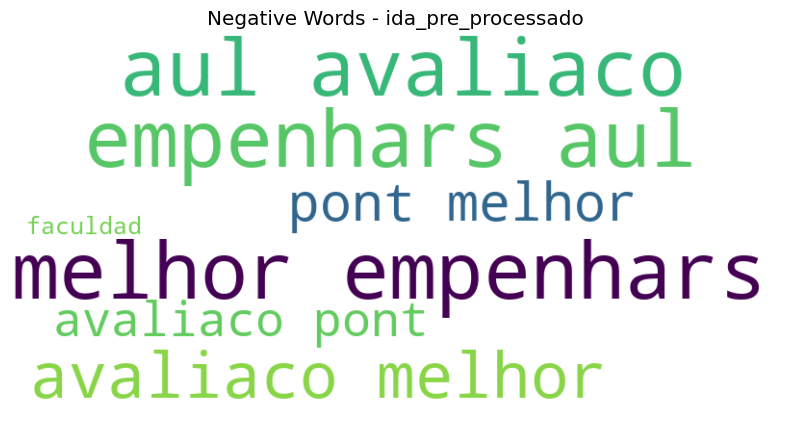


Statistics for ipv_pre_processado:
ipv_pre_processado_resultado
Negativo    0.545048
Positivo    0.454952
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
destaqu      712
boa          712
integraca    712
principi     712
pass         712
magic        712
Name: count, dtype: int64

Top 10 words in negative sentiments:
melhor       853
integrars    853
pass         853
principi     853
magic        853
pont         368
Name: count, dtype: int64

Statistics for ieg_pre_processado:
ieg_pre_processado_resultado
Positivo    0.670233
Negativo    0.329767
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
destaqu      1065
boa          1053
entreg       1053
lico         1053
cas          1053
bom            12
engaj          12
aco            12
voluntari      12
Name: count, dtype: int64

Top 10 words in negative sentiments:
melhor       1048
entreg        512
lico          512
cas           512
pont          239
engaj          12
aco            1

In [78]:
from wordcloud import WordCloud


def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


# Combine all pre-processed text for each sentiment
for col in pre_proc_cols:
    positive_text = " ".join(
        df_sentimento_destaque[
            df_sentimento_destaque[f"{col}_resultado"] == "Positivo"
        ][col].dropna()
    )
    negative_text = " ".join(
        df_sentimento_destaque[
            df_sentimento_destaque[f"{col}_resultado"] == "Negativo"
        ][col].dropna()
    )

    # Generate word clouds
    generate_wordcloud(positive_text, f"Positive Words - {col}")
    generate_wordcloud(negative_text, f"Negative Words - {col}")

# Print some statistics
for col in pre_proc_cols:
    print(f"\nStatistics for {col}:")
    print(df_sentimento_destaque[f"{col}_resultado"].value_counts(normalize=True))
    print("\nTop 10 words in positive sentiments:")
    print(
        pd.Series(
            " ".join(
                df_sentimento_destaque[
                    df_sentimento_destaque[f"{col}_resultado"] == "Positivo"
                ][col].dropna()
            ).split()
        )
        .value_counts()
        .head(10)
    )
    print("\nTop 10 words in negative sentiments:")
    print(
        pd.Series(
            " ".join(
                df_sentimento_destaque[
                    df_sentimento_destaque[f"{col}_resultado"] == "Negativo"
                ][col].dropna()
            ).split()
        )
        .value_counts()
        .head(10)
    )


In [79]:
pre_proc_res_cols = df_sentimento_destaque.columns[
    list(df_sentimento_destaque.columns.str.endswith("_resultado"))
].to_list()

df_sentimento_destaque[pre_proc_res_cols].head()


ipv_pre_processado_resultado ieg_pre_processado_resultado  \
id_aluno_ano                                                             
aluno1_2020                      Positivo                     Positivo   
aluno1_2021                           NaN                          NaN   
aluno2_2022                      Positivo                     Positivo   
aluno3_2020                      Positivo                     Positivo   
aluno3_2021                           NaN                          NaN   

             ida_pre_processado_resultado  
id_aluno_ano                               
aluno1_2020                      Negativo  
aluno1_2021                           NaN  
aluno2_2022                      Positivo  
aluno3_2020                      Negativo  
aluno3_2021                           NaN

In [80]:
df = {}
for col in pre_proc_res_cols:
    df.update({col: df_sentimento_destaque[col].value_counts()})
df = pd.DataFrame(df)

df


ipv_pre_processado_resultado  ieg_pre_processado_resultado  \
Negativo                           853                           524   
Positivo                           712                          1065   

          ida_pre_processado_resultado  
Negativo                          1031  
Positivo                           558

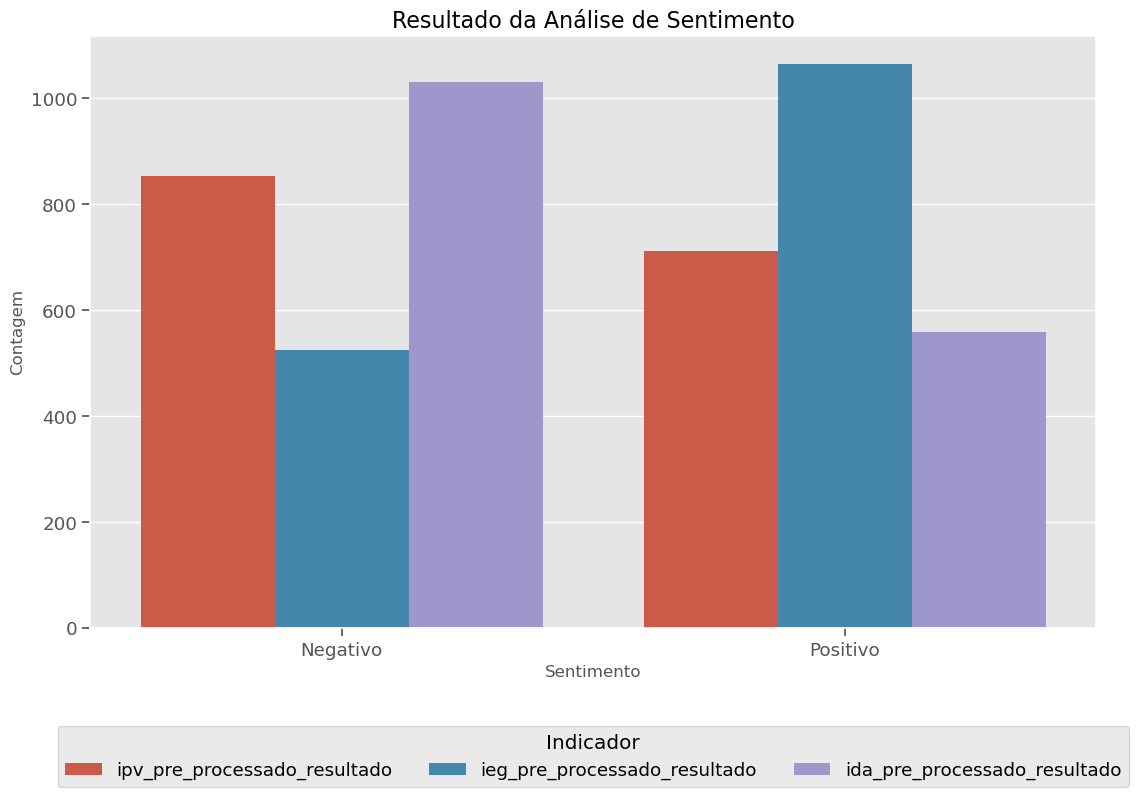

In [81]:
# Melt the dataframe to create a long format suitable for seaborn
df_melted = df.reset_index().melt(
    id_vars="index", var_name="Column", value_name="Count"
)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="index", y="Count", hue="Column")

plt.title("Resultado da Análise de Sentimento", fontsize=16)
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.xticks(rotation=0)

# Reposition the legend to the bottom
plt.legend(title="Indicador", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Adjust the bottom margin to make room for the legend
plt.subplots_adjust(bottom=0.2)

plt.show()


In [82]:
df_sentimento_destaque_num = df_sentimento_destaque[
    [
        "ipv_pre_processado_resultado",
        "ieg_pre_processado_resultado",
        "ida_pre_processado_resultado",
    ]
].copy()
sentiment_columns = df_sentimento_destaque_num.columns

for c in sentiment_columns:
    df_sentimento_destaque_num[c] = df_sentimento_destaque_num[c].apply(
        lambda x: str(x).strip()
    )
df_sentimento_destaque_num.value_counts()


ipv_pre_processado_resultado  ieg_pre_processado_resultado  ida_pre_processado_resultado
nan                           nan                           nan                             684
Negativo                      Negativo                      Negativo                        329
                              Positivo                      Negativo                        300
Positivo                      Positivo                      Positivo                        289
                                                            Negativo                        279
Negativo                      Positivo                      Positivo                        185
Positivo                      Negativo                      Negativo                        119
Negativo                      Negativo                      Positivo                         39
Positivo                      Negativo                      Positivo                         25
nan                           Positivo                      Positivo                         11
                              Negativo                      Positivo                          9
                                                            Negativo                          3
                              Positivo                      Negativo                          1
Name: count, dtype: int64

In [83]:
#  import category_encoders as ce

# destaque_encoder = ce.OrdinalEncoder(
#     mapping=[{
#         "col":'ipv_pre_processado_resultado',
#         "mapping": {
#             "Positivo": 3,
#             "Negativo":-3,
#         }
#     },
#     {"col":'ieg_pre_processado_resultado',
#         "mapping": {
#             "Positivo": 3,
#             "Negativo":-3,
#         }
#     },
#     {"col":'ida_pre_processado_resultado',
#         "mapping": {
#             "Positivo": 3,
#             "Negativo":-3,

#         }
#     }]
# )

# destaque_encoder.fit_transform(df_sentimento_destaque_num).value_counts()


In [84]:
# convert columns to type str
for c in sentiment_columns:
    df_sentimento_destaque_num[c] = (
        df_sentimento_destaque_num[c]
        .apply(lambda x: str(x).strip())
        .map({"Positivo": 1, "Negativo": -1})
    )

df_sentimento_destaque_num.value_counts()


ipv_pre_processado_resultado  ieg_pre_processado_resultado  ida_pre_processado_resultado
-1.0                          -1.0                          -1.0                            329
                               1.0                          -1.0                            300
 1.0                           1.0                           1.0                            289
                                                            -1.0                            279
-1.0                           1.0                           1.0                            185
 1.0                          -1.0                          -1.0                            119
-1.0                          -1.0                           1.0                             39
 1.0                          -1.0                           1.0                             25
Name: count, dtype: int64

In [85]:
df_sentimento_destaque_num["ida_pre_processado_resultado"].value_counts()


ida_pre_processado_resultado
-1.0    1031
 1.0     558
Name: count, dtype: int64

In [86]:
df_sentimento_destaque_num.corr()


ipv_pre_processado_resultado  \
ipv_pre_processado_resultado                      1.000000   
ieg_pre_processado_resultado                      0.243235   
ida_pre_processado_resultado                      0.187048   

                              ieg_pre_processado_resultado  \
ipv_pre_processado_resultado                      0.243235   
ieg_pre_processado_resultado                      1.000000   
ida_pre_processado_resultado                      0.311315   

                              ida_pre_processado_resultado  
ipv_pre_processado_resultado                      0.187048  
ieg_pre_processado_resultado                      0.311315  
ida_pre_processado_resultado                      1.000000

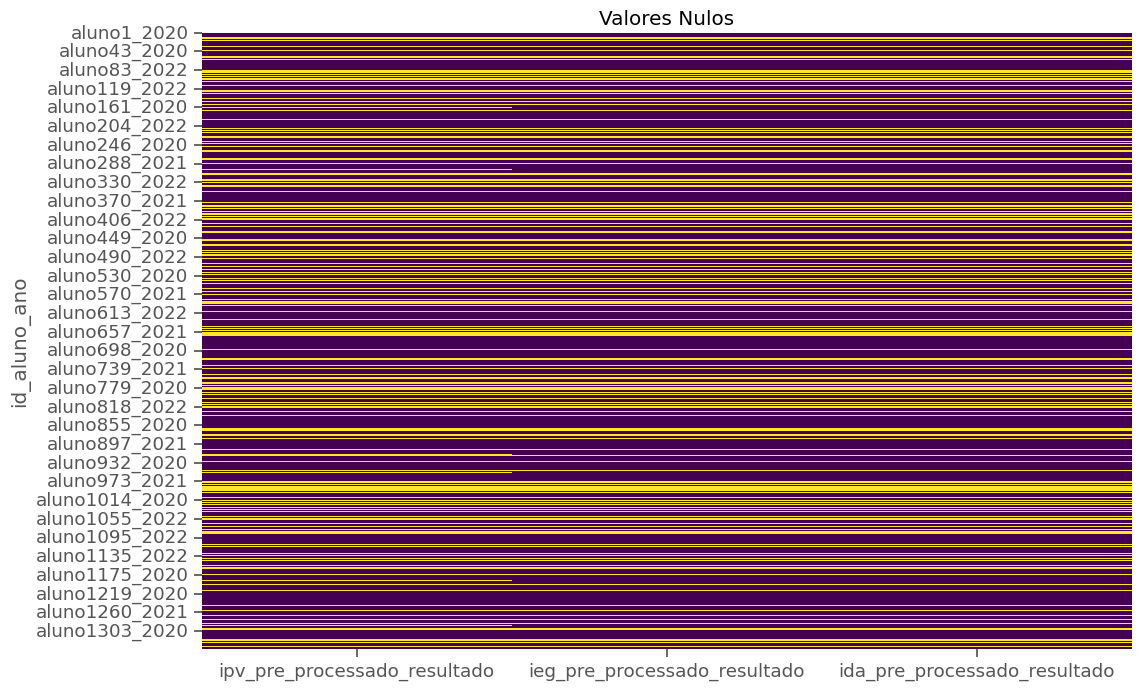

In [87]:
# visualizar os valores nulos na forma de um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_sentimento_destaque_num.isnull(), cbar=False, cmap="viridis")
plt.title("Valores Nulos")
plt.show()


#### Análise de sentimento das colunas `rec_ava`

In [88]:
for c in ["rec_ava_1", "rec_ava_2", "rec_ava_3", "rec_ava_4"]:
    print(df_complete[c].astype(str).apply(preprocess_text).unique())


['nan' 'promov fas' 'mant fas bols' 'mant fas atual' 'promov fas bols'
 'nao avali' 'aloc fas anteri']
['non' 'promov fas' 'mant fas atual' 'nao avali' 'promov fas bols'
 'mant fas bols' 'aloc fas anteri']
['non' 'mant fas atual' 'promov fas' 'promov fas bols' 'nao avali'
 'mant fas bols' 'aloc fas anteri']
['non' 'nao avali' 'mant fas atual' 'promov fas' 'promov fas bols'
 'mant fas bols' 'aloc fas anteri']


In [89]:
df_sentimento_rec_ava = pd.DataFrame(
    {
        "rec_ava_1": df_complete["rec_ava_1"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
        "rec_ava_2": df_complete["rec_ava_2"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
        "rec_ava_3": df_complete["rec_ava_3"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
        "rec_ava_4": df_complete["rec_ava_4"]
        .astype(str)
        .apply(lambda x: "" if pd.isna(x) else x),
    }
)

df_sentimento_rec_ava.head()

for col in df_sentimento_rec_ava.columns:
    df_sentimento_rec_ava[f"{col}_pre_processado"] = df_sentimento_rec_ava[col].apply(
        preprocess_text,
    )


In [90]:
df_sentimento_rec_ava


rec_ava_1                  rec_ava_2  \
id_aluno_ano                                                         
aluno1_2020                         nan                       None   
aluno1_2021           Promovido de Fase          Promovido de Fase   
aluno2_2022     Mantido na Fase + Bolsa      Mantido na Fase atual   
aluno3_2020                         nan                       None   
aluno3_2021           Promovido de Fase          Promovido de Fase   
...                                 ...                        ...   
aluno1347_2020                      nan                       None   
aluno1348_2020                      nan                       None   
aluno1348_2021        Promovido de Fase  Promovido de Fase + Bolsa   
aluno1348_2022    Mantido na Fase atual      Mantido na Fase atual   
aluno1349_2022        Promovido de Fase      Mantido na Fase atual   

                            rec_ava_3                rec_ava_4  \
id_aluno_ano                                                     
aluno1_2020                      None                     None   
aluno1_2021     Mantido na Fase atual             Não avaliado   
aluno2_2022                      None                     None   
aluno3_2020                      None                     None   
aluno3_2021     Mantido na Fase atual             Não avaliado   
...                               ...                      ...   
aluno1347_2020                   None                     None   
aluno1348_2020                   None                     None   
aluno1348_2021      Promovido de Fase             Não avaliado   
aluno1348_2022      Promovido de Fase        Promovido de Fase   
aluno1349_2022      Promovido de Fase  Mantido na Fase + Bolsa   

               rec_ava_1_pre_processado rec_ava_2_pre_processado  \
id_aluno_ano                                                       
aluno1_2020                         nan                      non   
aluno1_2021                  promov fas               promov fas   
aluno2_2022               mant fas bols           mant fas atual   
aluno3_2020                         nan                      non   
aluno3_2021                  promov fas               promov fas   
...                                 ...                      ...   
aluno1347_2020                      nan                      non   
aluno1348_2020                      nan                      non   
aluno1348_2021               promov fas          promov fas bols   
aluno1348_2022           mant fas atual           mant fas atual   
aluno1349_2022               promov fas           mant fas atual   

               rec_ava_3_pre_processado rec_ava_4_pre_processado  
id_aluno_ano                                                      
aluno1_2020                         non                      non  
aluno1_2021              mant fas atual                nao avali  
aluno2_2022                         non                      non  
aluno3_2020                         non                      non  
aluno3_2021              mant fas atual                nao avali  
...                                 ...                      ...  
aluno1347_2020                      non                      non  
aluno1348_2020                      non                      non  
aluno1348_2021               promov fas                nao avali  
aluno1348_2022               promov fas               promov fas  
aluno1349_2022               promov fas            mant fas bols  

[2273 rows x 8 columns]

In [91]:
df_sentimento_rec_ava.isnull().sum()


rec_ava_1                   0
rec_ava_2                   0
rec_ava_3                   0
rec_ava_4                   0
rec_ava_1_pre_processado    0
rec_ava_2_pre_processado    0
rec_ava_3_pre_processado    0
rec_ava_4_pre_processado    0
dtype: int64

In [92]:
pre_proc_cols = df_sentimento_rec_ava.columns[
    list(df_sentimento_rec_ava.columns.str.endswith("_pre_processado"))
].to_list()


In [93]:
positive_words = ["promov fas", "promov fas bols"]
negative_words = ["aloc fas anteri"]
neutral_words = ["nao avali", "mant fas atual", "mant fas bols"]

for col in pre_proc_cols:
    df_sentimento_rec_ava[f"{col}_resultado"] = df_sentimento_rec_ava[col].apply(
        analyze_sentiment,
        positive_words=positive_words,
        negative_words=negative_words,
        neutral_words=neutral_words,
    )

df_sentimento_rec_ava


rec_ava_1                  rec_ava_2  \
id_aluno_ano                                                         
aluno1_2020                         nan                       None   
aluno1_2021           Promovido de Fase          Promovido de Fase   
aluno2_2022     Mantido na Fase + Bolsa      Mantido na Fase atual   
aluno3_2020                         nan                       None   
aluno3_2021           Promovido de Fase          Promovido de Fase   
...                                 ...                        ...   
aluno1347_2020                      nan                       None   
aluno1348_2020                      nan                       None   
aluno1348_2021        Promovido de Fase  Promovido de Fase + Bolsa   
aluno1348_2022    Mantido na Fase atual      Mantido na Fase atual   
aluno1349_2022        Promovido de Fase      Mantido na Fase atual   

                            rec_ava_3                rec_ava_4  \
id_aluno_ano                                                     
aluno1_2020                      None                     None   
aluno1_2021     Mantido na Fase atual             Não avaliado   
aluno2_2022                      None                     None   
aluno3_2020                      None                     None   
aluno3_2021     Mantido na Fase atual             Não avaliado   
...                               ...                      ...   
aluno1347_2020                   None                     None   
aluno1348_2020                   None                     None   
aluno1348_2021      Promovido de Fase             Não avaliado   
aluno1348_2022      Promovido de Fase        Promovido de Fase   
aluno1349_2022      Promovido de Fase  Mantido na Fase + Bolsa   

               rec_ava_1_pre_processado rec_ava_2_pre_processado  \
id_aluno_ano                                                       
aluno1_2020                         nan                      non   
aluno1_2021                  promov fas               promov fas   
aluno2_2022               mant fas bols           mant fas atual   
aluno3_2020                         nan                      non   
aluno3_2021                  promov fas               promov fas   
...                                 ...                      ...   
aluno1347_2020                      nan                      non   
aluno1348_2020                      nan                      non   
aluno1348_2021               promov fas          promov fas bols   
aluno1348_2022           mant fas atual           mant fas atual   
aluno1349_2022               promov fas           mant fas atual   

               rec_ava_3_pre_processado rec_ava_4_pre_processado  \
id_aluno_ano                                                       
aluno1_2020                         non                      non   
aluno1_2021              mant fas atual                nao avali   
aluno2_2022                         non                      non   
aluno3_2020                         non                      non   
aluno3_2021              mant fas atual                nao avali   
...                                 ...                      ...   
aluno1347_2020                      non                      non   
aluno1348_2020                      non                      non   
aluno1348_2021               promov fas                nao avali   
aluno1348_2022               promov fas               promov fas   
aluno1349_2022               promov fas            mant fas bols   

               rec_ava_1_pre_processado_resultado  \
id_aluno_ano                                        
aluno1_2020                                   NaN   
aluno1_2021                              Positivo   
aluno2_2022                                Neutro   
aluno3_2020                                   NaN   
aluno3_2021                              Positivo   
...                                           ...   
aluno1347_2020                                NaN   
aluno1348_202

In [94]:
pre_proc_res_cols = df_sentimento_rec_ava.columns[
    list(df_sentimento_rec_ava.columns.str.endswith("_resultado"))
].to_list()

df = {}
for col in pre_proc_res_cols:
    df.update({col: df_sentimento_rec_ava[col].value_counts()})
df = pd.DataFrame(df)

df


rec_ava_1_pre_processado_resultado  \
Negativo                                   9   
Neutro                                   756   
Positivo                                 781   

          rec_ava_2_pre_processado_resultado  \
Negativo                                   9   
Neutro                                   956   
Positivo                                 581   

          rec_ava_3_pre_processado_resultado  \
Negativo                                   7   
Neutro                                   742   
Positivo                                 561   

          rec_ava_4_pre_processado_resultado  
Negativo                                  39  
Neutro                                   670  
Positivo                                 260

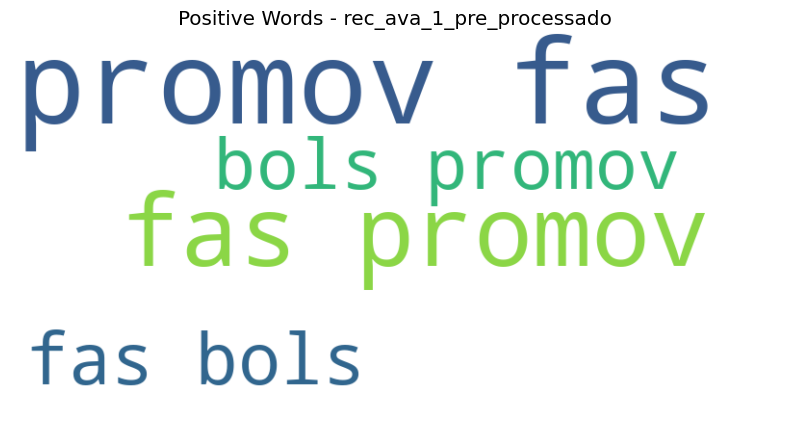

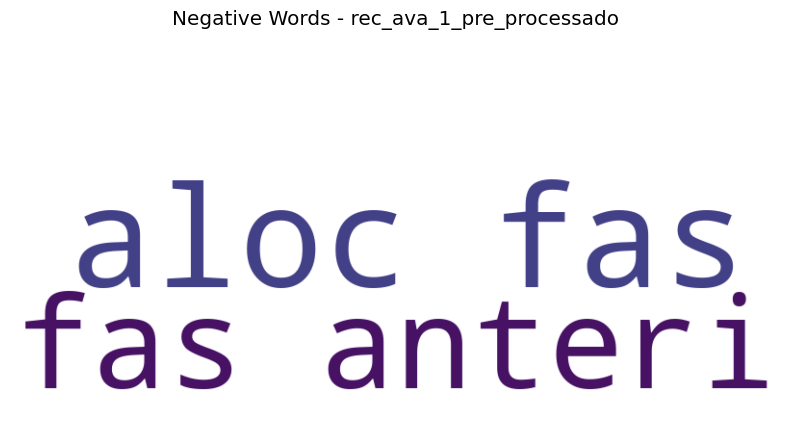

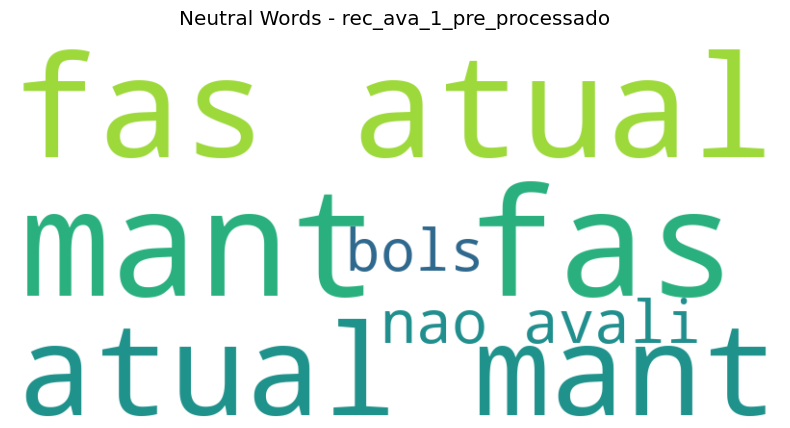

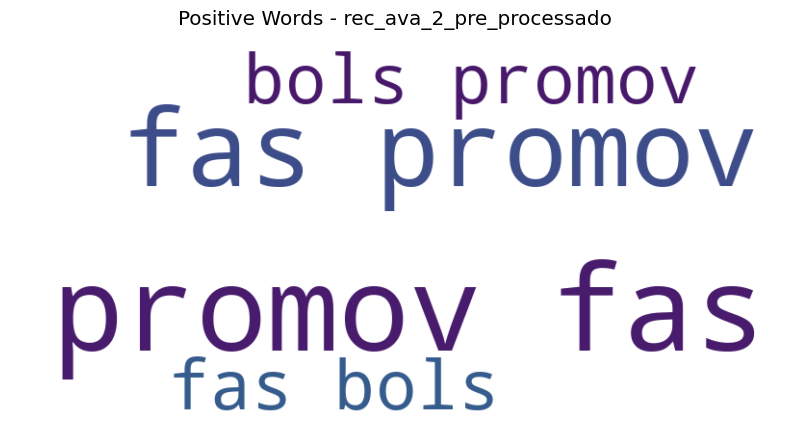

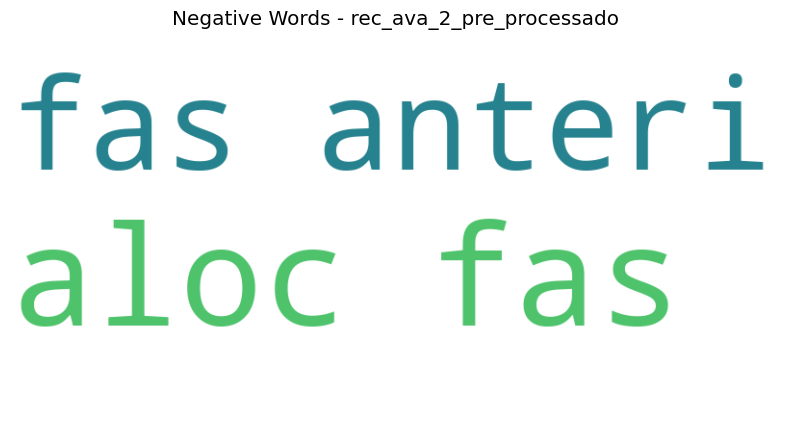

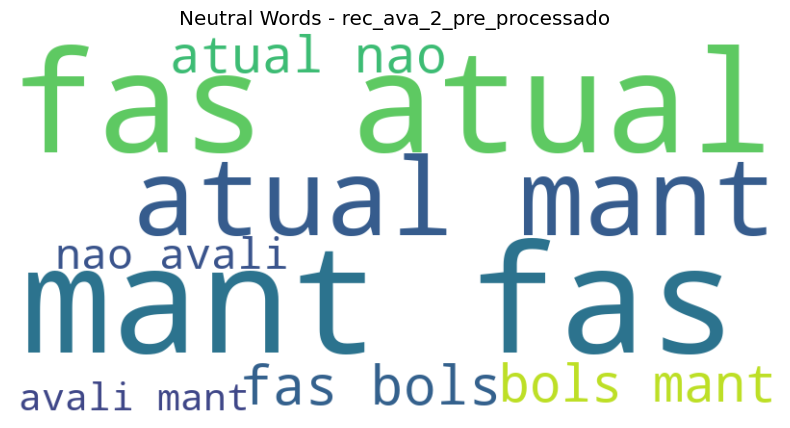

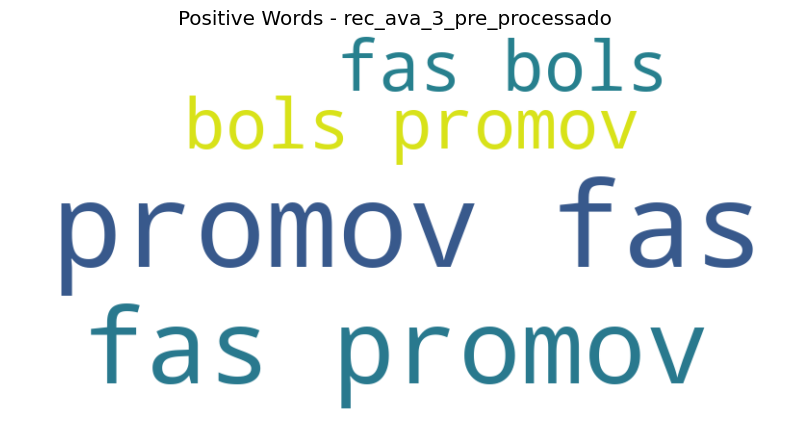

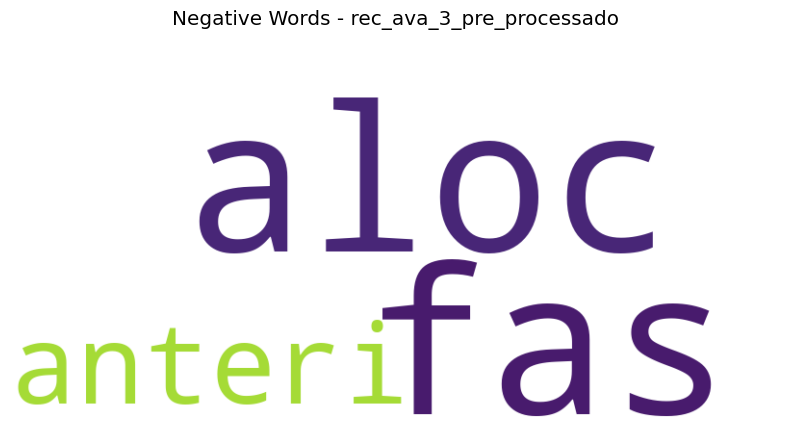

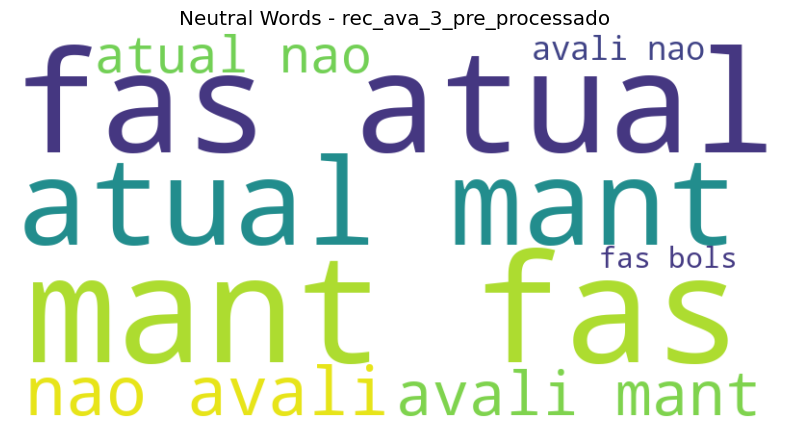

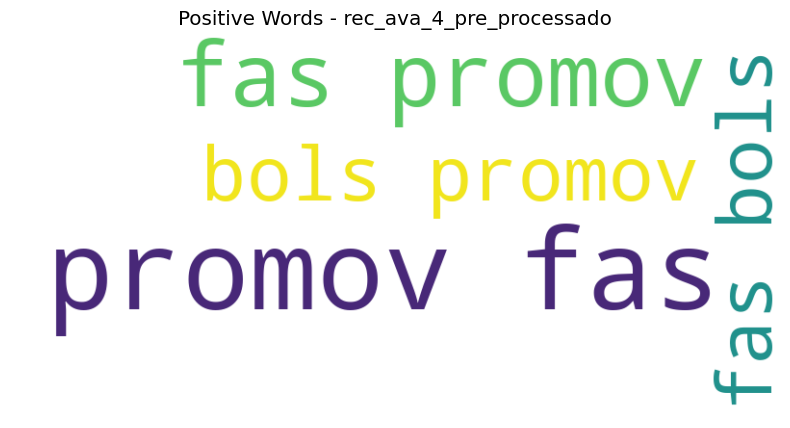

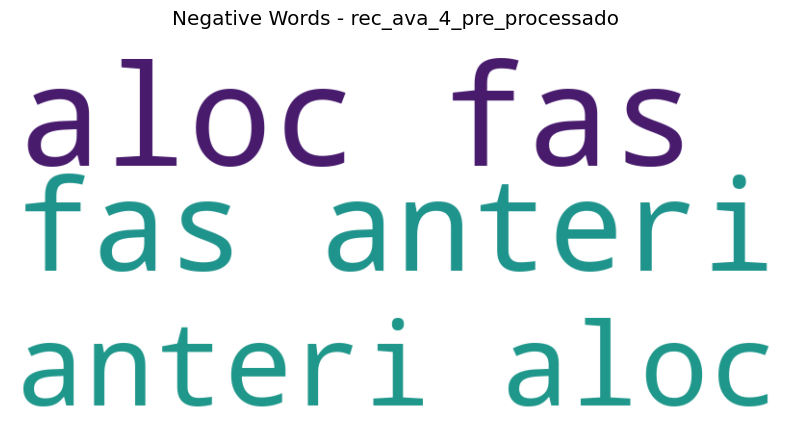

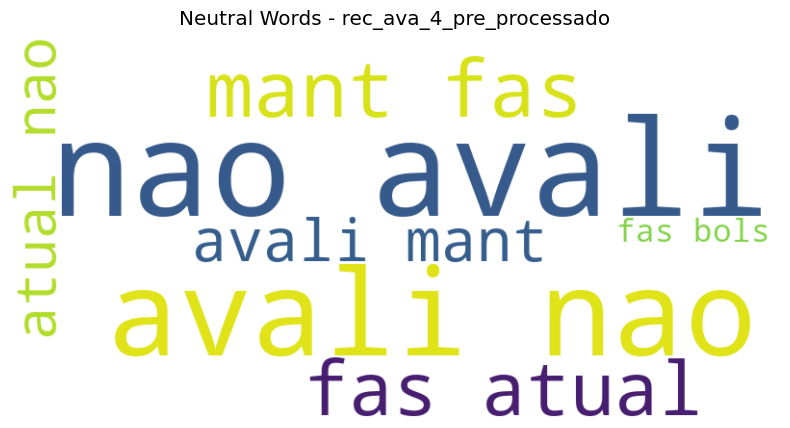


Statistics for rec_ava_1_pre_processado:
rec_ava_1_pre_processado_resultado
Positivo    0.505175
Neutro      0.489004
Negativo    0.005821
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
promov    781
fas       781
bols      240
Name: count, dtype: int64

Top 10 words in negative sentiments:
aloc      9
fas       9
anteri    9
Name: count, dtype: int64

Top 10 words in neutral sentiments:
mant     743
fas      743
atual    731
nao       13
avali     13
bols      12
Name: count, dtype: int64

Statistics for rec_ava_2_pre_processado:
rec_ava_2_pre_processado_resultado
Neutro      0.618370
Positivo    0.375809
Negativo    0.005821
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
promov    581
fas       581
bols      128
Name: count, dtype: int64

Top 10 words in negative sentiments:
aloc      9
fas       9
anteri    9
Name: count, dtype: int64

Top 10 words in neutral sentiments:
mant     938
fas      938
atual    919
bols      19
nao       18

In [95]:
# Combine all pre-processed text for each sentiment
for col in pre_proc_cols:
    positive_text = " ".join(
        df_sentimento_rec_ava[df_sentimento_rec_ava[f"{col}_resultado"] == "Positivo"][
            col
        ].dropna()
    )
    negative_text = " ".join(
        df_sentimento_rec_ava[df_sentimento_rec_ava[f"{col}_resultado"] == "Negativo"][
            col
        ].dropna()
    )
    neutral_text = " ".join(
        df_sentimento_rec_ava[df_sentimento_rec_ava[f"{col}_resultado"] == "Neutro"][
            col
        ].dropna()
    )

    # Generate word clouds
    generate_wordcloud(positive_text, f"Positive Words - {col}")
    generate_wordcloud(negative_text, f"Negative Words - {col}")
    generate_wordcloud(neutral_text, f"Neutral Words - {col}")


# Print some statistics
for col in pre_proc_cols:
    print(f"\nStatistics for {col}:")
    print(df_sentimento_rec_ava[f"{col}_resultado"].value_counts(normalize=True))
    print("\nTop 10 words in positive sentiments:")
    print(
        pd.Series(
            " ".join(
                df_sentimento_rec_ava[
                    df_sentimento_rec_ava[f"{col}_resultado"] == "Positivo"
                ][col].dropna()
            ).split()
        )
        .value_counts()
        .head(10)
    )
    print("\nTop 10 words in negative sentiments:")
    print(
        pd.Series(
            " ".join(
                df_sentimento_rec_ava[
                    df_sentimento_rec_ava[f"{col}_resultado"] == "Negativo"
                ][col].dropna()
            ).split()
        )
        .value_counts()
        .head(10)
    )
    print("\nTop 10 words in neutral sentiments:")
    print(
        pd.Series(
            " ".join(
                df_sentimento_rec_ava[
                    df_sentimento_rec_ava[f"{col}_resultado"] == "Neutro"
                ][col].dropna()
            ).split()
        )
        .value_counts()
        .head(10)
    )


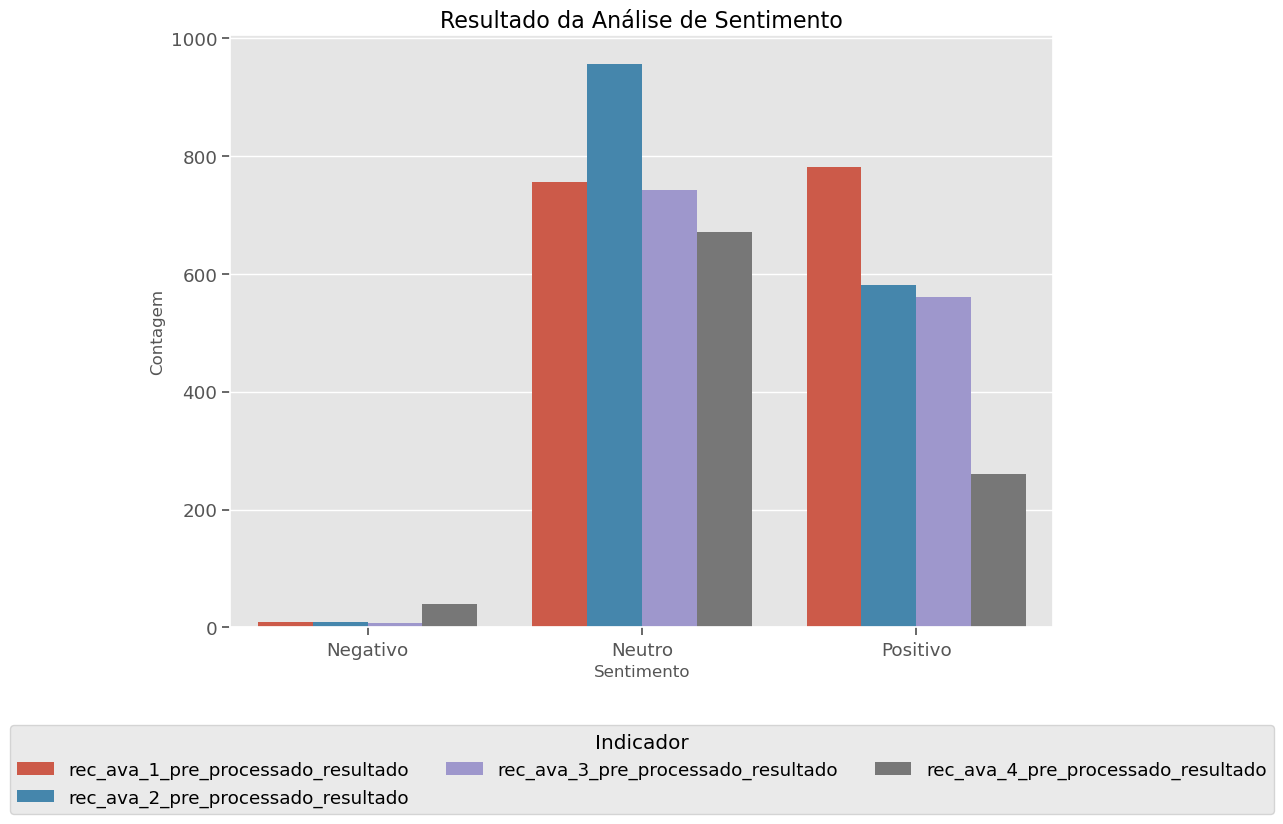

In [96]:
# Melt the dataframe to create a long format suitable for seaborn
df_melted = df.reset_index().melt(
    id_vars="index", var_name="Column", value_name="Count"
)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x="index", y="Count", hue="Column")

plt.title("Resultado da Análise de Sentimento", fontsize=16)
plt.xlabel("Sentimento", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.xticks(rotation=0)

# Reposition the legend to the bottom
plt.legend(title="Indicador", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Adjust the bottom margin to make room for the legend
plt.subplots_adjust(bottom=0.2)

plt.show()


In [97]:
res_cols = df_sentimento_rec_ava.columns[
    list(df_sentimento_rec_ava.columns.str.endswith("_resultado"))
].to_list()

df_sentimento_rec_ava_num = df_sentimento_rec_ava[res_cols].copy()
# convert columns to type str
for c in res_cols:
    df_sentimento_rec_ava_num[c] = (
        df_sentimento_rec_ava_num[c]
        .apply(lambda x: str(x).strip())
        .map({"Positivo": 1, "Negativo": -1, "Neutro": 0})
    )

df_sentimento_rec_ava_num.value_counts()


rec_ava_1_pre_processado_resultado  rec_ava_2_pre_processado_resultado  rec_ava_3_pre_processado_resultado  rec_ava_4_pre_processado_resultado
 0.0                                 0.0                                 0.0                                 0.0                                  216
 1.0                                 0.0                                 0.0                                 0.0                                  102
                                     1.0                                 1.0                                 1.0                                   98
                                     0.0                                 1.0                                 1.0                                   95
                                     1.0                                 1.0                                 0.0                                   91
                                     0.0                                 1.0                                 0.0                                   78
                                     1.0                                 0.0                                 0.0                                   65
 0.0                                 1.0                                 0.0                                 0.0                                   53
                                     0.0                                 1.0                                 0.0                                   32
 1.0                                 0.0                                 0.0                                 1.0                                   24
 0.0                                 1.0                                 1.0                                 0.0                                   16
                                                                                                             1.0                                   13
 1.0                                 0.0                                 0.0                                -1.0                                   12
 0.0                                 0.0                                 0.0                                 1.0                                   12
                                                                                                            -1.0                                   10
                                                                         1.0                                 1.0                                    9
 1.0                                 1.0                                 0.0                                 1.0                                    7
 0.0                                -1.0                                 0.0                                 0.0                                    7
                                     0.0                                 1.0                                -1.0                                    7
 1.0                                 0.0                                 1.0                                -1.0                                    6
-1.0                                 0.0                                 0.0                                 0.0                                    5
                                     1.0                                 0.0                                 0.0                                    2
 1.0                                -1.0                                 1.0                                 0.0                                    2
 0.0                                 1.0                                -1.0                                 1.0                                    1
-1.0                                 0.0                                 1.0                                -1.0                                    1
                                                                                                           

In [98]:
df_sentimento_rec_ava_num.isnull().sum()


rec_ava_1_pre_processado_resultado     727
rec_ava_2_pre_processado_resultado     727
rec_ava_3_pre_processado_resultado     963
rec_ava_4_pre_processado_resultado    1304
dtype: int64

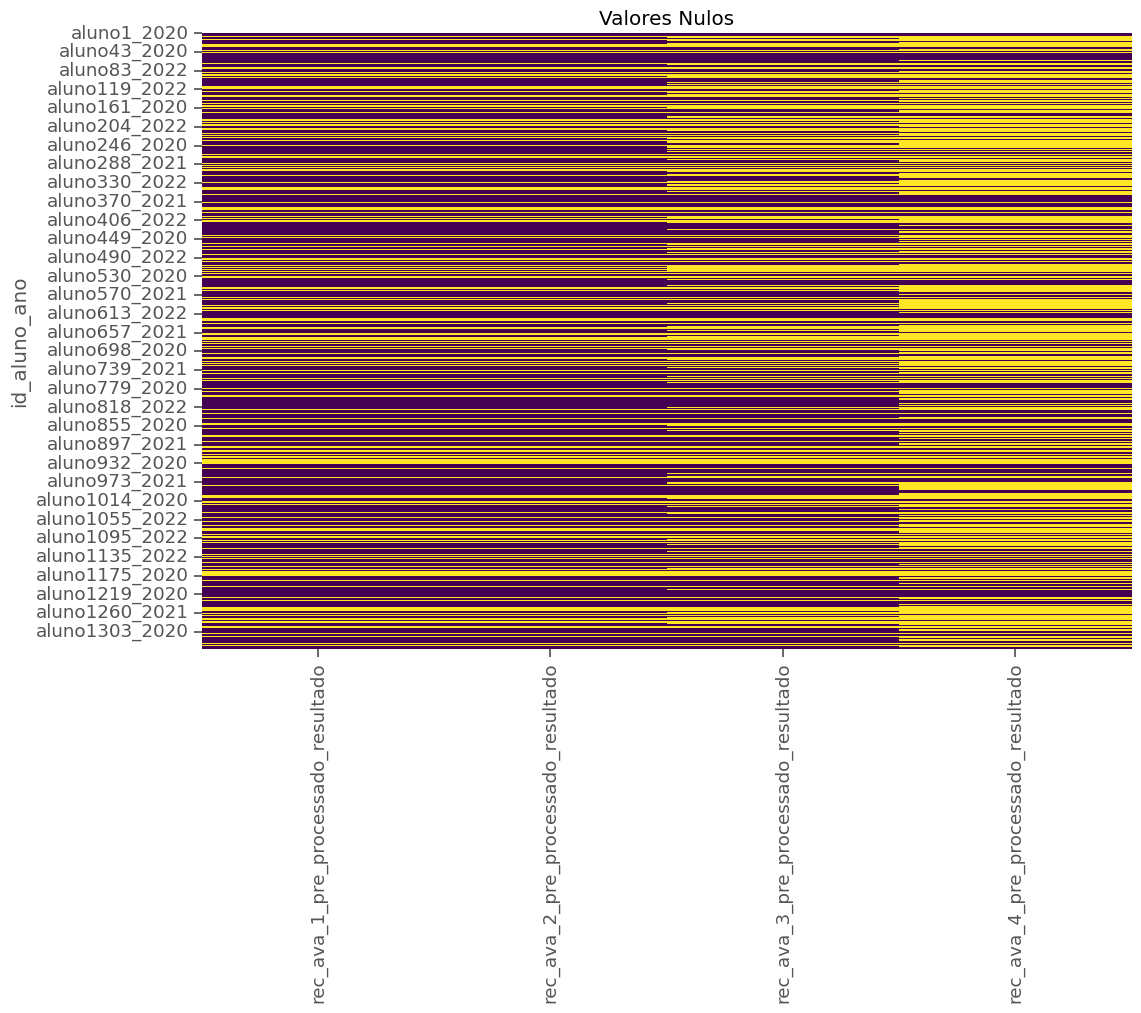

In [99]:
# visualizar os valores nulos na forma de um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_sentimento_rec_ava_num.isnull(), cbar=False, cmap="viridis")
plt.title("Valores Nulos")
plt.show()


# Construção do Dataframe Completo para modelagem

## Tratamento de valores nulos

In [100]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 no

In [101]:
df_sentimento_destaque_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ipv_pre_processado_resultado  1565 non-null   float64
 1   ieg_pre_processado_resultado  1589 non-null   float64
 2   ida_pre_processado_resultado  1589 non-null   float64
dtypes: float64(3)
memory usage: 135.6+ KB


In [102]:
df_sentimento_rec_ava_num.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rec_ava_1_pre_processado_resultado  1546 non-null   float64
 1   rec_ava_2_pre_processado_resultado  1546 non-null   float64
 2   rec_ava_3_pre_processado_resultado  1310 non-null   float64
 3   rec_ava_4_pre_processado_resultado  969 non-null    float64
dtypes: float64(4)
memory usage: 153.3+ KB


In [103]:
df_categorias = df_complete[
    list([c for c in df_complete.columns if c.startswith("categoria_")])
]

df_categorias.head()


categoria_instituicao categoria_pedra categoria_defasagem  \
id_aluno_ano                                                             
aluno1_2020         Escola Pública        Ametista                None   
aluno1_2021       Escolas Privadas        Ametista                -1.0   
aluno2_2022                   None        Ametista                None   
aluno3_2020         Escola Pública        Ametista                None   
aluno3_2021         Escola Pública        Ametista               >=0.0   

             categoria_bolsista  
id_aluno_ano                     
aluno1_2020                None  
aluno1_2021                None  
aluno2_2022                 Não  
aluno3_2020                None  
aluno3_2021                None

In [104]:
for c in df_categorias.columns:
    print(list(df_categorias[c].unique()))


['Escola Pública', 'Escolas Privadas', None, 'Ensino Superior Privado']
['Ametista', 'Quartzo', 'Topázio', 'Ágata']
[None, '-1.0', '>=0.0', '<=-2.0']
[None, 'Não', 'Sim']


In [105]:
df_categorias[df_categorias["categoria_defasagem"] == "<=-2.0"]


categoria_instituicao categoria_pedra categoria_defasagem  \
id_aluno_ano                                                               
aluno17_2021          Escola Pública           Ágata              <=-2.0   
aluno29_2021          Escola Pública           Ágata              <=-2.0   
aluno36_2021          Escola Pública           Ágata              <=-2.0   
aluno60_2021        Escolas Privadas        Ametista              <=-2.0   
aluno85_2021          Escola Pública           Ágata              <=-2.0   
...                              ...             ...                 ...   
aluno1278_2021        Escola Pública           Ágata              <=-2.0   
aluno1287_2021        Escola Pública        Ametista              <=-2.0   
aluno1302_2021        Escola Pública         Quartzo              <=-2.0   
aluno1326_2021        Escola Pública         Quartzo              <=-2.0   
aluno1344_2021        Escola Pública           Ágata              <=-2.0   

               categoria_bolsista  
id_aluno_ano                       
aluno17_2021                 None  
aluno29_2021                 None  
aluno36_2021                 None  
aluno60_2021                 None  
aluno85_2021                 None  
...                           ...  
aluno1278_2021               None  
aluno1287_2021               None  
aluno1302_2021               None  
aluno1326_2021               None  
aluno1344_2021               None  

[102 rows x 4 columns]

##### Encoding das colunas `categoria_`

In [106]:
import category_encoders as ce

ordinal_encoder = ce.OrdinalEncoder(
    handle_missing="ignore",
    handle_unknown="ignore",
    mapping=[
        {
            "col": "categoria_pedra",
            "mapping": {"Topázio": 4, "Ametista": 3, "Ágata": 2, "Quartzo": 1},
        },
        {
            "col": "categoria_defasagem",
            "mapping": {
                ">=0.0": 0,
                "-1.0": -1,
                "<=-2.0": -2,
            },
        },
    ],
)

ordinal_encoder.fit_transform(
    df_categorias[["categoria_pedra", "categoria_defasagem"]]
).join(df_categorias[["categoria_pedra", "categoria_defasagem"]], lsuffix="enc")


categoria_pedraenc  categoria_defasagemenc categoria_pedra  \
id_aluno_ano                                                                 
aluno1_2020                      3                     NaN        Ametista   
aluno1_2021                      3                    -1.0        Ametista   
aluno2_2022                      3                     NaN        Ametista   
aluno3_2020                      3                     NaN        Ametista   
aluno3_2021                      3                     0.0        Ametista   
...                            ...                     ...             ...   
aluno1347_2020                   2                     NaN           Ágata   
aluno1348_2020                   3                     NaN        Ametista   
aluno1348_2021                   3                    -1.0        Ametista   
aluno1348_2022                   2                     NaN           Ágata   
aluno1349_2022                   2                     NaN           Ágata   

               categoria_defasagem  
id_aluno_ano                        
aluno1_2020                   None  
aluno1_2021                   -1.0  
aluno2_2022                   None  
aluno3_2020                   None  
aluno3_2021                  >=0.0  
...                            ...  
aluno1347_2020                None  
aluno1348_2020                None  
aluno1348_2021                -1.0  
aluno1348_2022                None  
aluno1349_2022                None  

[2273 rows x 4 columns]

In [107]:
onehot_encoder = ce.OneHotEncoder(
    handle_missing="return_nan", handle_unknown="return_nan"
)
onehot_encoder.fit_transform(
    df_categorias[["categoria_bolsista", "categoria_instituicao"]]
).join(df_categorias[["categoria_bolsista", "categoria_instituicao"]])


categoria_bolsista_1  categoria_bolsista_2  \
id_aluno_ano                                                 
aluno1_2020                      NaN                   NaN   
aluno1_2021                      NaN                   NaN   
aluno2_2022                      1.0                   0.0   
aluno3_2020                      NaN                   NaN   
aluno3_2021                      NaN                   NaN   
...                              ...                   ...   
aluno1347_2020                   NaN                   NaN   
aluno1348_2020                   NaN                   NaN   
aluno1348_2021                   NaN                   NaN   
aluno1348_2022                   0.0                   1.0   
aluno1349_2022                   1.0                   0.0   

                categoria_instituicao_1  categoria_instituicao_2  \
id_aluno_ano                                                       
aluno1_2020                         1.0                      0.0   
aluno1_2021                         0.0                      1.0   
aluno2_2022                         NaN                      NaN   
aluno3_2020                         1.0                      0.0   
aluno3_2021                         1.0                      0.0   
...                                 ...                      ...   
aluno1347_2020                      1.0                      0.0   
aluno1348_2020                      1.0                      0.0   
aluno1348_2021                      0.0                      1.0   
aluno1348_2022                      NaN                      NaN   
aluno1349_2022                      NaN                      NaN   

                categoria_instituicao_3 categoria_bolsista  \
id_aluno_ano                                                 
aluno1_2020                         0.0               None   
aluno1_2021                         0.0               None   
aluno2_2022                         NaN                Não   
aluno3_2020                         0.0               None   
aluno3_2021                         0.0               None   
...                                 ...                ...   
aluno1347_2020                      0.0               None   
aluno1348_2020                      0.0               None   
aluno1348_2021                      0.0               None   
aluno1348_2022                      NaN                Sim   
aluno1349_2022                      NaN                Não   

               categoria_instituicao  
id_aluno_ano                          
aluno1_2020           Escola Pública  
aluno1_2021         Escolas Privadas  
aluno2_2022                     None  
aluno3_2020           Escola Pública  
aluno3_2021           Escola Pública  
...                              ...  
aluno1347_2020        Escola Pública  
aluno1348_2020        Escola Pública  
aluno1348_2021      Escolas Privadas  
aluno1348_2022                  None  
aluno1349_2022                  None  

[2273 rows x 7 columns]

In [108]:
df_categorias_enc = ordinal_encoder.fit_transform(
    df_categorias[["categoria_pedra", "categoria_defasagem"]]
).join(
    onehot_encoder.fit_transform(
        df_categorias[["categoria_bolsista", "categoria_instituicao"]]
    )
)
df_categorias_enc.rename(
    columns={
        "categoria_pedra": "pedra",
        "categoria_defasagem": "defasagem",
        "categoria_bolsista_1": "bolsista",
        "categoria_bolsista_2": "nao_bolsista",
        "categoria_instituicao_1": "esc_publica",
        "categoria_instituicao_2": "esc_privada",
        "categoria_instituicao_3": "sup_privado",
    },
    inplace=True,
)
df_categorias_enc.head()


pedra  defasagem  bolsista  nao_bolsista  esc_publica  \
id_aluno_ano                                                          
aluno1_2020       3        NaN       NaN           NaN          1.0   
aluno1_2021       3       -1.0       NaN           NaN          0.0   
aluno2_2022       3        NaN       1.0           0.0          NaN   
aluno3_2020       3        NaN       NaN           NaN          1.0   
aluno3_2021       3        0.0       NaN           NaN          1.0   

              esc_privada  sup_privado  
id_aluno_ano                            
aluno1_2020           0.0          0.0  
aluno1_2021           1.0          0.0  
aluno2_2022           NaN          NaN  
aluno3_2020           0.0          0.0  
aluno3_2021           0.0          0.0

In [109]:
df_ano_enc = onehot_encoder.fit_transform(df_complete["ano"].apply(lambda x: str(x)))
df_ano_enc.rename(
    columns={"ano_1": "2020", "ano_2": "2021", "ano_3": "2022"}, inplace=True
)
df_ano_enc.head()


2020  2021  2022
id_aluno_ano                  
aluno1_2020    1.0   0.0   0.0
aluno1_2021    0.0   1.0   0.0
aluno2_2022    0.0   0.0   1.0
aluno3_2020    1.0   0.0   0.0
aluno3_2021    0.0   1.0   0.0

In [110]:
df_sexo_enc = onehot_encoder.fit_transform(df_complete["sexo"])
df_sexo_enc.rename(columns={"sexo_1": "fem", "sexo_2": "masc"}, inplace=True)
df_sexo_enc.head()


fem  masc
id_aluno_ano           
aluno1_2020   1.0   0.0
aluno1_2021   1.0   0.0
aluno2_2022   1.0   0.0
aluno3_2020   1.0   0.0
aluno3_2021   1.0   0.0

In [111]:
# cria coluna com 0 e 1 para sinalizar se o aluno está ou não na fase ideal
df_in_fase = df_complete[["fase", "fase_ideal"]]
df_in_fase["in_fase"] = np.where(
    df_in_fase["fase"] == df_in_fase["fase_ideal"],
    1,
    np.where(df_in_fase["fase_ideal"].isna(), 1, 0),
)

df_in_fase = df_in_fase["in_fase"]
df_in_fase.head()


id_aluno_ano
aluno1_2020    1
aluno1_2021    0
aluno2_2022    0
aluno3_2020    1
aluno3_2021    0
Name: in_fase, dtype: int64

In [112]:
df_ingressante_enc = onehot_encoder.fit_transform(
    df_complete["sinalizador_ingressante"]
)
df_ingressante_enc.drop(["sinalizador_ingressante_2"], axis=1, inplace=True)
df_ingressante_enc.rename(
    columns={"sinalizador_ingressante_1": "ingressante_2021"}, inplace=True
)
df_ingressante_enc


ingressante_2021
id_aluno_ano                    
aluno1_2020                  NaN
aluno1_2021                  1.0
aluno2_2022                  NaN
aluno3_2020                  NaN
aluno3_2021                  0.0
...                          ...
aluno1347_2020               NaN
aluno1348_2020               NaN
aluno1348_2021               0.0
aluno1348_2022               NaN
aluno1349_2022               NaN

[2273 rows x 1 columns]

In [113]:
df_ind_bolsa_2022 = onehot_encoder.fit_transform(df_complete["indicado_bolsa"])
df_ind_bolsa_2022.rename(columns={"indicado_bolsa": "bolsa_em_2022"}, inplace=True)
df_ind_bolsa_2022


bolsa_em_2022
id_aluno_ano                 
aluno1_2020               NaN
aluno1_2021               NaN
aluno2_2022               1.0
aluno3_2020               NaN
aluno3_2021               NaN
...                       ...
aluno1347_2020            NaN
aluno1348_2020            NaN
aluno1348_2021            NaN
aluno1348_2022            0.0
aluno1349_2022            1.0

[2273 rows x 1 columns]

In [267]:
df_anos_pm = df_complete[["nome", "anos_pm", "ano_ingresso", "ano"]].copy()
df_anos_pm.rename(
    columns={"anos_pm": "anos_pm_2020", "ano_ingresso": "ano_ingresso_2022"},
    inplace=True,
)
df_anos_pm["anos_pm"] = 0
df_anos_pm["anos_pm"] = np.where(
    df_anos_pm["anos_pm_2020"].isna() == False, df_anos_pm["anos_pm_2020"], 0
)
df_anos_pm


nome  anos_pm_2020  ano_ingresso_2022   ano  anos_pm
id_aluno_ano                                                             
aluno1_2020        aluno1             2               <NA>  2020      2.0
aluno1_2021        aluno1          <NA>               <NA>  2021      0.0
aluno2_2022        aluno2          <NA>               2022  2022      0.0
aluno3_2020        aluno3             2               <NA>  2020      2.0
aluno3_2021        aluno3          <NA>               <NA>  2021      0.0
...                   ...           ...                ...   ...      ...
aluno1347_2020  aluno1347             1               <NA>  2020      1.0
aluno1348_2020  aluno1348             2               <NA>  2020      2.0
aluno1348_2021  aluno1348          <NA>               <NA>  2021      0.0
aluno1348_2022  aluno1348          <NA>               2018  2022      0.0
aluno1349_2022  aluno1349          <NA>               2022  2022      0.0

[2273 rows x 5 columns]

In [268]:
list_alunos = df_anos_pm["nome"].unique()

df_new_anos_pm = pd.DataFrame()


for aluno in list_alunos:
    df = (
        df_anos_pm[df_anos_pm["nome"] == aluno].pivot(
            index=["nome"], columns="ano", values="anos_pm"
        )
    ).reset_index(drop=True, level=0)

    df = df.iloc[0]
    df = df.reset_index()

    # Calculate the new values
    for year in df.index[1:]:  # Start from the second year
        previous_year = year - 1
        df.loc[year, 0] = df.loc[previous_year, 0] + 1

    df["nome"] = aluno

    df.set_index("nome", inplace=True)

    df_new_anos_pm = pd.concat([df_new_anos_pm, df], axis=0)

df_new_anos_pm.rename({0: "anos_pm"}, inplace=True)

df_new_anos_pm = (
    df_new_anos_pm.reset_index()
    .set_index("nome")
    .join(df_anos_pm, rsuffix="_old")
    .iloc[:, 1]
)
df_new_anos_pm.name = "anos_pm"

df_new_anos_pm


nome
aluno1       2.0
aluno1       3.0
aluno2       0.0
aluno3       2.0
aluno3       3.0
            ... 
aluno1347    1.0
aluno1348    2.0
aluno1348    3.0
aluno1348    4.0
aluno1349    0.0
Name: anos_pm, Length: 2273, dtype: float64

In [269]:
df_new_anos_pm = (
    pd.concat(
        [
            df_anos_pm.reset_index()[["nome", "id_aluno_ano"]],
            df_new_anos_pm.reset_index(),
        ],
        axis=1,
    )
    .drop(["nome"], axis=1)
    .set_index("id_aluno_ano")
)

df_anos_pm = df_anos_pm.drop("anos_pm", axis=1).join(df_new_anos_pm)

df_anos_pm


nome  anos_pm_2020  ano_ingresso_2022   ano  anos_pm
id_aluno_ano                                                             
aluno1_2020        aluno1             2               <NA>  2020      2.0
aluno1_2021        aluno1          <NA>               <NA>  2021      3.0
aluno2_2022        aluno2          <NA>               2022  2022      0.0
aluno3_2020        aluno3             2               <NA>  2020      2.0
aluno3_2021        aluno3          <NA>               <NA>  2021      3.0
...                   ...           ...                ...   ...      ...
aluno1347_2020  aluno1347             1               <NA>  2020      1.0
aluno1348_2020  aluno1348             2               <NA>  2020      2.0
aluno1348_2021  aluno1348          <NA>               <NA>  2021      3.0
aluno1348_2022  aluno1348          <NA>               2018  2022      4.0
aluno1349_2022  aluno1349          <NA>               2022  2022      0.0

[2273 rows x 5 columns]

In [297]:
# inconsistências em 2022
# df_anos_pm[(df_anos_pm["ano_ingresso_2022"]) == (df_anos_pm["ano"])]["anos_pm"]
# df_anos_pm["anos_pm_c"] = [
#     (
#         df_anos_pm["ano_ingresso_2022"] - df_anos_pm["ano"]
#         if df_anos_pm["ano_ingresso_2022"] == df_anos_pm["ano"]
#         else

#     )

# ]
# df_anos_pm


SyntaxError: expected 'else' after 'if' expression (1410824856.py, line 5)

In [278]:
df_anos_pm[df_anos_pm["nome"] == "aluno45"]


nome  anos_pm_2020  ano_ingresso_2022   ano  anos_pm  \
id_aluno_ano                                                            
aluno45_2020  aluno45             1               <NA>  2020      1.0   
aluno45_2022  aluno45          <NA>               2022  2022      2.0   

              anos_pm_c  
id_aluno_ano             
aluno45_2020        1.0  
aluno45_2022        2.0

In [325]:
# cria novo dataframe para realizar engenharia de features
# TODO:
# - colunas de destaque: passar por processamento de ling. natural e  encoding
# - colunas de rec_ava : passar por processamento de ling. natural e  encoding
# - colunas de categóricas: passar por encoding
# - lidar com missing values
# - colunas somente para 2022: 'cg', 'cf', 'ct', 'nota_port', 'nota_mat', 'nota_ing', 'qtd_aval'
# - a coluna 'defasagem' mede descompasso entre fase atual e fase ideal para 2021 (não serve para entender todos os anos). Há uma coluna para indicar a fase é a ideal ou não
# - coluna bolsa_2022 é redundante, uma vez que existe a mesma informação
# - coluna defasagem é redundante com ian, uma vez que o cálculo do ian é em função da defasagem e esta possui muitos valores nulos

df_model = df_complete[
    [
        "nome",
        "ano",
        "ponto_virada",
        "inde",
        "iaa",
        "ieg",
        "ips",
        "ida",
        "ipp",
        "ipv",
        "ian",
    ]
]

df_model.head()


nome   ano  ponto_virada      inde       iaa       ieg  ips  \
id_aluno_ano                                                                  
aluno1_2020   aluno1  2020           0.0  7.883752   8.50002  8.700000  7.5   
aluno1_2021   aluno1  2021           0.0  7.319000   7.50000  6.300000  6.9   
aluno2_2022   aluno2  2022           0.0  7.675509  10.00002  7.581705  7.5   
aluno3_2020   aluno3  2020           0.0  7.856390   7.91667  8.900000  7.5   
aluno3_2021   aluno3  2021           0.0  7.021000   7.10000  6.900000  6.3   

                   ida     ipp       ipv   ian  
id_aluno_ano                                    
aluno1_2020   7.000000  5.9375  7.750000  10.0  
aluno1_2021   8.800000  7.7000  8.100000   5.0  
aluno2_2022   8.816667  5.6250  7.916665   5.0  
aluno3_2020   5.500000  8.1250  8.111113  10.0  
aluno3_2021   5.600000  7.3000  7.200000  10.0

In [326]:
# As categorias de institução de ensino só existem em 2020 e 2021. Em 2022 distingue-se entre bolsista (escola privada) e não-bolsista(escola pública)
# df_categorias_enc
df_categorias_enc = df_categorias_enc.join(df_ind_bolsa_2022)


In [327]:
df_categorias_enc.head()


pedra  defasagem  bolsista  nao_bolsista  esc_publica  \
id_aluno_ano                                                          
aluno1_2020       3        NaN       NaN           NaN          1.0   
aluno1_2021       3       -1.0       NaN           NaN          0.0   
aluno2_2022       3        NaN       1.0           0.0          NaN   
aluno3_2020       3        NaN       NaN           NaN          1.0   
aluno3_2021       3        0.0       NaN           NaN          1.0   

              esc_privada  sup_privado  bolsa_em_2022  
id_aluno_ano                                           
aluno1_2020           0.0          0.0            NaN  
aluno1_2021           1.0          0.0            NaN  
aluno2_2022           NaN          NaN            1.0  
aluno3_2020           0.0          0.0            NaN  
aluno3_2021           0.0          0.0            NaN

In [328]:
df_categorias_enc_clean = df_categorias_enc.copy()
df_categorias_enc_clean["bolsista_1"] = df_categorias_enc_clean["esc_privada"].fillna(
    0
) + df_categorias_enc_clean["sup_privado"].fillna(0)
df_categorias_enc_clean["nao_bolsista"] = df_categorias_enc_clean[
    "nao_bolsista"
].fillna(0) + df_categorias_enc_clean["esc_publica"].fillna(0)
df_categorias_enc_clean["bolsista"] = df_categorias_enc_clean["bolsista_1"].fillna(
    0
) + df_categorias_enc_clean["bolsista"].fillna(0)
df_categorias_enc_clean = df_categorias_enc_clean[["pedra", "bolsista", "nao_bolsista"]]
df_categorias_enc_clean.head()


pedra  bolsista  nao_bolsista
id_aluno_ano                               
aluno1_2020       3       0.0           1.0
aluno1_2021       3       1.0           0.0
aluno2_2022       3       1.0           0.0
aluno3_2020       3       0.0           1.0
aluno3_2021       3       0.0           1.0

In [329]:
df_model = (
    df_model.join(df_anos_pm)
    .join(df_ano_enc)
    .join(df_sexo_enc)
    .join(df_categorias_enc_clean)
    .join(df_ingressante_enc)
    .join(df_in_fase)
    .join(df_sentimento_destaque_num)
    .join(df_sentimento_rec_ava_num)
)


In [330]:
df_model.columns


Index(['nome', 'ano', 'ponto_virada', 'inde', 'iaa', 'ieg', 'ips', 'ida',
       'ipp', 'ipv', 'ian', 'anos_pm_2022', '2020', '2021', '2022', 'fem',
       'masc', 'pedra', 'bolsista', 'nao_bolsista', 'ingressante_2021',
       'in_fase', 'ipv_pre_processado_resultado',
       'ieg_pre_processado_resultado', 'ida_pre_processado_resultado',
       'rec_ava_1_pre_processado_resultado',
       'rec_ava_2_pre_processado_resultado',
       'rec_ava_3_pre_processado_resultado',
       'rec_ava_4_pre_processado_resultado'],
      dtype='object')

In [331]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   nome                                2273 non-null   object 
 1   ano                                 2273 non-null   int64  
 2   ponto_virada                        2247 non-null   float64
 3   inde                                2273 non-null   float64
 4   iaa                                 2273 non-null   float64
 5   ieg                                 2273 non-null   float64
 6   ips                                 2273 non-null   float64
 7   ida                                 2273 non-null   float64
 8   ipp                                 2273 non-null   float64
 9   ipv                                 2273 non-null   float64
 10  ian                                 2273 non-null   float64
 11  anos_pm_2022                

In [332]:
# a classificaçãao entre bolsista e não bolsista é extendida para os anos anteriores a 2022 considerando somente se o aluno virou bolsista em algum momento (relação com os indicadores)
df_model["bolsista"] = (
    df_model[["nome", "bolsista"]]
    .groupby("nome")["bolsista"]
    .transform(lambda x: x.fillna(x.dropna().iloc[-1] if not x.dropna().empty else 0))
)
df_model["nao_bolsista"] = (
    df_model[["nome", "nao_bolsista"]]
    .groupby("nome")["nao_bolsista"]
    .transform(lambda x: x.fillna(x.dropna().iloc[-1] if not x.dropna().empty else 1))
)

df_model


nome   ano  ponto_virada      inde       iaa       ieg  \
id_aluno_ano                                                                  
aluno1_2020        aluno1  2020           0.0  7.883752   8.50002  8.700000   
aluno1_2021        aluno1  2021           0.0  7.319000   7.50000  6.300000   
aluno2_2022        aluno2  2022           0.0  7.675509  10.00002  7.581705   
aluno3_2020        aluno3  2020           0.0  7.856390   7.91667  8.900000   
aluno3_2021        aluno3  2021           0.0  7.021000   7.10000  6.900000   
...                   ...   ...           ...       ...       ...       ...   
aluno1347_2020  aluno1347  2020           0.0  7.158543   9.16668  8.100000   
aluno1348_2020  aluno1348  2020           1.0  7.842224   7.91667  7.100000   
aluno1348_2021  aluno1348  2021           0.0  7.422000   7.50000  8.600000   
aluno1348_2022  aluno1348  2022           0.0  6.749981   8.33334  9.178030   
aluno1349_2022  aluno1349  2022           0.0  6.399688   7.91667  7.540114   

                  ips       ida       ipp       ipv  ...  nao_bolsista  \
id_aluno_ano                                         ...                 
aluno1_2020     7.500  7.000000  5.937500  7.750000  ...           1.0   
aluno1_2021     6.900  8.800000  7.700000  8.100000  ...           0.0   
aluno2_2022     7.500  8.816667  5.625000  7.916665  ...           0.0   
aluno3_2020     7.500  5.500000  8.125000  8.111113  ...           1.0   
aluno3_2021     6.300  5.600000  7.300000  7.200000  ...           1.0   
...               ...       ...       ...       ...  ...           ...   
aluno1347_2020  6.875  4.666667  7.343750  6.333335  ...           1.0   
aluno1348_2020  6.875  6.333333  8.541667  9.111120  ...           1.0   
aluno1348_2021  6.300  6.900000  7.500000  8.500000  ...           0.0   
aluno1348_2022  5.625  5.900000  6.718750  5.833328  ...           1.0   
aluno1349_2022  7.500  4.500000  7.500000  5.999993  ...           0.0   

                ingressante_2021  in_fase  ipv_pre_processado_resultado  \
id_aluno_ano                                                              
aluno1_2020                  NaN        1                           1.0   
aluno1_2021                  1.0        0                           NaN   
aluno2_2022                  NaN        0                           1.0   
aluno3_2020                  NaN        1                           1.0   
aluno3_2021                  0.0        0                           NaN   
...                          ...      ...                           ...   
aluno1347_2020               NaN        1                           1.0   
aluno1348_2020               NaN        1                           1.0   
aluno1348_2021               0.0        0                           NaN   
aluno1348_2022               NaN        0                          -1.0   
aluno1349_2022               NaN        0                          -1.0   

                ieg_pre_processado_resultado  ida_pre_processado_resultado  \
id_aluno_ano                                                                 
aluno1_2020                              1.0                          -1.0   
aluno1_2021                              NaN                           NaN   
aluno2_2022                              1.0                           1.0   
aluno3_2020                              1.0                          -1.0   
aluno3_2021                              NaN                           NaN   
...                                      ...                           ...   
aluno1347_2020                           1.0                          -1.0   
aluno1348_2020                          -1.0                          -1.0   
aluno1348_2021                           NaN                           NaN   
aluno1348_2022                           1.0                          -1.0   
aluno1349_2022                           1.0                          -1.0   

                rec_ava_1_pre_processad

In [297]:
df_model[df_model["ano"] == 2022]


nome   ano  ponto_virada      inde       iaa       ieg  \
id_aluno_ano                                                                  
aluno2_2022        aluno2  2022           0.0  7.675509  10.00002  7.581705   
aluno4_2022        aluno4  2022           0.0  7.117065  10.00002  8.071429   
aluno5_2022        aluno5  2022           0.0  7.232336   6.41668  8.557505   
aluno6_2022        aluno6  2022           0.0  7.741669   9.00002  9.333333   
aluno7_2022        aluno7  2022           0.0  7.406743  10.00002  9.314954   
...                   ...   ...           ...       ...       ...       ...   
aluno1342_2022  aluno1342  2022           0.0  8.150001   7.91668  9.666667   
aluno1343_2022  aluno1343  2022           0.0  5.674644   7.41668  6.470435   
aluno1346_2022  aluno1346  2022           1.0  8.135538   9.00002  9.031839   
aluno1348_2022  aluno1348  2022           0.0  6.749981   8.33334  9.178030   
aluno1349_2022  aluno1349  2022           0.0  6.399688   7.91667  7.540114   

                  ips       ida       ipp       ipv  ...  sup_privado  \
id_aluno_ano                                         ...                
aluno2_2022     7.500  8.816667  5.625000  7.916665  ...          NaN   
aluno4_2022     7.500  5.083333  6.250000  8.055553  ...          NaN   
aluno5_2022     7.500  7.083333  6.458333  7.833337  ...          NaN   
aluno6_2022     7.500  5.500000  6.250000  7.500000  ...          NaN   
aluno7_2022     7.500  5.583333  5.937500  7.916670  ...          NaN   
...               ...       ...       ...       ...  ...          ...   
aluno1342_2022  7.500  7.750000  6.250000  7.500000  ...          NaN   
aluno1343_2022  6.250  2.000000  6.250000  7.444443  ...          NaN   
aluno1346_2022  7.500  9.000000  5.625000  9.083340  ...          NaN   
aluno1348_2022  5.625  5.900000  6.718750  5.833328  ...          NaN   
aluno1349_2022  7.500  4.500000  7.500000  5.999993  ...          NaN   

                ingressante_2021  in_fase  ipv_pre_processado_resultado  \
id_aluno_ano                                                              
aluno2_2022                  NaN        0                           1.0   
aluno4_2022                  NaN        0                           1.0   
aluno5_2022                  NaN        0                           1.0   
aluno6_2022                  NaN        0                           1.0   
aluno7_2022                  NaN        0                           1.0   
...                          ...      ...                           ...   
aluno1342_2022               NaN        0                           1.0   
aluno1343_2022               NaN        0                          -1.0   
aluno1346_2022               NaN        0                           1.0   
aluno1348_2022               NaN        0                          -1.0   
aluno1349_2022               NaN        0                          -1.0   

                ieg_pre_processado_resultado  ida_pre_processado_resultado  \
id_aluno_ano                                                                 
aluno2_2022                              1.0                           1.0   
aluno4_2022                              1.0                          -1.0   
aluno5_2022                              1.0                          -1.0   
aluno6_2022                              1.0                          -1.0   
aluno7_2022                              1.0                          -1.0   
...                                      ...                           ...   
aluno1342_2022                           1.0                           1.0   
aluno1343_2022                          -1.0                          -1.0   
aluno1346_2022                           1.0                           1.0   
aluno1348_2022                           1.0                          -1.0   
aluno1349_2022                           1.0                          -1.0   

                rec_ava_1_pre_processado_resultado  

In [281]:
df_model[df_model["ano"] == 2021]


nome   ano  ponto_virada   inde   iaa   ieg  ips  ida  \
id_aluno_ano                                                                 
aluno1_2021        aluno1  2021           0.0  7.319   7.5   6.3  6.9  8.8   
aluno3_2021        aluno3  2021           0.0  7.021   7.1   6.9  6.3  5.6   
aluno5_2021        aluno5  2021           0.0  7.399   7.4   7.5  7.5  5.4   
aluno8_2021        aluno8  2021           0.0  8.269   8.8   8.6  7.5  7.1   
aluno11_2021      aluno11  2021           1.0  8.990   9.0  10.0  6.3  8.8   
...                   ...   ...           ...    ...   ...   ...  ...  ...   
aluno1338_2021  aluno1338  2021           0.0  6.511   7.9   2.1  7.5  5.2   
aluno1343_2021  aluno1343  2021           0.0  3.996  10.0   1.3  5.6  1.3   
aluno1344_2021  aluno1344  2021           0.0  5.664   9.5   5.8  5.6  2.0   
aluno1345_2021  aluno1345  2021           0.0  6.606   9.0   6.7  7.5  4.9   
aluno1348_2021  aluno1348  2021           0.0  7.422   7.5   8.6  6.3  6.9   

                ipp  ipv  ...  sup_privado  ingressante_2021  in_fase  \
id_aluno_ano              ...                                           
aluno1_2021     7.7  8.1  ...          0.0               1.0        0   
aluno3_2021     7.3  7.2  ...          0.0               0.0        0   
aluno5_2021     8.5  7.4  ...          0.0               0.0        0   
aluno8_2021     8.0  8.5  ...          0.0               0.0        0   
aluno11_2021    7.7  9.7  ...          0.0               0.0        0   
...             ...  ...  ...          ...               ...      ...   
aluno1338_2021  7.7  8.7  ...          0.0               0.0        0   
aluno1343_2021  6.9  3.7  ...          0.0               0.0        0   
aluno1344_2021  8.1  7.6  ...          0.0               0.0        0   
aluno1345_2021  7.2  7.1  ...          0.0               1.0        0   
aluno1348_2021  7.5  8.5  ...          0.0               0.0        0   

                ipv_pre_processado_resultado  ieg_pre_processado_resultado  \
id_aluno_ano                                                                 
aluno1_2021                              NaN                           NaN   
aluno3_2021                              NaN                           NaN   
aluno5_2021                              NaN                           NaN   
aluno8_2021                              NaN                           NaN   
aluno11_2021                             NaN                           NaN   
...                                      ...                           ...   
aluno1338_2021                           NaN                           NaN   
aluno1343_2021                           NaN                           NaN   
aluno1344_2021                           NaN                           NaN   
aluno1345_2021                           NaN                           NaN   
aluno1348_2021                           NaN                           NaN   

                ida_pre_processado_resultado  \
id_aluno_ano                                   
aluno1_2021                              NaN   
aluno3_2021                              NaN   
aluno5_2021                              NaN   
aluno8_2021                              NaN   
aluno11_2021                             NaN   
...                                      ...   
aluno1338_2021                           NaN   
aluno1343_2021                           NaN   
aluno1344_2021                           NaN   
aluno1345_2021                           NaN   
aluno1348_2021                           NaN   

                rec_ava_1_pre_processado_resultado  \
id_aluno_ano                                         
aluno1_2021                                    1.0   
aluno3_2021                                    1.0   
aluno5_2021                                    1.0   
aluno8_2021                                    1.0   
aluno11_2021                                   1.0   
...                                   

In [132]:
dummies = pd.get_dummies(
    df_complete,
    columns=[
        "sexo",
        "cor",
        "ano",
        "categoria_instituicao",
        "categoria_defasagem",
        "categoria_pedra",
        "categoria_bolsista",
    ],
    dtype="int",
)
dummies


nome  idtiporesponsavel    id instituicao_ensino_aluno  \
id_aluno_ano                                                                  
aluno1_2020        aluno1                 11     0           Escola Pública   
aluno1_2021        aluno1                 11     0             Rede Decisão   
aluno2_2022        aluno2                 11     1                     None   
aluno3_2020        aluno3                 11     2           Escola Pública   
aluno3_2021        aluno3                 11     2           Escola Pública   
...                   ...                ...   ...                      ...   
aluno1347_2020  aluno1347                  2  1346           Escola Pública   
aluno1348_2020  aluno1348                  2  1347           Escola Pública   
aluno1348_2021  aluno1348                  2  1347             Rede Decisão   
aluno1348_2022  aluno1348                  2  1347                     None   
aluno1349_2022  aluno1349                  2  1348                     None   

                idade_aluno  anos_pm  ponto_virada      inde     pedra  \
id_aluno_ano                                                             
aluno1_2020              11        2           0.0  7.883752  Ametista   
aluno1_2021            <NA>     <NA>           0.0  7.319000  Ametista   
aluno2_2022            <NA>     <NA>           0.0  7.675509  Ametista   
aluno3_2020              12        2           0.0  7.856390  Ametista   
aluno3_2021            <NA>     <NA>           0.0  7.021000  Ametista   
...                     ...      ...           ...       ...       ...   
aluno1347_2020           17        1           0.0  7.158543     Ágata   
aluno1348_2020           13        2           1.0  7.842224  Ametista   
aluno1348_2021         <NA>     <NA>           0.0  7.422000  Ametista   
aluno1348_2022         <NA>     <NA>           0.0  6.749981     Ágata   
aluno1349_2022         <NA>     <NA>           0.0  6.399688     Ágata   

                                                     destaque_ieg  ...  \
id_aluno_ano                                                       ...   
aluno1_2020     Seu destaque em 2020: A sua boa entrega das li...  ...   
aluno1_2021                                                  <NA>  ...   
aluno2_2022       Destaque: A sua boa entrega das lições de casa.  ...   
aluno3_2020     Seu destaque em 2020: A sua boa entrega das li...  ...   
aluno3_2021                                                  <NA>  ...   
...                                                           ...  ...   
aluno1347_2020  Seu destaque em 2020: A sua boa entrega das li...  ...   
aluno1348_2020  Ponto a melhorar em 2021: Melhorar a sua entre...  ...   
aluno1348_2021                                               <NA>  ...   
aluno1348_2022    Destaque: A sua boa entrega das lições de casa.  ...   
aluno1349_2022    Destaque: A sua boa entrega das lições de casa.  ...   

               ano_2022 categoria_instituicao_Ensino Superior Privado  \
id_aluno_ano                                                            
aluno1_2020           0                                             0   
aluno1_2021           0                                             0   
aluno2_2022           1                                             0   
aluno3_2020           0                                             0   
aluno3_2021           0                                             0   
...                 ...                                           ...   
aluno1347_2020        0                                             0   
aluno1348_2020        0                                             0   
aluno1348_2021        0                                             0   
aluno1348_2022        1                                             0   
aluno1349_2022        1                                             0   

                categoria_instituicao_Escola Pública  \
id_aluno_ano                                           
aluno

In [143]:
import category_encoders as ce

pedra_encoder = ce.OrdinalEncoder(
    mapping=[
        {
            "col": "pedra",
            "mapping": {"Topázio": 4, "Ametista": 3, "Ágata": 2, "Quartzo": 1},
        }
    ]
)

pedra_encoder.fit_transform(df_complete["pedra"])


pedra
id_aluno_ano         
aluno1_2020         3
aluno1_2021         3
aluno2_2022         3
aluno3_2020         3
aluno3_2021         3
...               ...
aluno1347_2020      2
aluno1348_2020      3
aluno1348_2021      3
aluno1348_2022      2
aluno1349_2022      2

[2273 rows x 1 columns]

In [ ]:
df_analysis = df_complete[[]]


In [140]:
# Step 2: Merge sentiment data with numerical data
df_merged = df_numerical.join(df_sentimento_destaque_num)

# Step 3: Calculate correlations
correlation_matrix = df_merged.corr()

correlation_matrix


id           ano  idade_aluno  \
id                            1.000000e+00 -2.389441e-14     0.032162   
ano                          -2.389441e-14  1.000000e+00          NaN   
idade_aluno                   3.216158e-02           NaN     1.000000   
anos_pm                      -1.847906e-02           NaN     0.305124   
ponto_virada                 -2.062507e-02 -5.507461e-03     0.134293   
inde                         -6.411378e-03 -8.816331e-02    -0.283032   
iaa                          -2.951432e-02 -2.019158e-02    -0.218161   
ieg                          -1.623859e-03  4.704562e-02    -0.371890   
ips                           2.409831e-02  5.222581e-02    -0.107967   
ida                          -8.856580e-03 -3.631570e-02    -0.243558   
ipp                           1.993534e-02 -2.201360e-01    -0.081826   
ipv                          -1.018647e-02 -7.361839e-04    -0.292254   
ian                           1.131780e-02 -1.677977e-01    -0.069402   
defasagem                     3.521647e-02           NaN          NaN   
ano_ingresso                  1.240622e-02           NaN          NaN   
bolsista                      2.041176e-02           NaN          NaN   
cg                            3.928446e-02           NaN          NaN   
cf                            2.296899e-02           NaN          NaN   
ct                            3.820841e-02           NaN          NaN   
nota_port                    -5.009569e-02           NaN          NaN   
nota_mat                     -7.408826e-03           NaN          NaN   
nota_ing                      1.013929e-02           NaN          NaN   
qtd_aval                      6.691457e-02           NaN          NaN   
indicado_bolsa               -5.166228e-02           NaN          NaN   
ipv_pre_processado_resultado -2.253903e-02 -3.657020e-02    -0.124546   
ieg_pre_processado_resultado -1.268255e-02  2.126519e-02    -0.275807   
ida_pre_processado_resultado           NaN           NaN          NaN   

                               anos_pm  ponto_virada      inde       iaa  \
id                           -0.018479     -0.020625 -0.006411 -0.029514   
ano                                NaN     -0.005507 -0.088163 -0.020192   
idade_aluno                   0.305124      0.134293 -0.283032 -0.218161   
anos_pm                       1.000000      0.169924 -0.034108 -0.061541   
ponto_virada                  0.169924      1.000000  0.419506  0.128921   
inde                         -0.034108      0.419506  1.000000  0.473509   
iaa                          -0.061541      0.128921  0.473509  1.000000   
ieg                          -0.071764      0.286145  0.799979  0.327355   
ips                          -0.274266      0.140265  0.318641  0.117290   
ida                          -0.059395      0.274888  0.810671  0.264872   
ipp                          -0.017577      0.271151  0.237575  0.004763   
ipv                          -0.006641      0.564509  0.603819  0.213953   
ian                           0.139714      0.091843  0.336142  0.047000   
defasagem                          NaN      0.132621  0.334189  0.126437   
ano_ingresso                       NaN     -0.088706  0.066108  0.110769   
bolsista                           NaN      0.289090  0.246871 -0.046903   
cg                                 NaN     -0.474279 -0.956312 -0.396569   
cf                                 NaN     -0.393727 -0.643975 -0.135019   
ct                                 NaN     -0.358407 -0.727499 -0.324319   
nota_port                          NaN      0.332999  0.698266  0.175556   
nota_mat                           NaN      0.232087  0.694917  0.207887   
nota_ing                           NaN      0.369901  0.723492  0.138139   
qtd_aval                           NaN      0.020289 -0.196463 -0.284307   
indicado_bolsa                     NaN      0.216635  0.159256 -0.043473   
ipv_pre_processado_resultado  0.125649      0.238998  0.328406  0.055268   
ieg_pre_processado_

id   ano  idade_aluno  anos_pm  ponto_virada   inde   iaa   ieg  ips  \
1348     0  2021         <NA>     <NA>           0.0  7.319   7.5   6.3  6.9   
1350     2  2021         <NA>     <NA>           0.0  7.021   7.1   6.9  6.3   
1352     4  2021         <NA>     <NA>           0.0  7.399   7.4   7.5  7.5   
1355     7  2021         <NA>     <NA>           0.0  8.269   8.8   8.6  7.5   
1358    10  2021         <NA>     <NA>           1.0  8.990   9.0  10.0  6.3   
...    ...   ...          ...      ...           ...    ...   ...   ...  ...   
2684  1337  2021         <NA>     <NA>           0.0  6.511   7.9   2.1  7.5   
2689  1342  2021         <NA>     <NA>           0.0  3.996  10.0   1.3  5.6   
2690  1343  2021         <NA>     <NA>           0.0  5.664   9.5   5.8  5.6   
2691  1344  2021         <NA>     <NA>           0.0  6.606   9.0   6.7  7.5   
2694  1347  2021         <NA>     <NA>           0.0  7.422   7.5   8.6  6.3   

      ida  ...  cf  ct  nota_port  nota_mat  nota_ing  qtd_aval  \
1348  8.8  ... NaN NaN        NaN       NaN       NaN      <NA>   
1350  5.6  ... NaN NaN        NaN       NaN       NaN      <NA>   
1352  5.4  ... NaN NaN        NaN       NaN       NaN      <NA>   
1355  7.1  ... NaN NaN        NaN       NaN       NaN      <NA>   
1358  8.8  ... NaN NaN        NaN       NaN       NaN      <NA>   
...   ...  ...  ..  ..        ...       ...       ...       ...   
2684  5.2  ... NaN NaN        NaN       NaN       NaN      <NA>   
2689  1.3  ... NaN NaN        NaN       NaN       NaN      <NA>   
2690  2.0  ... NaN NaN        NaN       NaN       NaN      <NA>   
2691  4.9  ... NaN NaN        NaN       NaN       NaN      <NA>   
2694  6.9  ... NaN NaN        NaN       NaN       NaN      <NA>   

      indicado_bolsa  ipv_pre_processado_resultado  \
1348             NaN                             0   
1350             NaN                             0   
1352             NaN                             0   
1355             NaN                             0   
1358             NaN                             0   
...              ...                           ...   
2684             NaN                             0   
2689             NaN                             0   
2690             NaN                             0   
2691             NaN                             0   
2694             NaN                             0   

      ieg_pre_processado_resultado  ida_pre_processado_resultado  
1348                             0                             0  
1350                             0                             0  
1352                             0                             0  
1355                             0                             0  
1358                             0                             0  
...                            ...                           ...  
2684                             0                             0  
2689                             0                             0  
2690                             0                             0  
2691                             0                             0  
2694                             0                             0  

[686 rows x 27 columns]

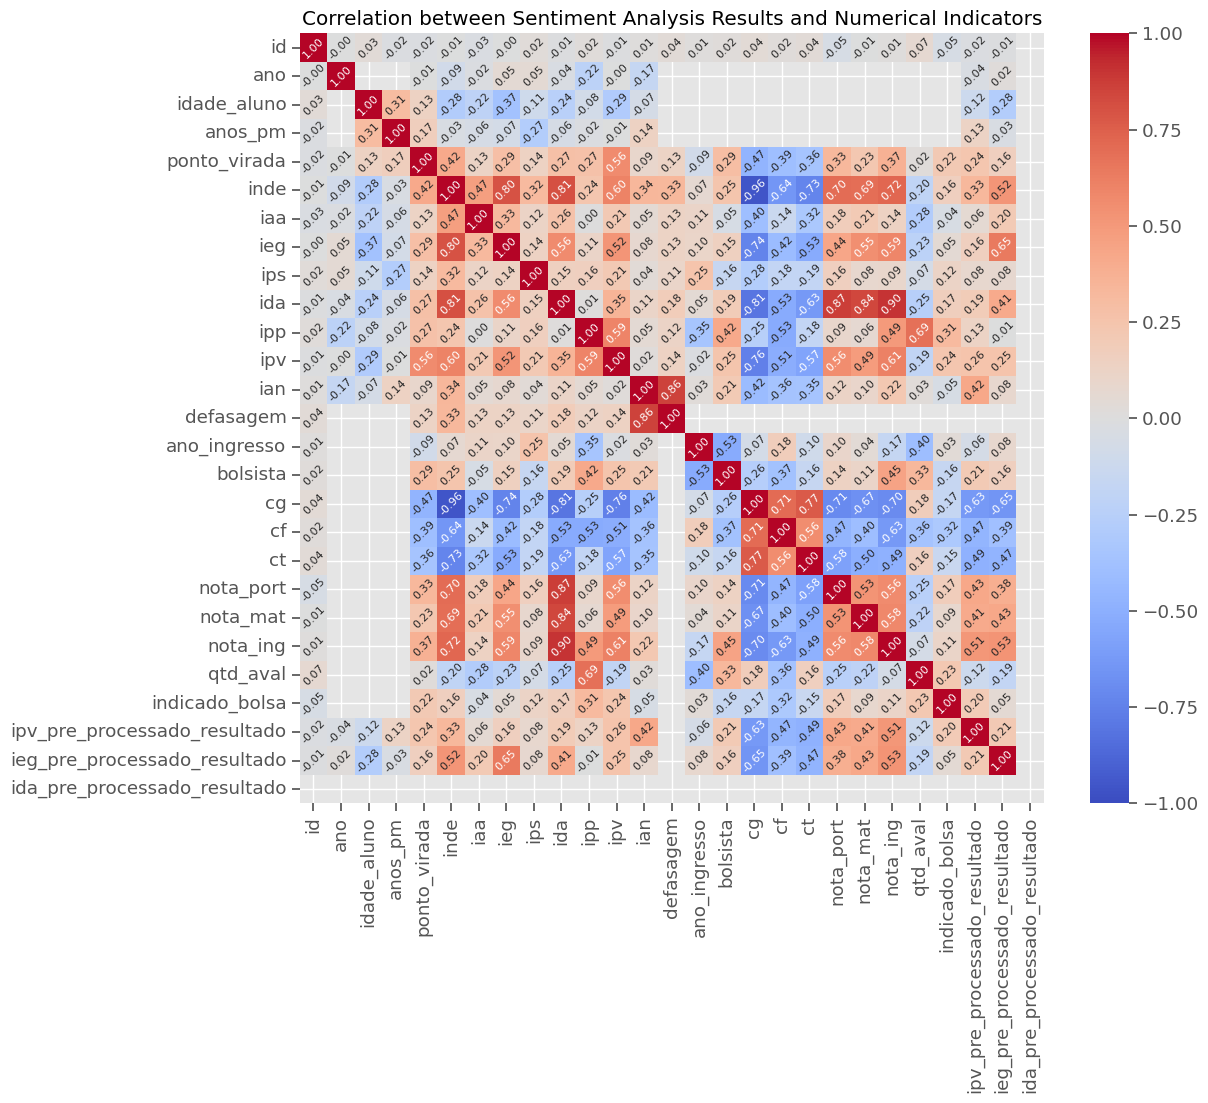


Correlations with ipv_pre_processado_resultado:
ipv_pre_processado_resultado    1.000000
nota_ing                        0.511495
nota_port                       0.425173
ian                             0.422827
nota_mat                        0.406575
inde                            0.328406
ipv                             0.255219
ponto_virada                    0.238998
ieg_pre_processado_resultado    0.211847
bolsista                        0.210273
indicado_bolsa                  0.203064
ida                             0.194235
ieg                             0.161027
ipp                             0.127329
anos_pm                         0.125649
ips                             0.078721
iaa                             0.055268
id                             -0.022539
ano                            -0.036570
ano_ingresso                   -0.063076
qtd_aval                       -0.121945
idade_aluno                    -0.124546
cf                             -0.468027
ct      

In [85]:
# Step 4: Visualize correlations
plt.figure(figsize=(12, 10))


sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    annot_kws={"size": 8, "rotation": 45},
    fmt=".2f",
)
plt.title("Correlation between Sentiment Analysis Results and Numerical Indicators")
plt.show()

# Step 5: Analyze specific correlations
for sentiment_col in sentiment_columns:
    print(f"\nCorrelations with {sentiment_col}:")
    print(correlation_matrix[sentiment_col].sort_values(ascending=False))

# # Step 6: Visualize relationships
# for sentiment_col in sentiment_columns:
#     for numeric_col in ['inde', 'ida', 'ieg', 'ipv']:
#         plt.figure(figsize=(10, 6))
#         sns.boxplot(x=sentiment_col, y=numeric_col, data=df_merged)
#         plt.title(f'Relationship between {sentiment_col} and {numeric_col}')
#         plt.show()


In [202]:
df_sentimento_destaque


ipv  \
0              Seu destaque em 2020: A sua boa integração aos...   
1                                                                  
2              Seu destaque em 2020: A sua boa integração aos...   
3              Ponto a melhorar em 2021: Integrar-se mais aos...   
4              Seu destaque em 2020: A sua boa integração aos...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ieg  \
0              Seu destaque em 2020: A sua boa entrega das li...   
1                                                                  
2              Seu destaque em 2020: A sua boa entrega das li...   
3              Ponto a melhorar em 2021: Melhorar a sua entre...   
4              Seu destaque em 2020: A sua boa entrega das li...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ida  \
0                                                            NaN   
1                                                            NaN   
2                                                            NaN   
3                                                            NaN   
4                                                            NaN   
...                                                          ...   
aluno998_2022  Melhorar: Empenhar-se mais nas aulas e avaliaç...   
aluno999_2020  Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno999_2021                                                      
aluno99_2022   Melhorar: Empenhar-se mais nas aulas e avaliaç...   
aluno9_2022    Melhorar: Empenhar-se mais nas aulas e avaliaç...   

                                      ipv_pre_processado  \
0              destaqu boa integraca principi pass magic   
1                                                          
2              destaqu boa integraca principi pass magic   
3              pont melhor integrars principi pass magic   
4              destaqu boa integraca principi pass magic   
...                                                  ...   
aluno998_2022                                              
aluno999_2020                                              
aluno999_2021                                              
aluno99_2022                                               
aluno9_2022                                                

                               ieg_pre_processado  \
0                     destaqu boa entreg lico cas   
1                                                   
2                     destaqu boa entreg lico cas   
3              pont melhor melhor entreg lico cas   
4                     destaqu boa entreg lico cas   
...                                           ...   
aluno998_2022                                       
aluno999_2020                                       
aluno999_2021                                       
aluno99_2022                                        
aluno9_2022                                         

                               ida_pre_processado  \
0                                                   
1                                                   
2                                                   
3                                       

In [ ]:
from pysentimiento import create_analyzer

modelo_analise_sentimento = create_analyzer(task="sentiment", lang="pt")


In [ ]:
modelo_analise_sentimento.predict(
    "Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações."
)


In [ ]:
df_sentimento["Sentimento"].unique().tolist()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")


def preprocess_text(text: str):
    if pd.isna(text):
        return ""  # Retorna uma string vazia para valores nulos
    text = str(text).lower()  # Converte para string antes de aplicar lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [ ]:
[
    print(modelo_analise_sentimento.predict(l))
    for l in df_sentimento["Sentimento"].unique().tolist()
]


In [ ]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)


df_sentiment = pd.DataFrame(
    {
        "text": [
            "Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.",
            "Seu destaque em 2020: As suas boas notas na Passos Mágicos.",
            "Seu destaque em 2020: As suas boas notas na Faculdade.",
            "Ponto a melhorar em 2021: As suas notas na Faculdade.",
            "Destaque: As suas boas notas na Passos Mágicos.",
            "Melhorar: Empenhar-se mais nas aulas e avaliações.",
        ],
        "class": [
            "negativo",
            "positivo",
            "positivo",
            "negativo",
            "positivo",
            "negativo",
        ],
    }
)
df_sentiment


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit(df_sentiment.text)
text_vect = vect.transform(df_sentiment.text)

pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1, 1), use_idf=True)
vect.fit(df_sentiment.text)
text_vect = vect.transform(df_sentiment.text)

pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out())


In [ ]:
import nltk
import re
import string
import unicodedata

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")


def preprocess_text(text: str):
    if pd.isna(text):
        return ""  # Retorna uma string vazia para valores nulos
    text = str(text).lower()  # Converte para string antes de aplicar lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


sentiment_map = {
    "ieg": {
        "melhorar entrega licoes": -1,
        "melhorar engajamento voluntariado": -1,
        "destaque boa entrega licoes": 1,
        "destaque bom engajamento voluntariado": 1,
    },
    "ida": {
        "melhorar aulas avaliacoes": -1,
        "melhorar empenho": -1,
        "melhorar notas": -1,
        "melhora empenharse aulas" "destaque boas notas": 1,
    },
    "ipv": {"melhorar integracao principios": -1, "destaque integracao principios": 1},
}


def get_sentiment(text, indicator):
    preprocessed_text = preprocess_text(text)

    for key, value in sentiment_map[indicator].items():
        if all(word in preprocessed_text for word in key.split()):
            return value
    return 0  # Neutro se nenhuma expressão-chave for encontrada


# Aplicar a análise de sentimento ao DataFrame
df_to_process["sentiment_ieg"] = df_to_process["destaque_ieg"].apply(
    lambda x: get_sentiment(x, "ieg")
)
df_to_process["sentiment_ida"] = df_to_process["destaque_ida"].apply(
    lambda x: get_sentiment(x, "ida")
)
df_to_process["sentiment_ipv"] = df_to_process["destaque_ipv"].apply(
    lambda x: get_sentiment(x, "ipv")
)

df_to_process["overall_sentiment"] = df_to_process[
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
].mean(axis=1)


In [ ]:
df_to_process[
    [
        "overall_sentiment",
        "sentiment_ieg",
        "sentiment_ida",
        "sentiment_ipv",
        "destaque_ieg",
        "destaque_ida",
        "destaque_ipv",
    ]
]


In [ ]:
df_to_process[
    ["overall_sentiment", "sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
].head()


In [ ]:
df_to_process.info()


In [ ]:
# Correlação entre sentimento e indicadores numéricos
correlation = df_to_process[
    [
        "sentiment_ieg",
        "sentiment_ida",
        "sentiment_ipv",
        "overall_sentiment",
        "ida",
        "ieg",
        "ipv",
        "inde",
    ]
].corr()

# Agrupamento por tipo de sentimento
sentiment_groups = df_to_process.groupby(
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
)[["ida", "ieg", "ipv", "inde"]].mean()

# Evolução dos diferentes tipos de sentimento ao longo do tempo
sentiment_over_time = df_to_process.groupby("ano")[
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv", "overall_sentiment"]
].mean()


In [ ]:
# Modelo de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_to_process[
    ["ida", "ieg", "ipv", "sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
]
y = df_to_process["inde"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R² Score: {score}")

feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print(feature_importance)

# Visualizações com Plotly
import plotly.express as px

fig = px.scatter(
    df_to_process,
    x="overall_sentiment",
    y="inde",
    color="ano",
    title="Relação entre Sentimento Geral e INDE",
)
fig.show()

fig = px.bar(
    feature_importance,
    x="feature",
    y="importance",
    title="Importância das Features no Modelo de Previsão do INDE",
)
fig.show()

fig = px.line(
    sentiment_over_time, title="Evolução dos Tipos de Sentimento ao Longo do Tempo"
)
fig.show()


#### Pré-processamento

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixar recursos necessários do NLTK
nltk.download("punkt")
nltk.download("stopwords")


# Função para pré-processar o texto
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenização
    tokens = word_tokenize(text)
    # Remover stop words
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)  # Retorna uma string em vez de uma lista


In [ ]:
# Aplicar pré-processamento às colunas relevantes
columns_to_process = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]

df_to_process = df_non_numerical.set_index("nome").copy()[columns_to_process]
df_to_process["rec_ava_1"] = df_to_process["rec_ava_1"].astype("object")

for col in columns_to_process:
    df_to_process[f"{col}_processed"] = df_to_process[col].apply(preprocess_text)


In [ ]:
df_to_process.info()


#### Análise de frequência de palavras

In [ ]:
from collections import Counter


def get_word_freq(column):
    all_words = " ".join(column).split()
    return Counter(all_words)


for col in columns_to_process:
    word_freq = get_word_freq(df_to_process[f"{col}_processed"])
    print(f"\nPalavras mais frequentes em {col}:")
    print(word_freq.most_common(10))


#### Visualização

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


for col in columns_to_process:
    word_freq = get_word_freq(df_to_process[f"{col}_processed"])
    create_wordcloud(word_freq, f"Nuvem de palavras para {col}")


#### Análise de sentimento

- Classificar comentários em positivos, negativos ou neutros

In [ ]:
import re


def analisar_sentimento_pt(texto):
    if pd.isna(texto):
        return "neutro"

    texto = texto.lower()

    palavras_positivas = [
        "destaque",
        "bom",
        "boa",
        "excelente",
        "promovido",
        "melhor",
        "progresso",
        "avanço",
        "sucesso",
        "bolsa",
    ]
    palavras_negativas = [
        "melhorar",
        "ponto a melhorar",
        "dificuldade",
        "insuficiente",
        "baixo",
        "fraco",
    ]

    pontuacao = 0
    for palavra in palavras_positivas:
        if palavra in texto:
            pontuacao += 1
    for palavra in palavras_negativas:
        if palavra in texto:
            pontuacao -= 1

    if pontuacao > 0:
        return "positivo"
    elif pontuacao < 0:
        return "negativo"
    else:
        return "neutro"


# Aplicar a análise de sentimento
colunas_para_analisar = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]

for col in colunas_para_analisar:
    df_to_process[f"{col}_sentiment"] = df_to_process[col].apply(analisar_sentimento_pt)
    sentiment_counts = df_to_process[f"{col}_sentiment"].value_counts()
    print(f"\nDistribuição de sentimento para {col}:")
    print(sentiment_counts)

# Visualização dos resultados
import matplotlib.pyplot as plt

for col in colunas_para_analisar:
    plt.figure(figsize=(10, 5))
    df_to_process[f"{col}_sentiment"].value_counts().plot(kind="bar")
    plt.title(f"Distribuição de Sentimento para {col}")
    plt.xlabel("Sentimento")
    plt.ylabel("Contagem")
    plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    if pd.isna(text):
        return "neutro"
    sentiment = sia.polarity_scores(text)
    if sentiment["compound"] > 0.05:
        return "positivo"
    elif sentiment["compound"] < -0.05:
        return "negativo"
    else:
        return "neutro"


for col in [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]:
    df_to_process[f"{col}_sentiment"] = df_to_process[col].apply(get_sentiment)
    sentiment_counts = df_to_process[f"{col}_sentiment"].value_counts()
    print(f"\nDistribuição de sentimento para {col}:")
    print(sentiment_counts)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

nltk.download("stopwords")

# Obter lista de stopwords em português
portuguese_stop_words = set(stopwords.words("portuguese"))


def cluster_texts(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words=list(portuguese_stop_words))
    X = vectorizer.fit_transform(texts)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_


for col in ["rec_ava_1", "rec_ava_2", "rec_ava_3", "rec_ava_4"]:
    df_to_process[f"{col}_cluster"] = cluster_texts(df_to_process[col].fillna(""))
    cluster_counts = df_to_process[f"{col}_cluster"].value_counts()
    print(f"\nDistribuição de clusters para {col}:")
    print(cluster_counts)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import nltk

# Baixar stopwords em português
nltk.download("stopwords")

# Obter lista de stopwords em português
portuguese_stop_words = set(stopwords.words("portuguese"))


def perform_text_clustering(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words=list(portuguese_stop_words))
    X = vectorizer.fit_transform(texts)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Redução de dimensionalidade para visualização
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X.toarray())

    return cluster_labels, X_2d


# Aplicar clustering e criar visualizações para cada coluna
for col in ["rec_ava_1", "rec_ava_2", "rec_ava_3", "rec_ava_4"]:
    # Preencher valores nulos com string vazia
    texts = df_to_process[col].fillna("")

    cluster_labels, X_2d = perform_text_clustering(texts)
    df_to_process[f"{col}_cluster"] = cluster_labels

    # 1. Gráfico de barras para distribuição dos clusters
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_to_process[f"{col}_cluster"])
    plt.title(f"Distribuição de Clusters para {col}")
    plt.xlabel("Cluster")
    plt.ylabel("Contagem")
    plt.show()

    # 2. Gráfico de dispersão 2D para visualizar agrupamentos
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap="viridis")
    plt.title(f"Visualização de Clusters 2D para {col}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.colorbar(scatter)
    plt.show()

    # 3. Mostrar exemplos de textos para cada cluster
    for cluster in range(5):  # assumindo 5 clusters
        cluster_texts = (
            df_to_process[df_to_process[f"{col}_cluster"] == cluster][col]
            .head(3)
            .tolist()
        )
        print(f"\nExemplos de textos no Cluster {cluster} para {col}:")
        for text in cluster_texts:
            print(f"- {text}")
